In [1]:
import numpy as np
import pandas as pd
import xlwings as xw
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib


# Imports
import tensorflow as tf
from tensorflow import keras
# import tensorflow_addons as tfa

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    cross_val_score,
)
import scikitplot as skplt
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.impute import KNNImputer
from collections import Counter
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import cross_val_score # Cross-Validation score
from sklearn.model_selection import cross_val_predict # Cross-Validation prediction
from sklearn.metrics import make_scorer, recall_score
from statistics import mean

import lime
import lime.lime_tabular

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

import shap

import emoji
import collections

import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

from xgboost import XGBClassifier

pd.options.display.max_columns = 50
pd.options.display.max_rows = 80

In [2]:
# Read the file
path = 'c:/Users/danie/OneDrive/Code/Propulsion/data_pipra/20210106_propulsion_psw.xlsx'
wb = xw.Book(path)
sheet = wb.sheets['20210106_propulsion_psw']
df_raw = sheet['A1:AQ2975'].options(pd.DataFrame, index=False, header=True).value

# Data Exploration/Cleaning

In [3]:
df_raw.describe()

NaN  pod (0 No, 1 Yes)    nb of pod  Time in ICU  \
count  2974.000000        2974.000000  2974.000000  2974.000000   
mean   1486.500000           0.432414     2.664089     4.899126   
std     858.664176           0.495494     5.197072     8.288843   
min       0.000000           0.000000     0.000000     0.000000   
25%     743.250000           0.000000     0.000000     0.000000   
50%    1486.500000           0.000000     0.000000     1.000000   
75%    2229.750000           1.000000     3.000000     5.000000   
max    2973.000000           1.000000    40.000000    30.000000   

       sex (0 male, 1 female)          age  weight (kg)   height (m)  \
count             2974.000000  2974.000000  2974.000000  2974.000000   
mean                 0.273033    71.512441    75.482179     1.582502   
std                  0.445593     6.623228    23.163922     0.444828   
min                  0.000000    60.000000     0.000000     0.000000   
25%                  0.000000    66.000000    67.000000     1.630000   
50%                  0.000000    71.000000    77.000000     1.700000   
75%                  1.000000    77.000000    87.000000     1.760000   
max                  1.000000    85.000000   189.000000     1.980000   

               bmi  obese [BMI =>30] (0 No, 1 Yes)   ASA status  \
count  2697.000000                     2974.000000  2974.000000   
mean     27.383537                        0.229657     3.216543   
std       5.100771                        0.420683     0.703302   
min      12.900000                        0.000000     0.000000   
25%      24.100000                        0.000000     3.000000   
50%      26.600000                        0.000000     3.000000   
75%      30.000000                        0.000000     4.000000   
max      50.000000                        1.000000     6.000000   

       Charlson Comorbidity Index  Glasgow Coma Scale     Epilepsy  \
count                 2974.000000         2974.000000  2974.000000   
mean                     3.014459            0.019839     0.008406   
std                      2.008925            0.139469     0.091314   
min                      0.000000            0.000000     0.000000   
25%                      2.000000            0.000000     0.000000   
50%                      3.000000            0.000000     0.000000   
75%                      4.000000            0.000000     0.000000   
max                     10.000000            1.000000     1.000000   

       Neural deficit  Dim phys cap  Ischemic heart dis  Per vascular dis  \
count     2974.000000   2974.000000         2974.000000       2974.000000   
mean         0.097512      0.239744            0.562206          0.101547   
std          0.296703      0.426999            0.496199          0.302102   
min          0.000000      0.000000            0.000000          0.000000   
25%          0.000000      0.000000            0.000000          0.000000   
50%          0.000000      0.000000            1.000000          0.000000   
75%          0.000000      0.000000            1.000000          0.000000   
max          1.000000      1.000000            1.000000          1.000000   

       Chron heart fail    Arythmmia  Gastro issues       Reflux  \
count       2974.000000  2974.000000    2974.000000  2974.000000   
mean           0.165098     0.251177       0.442502     0.086079   
std            0.371331     0.433763       0.496766     0.280528   
min            0.000000     0.000000       0.000000     0.000000   
25%            0.000000     0.000000       0.000000     0.000000   
50%            0.000000     0.000000       0.000000     0.000000   
75%            0.000000     1.000000       1.000000     0.000000   
max            1.000000     1.000000       1.000000     1.000000   

       Liver issues  Kidney issues  Coagulation issues       Tumour  \
count   2974.000000    2974.000000         2974.000000  2974.000000   
mean       0.054136       0.187626            0.302286     0.039677   
std    

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   None                                         2974 non-null   float64
 1   pod (0 No, 1 Yes)                            2974 non-null   float64
 2   nb of pod                                    2974 non-null   float64
 3   Time in ICU                                  2974 non-null   float64
 4   sex (0 male, 1 female)                       2974 non-null   float64
 5   age                                          2974 non-null   float64
 6   weight (kg)                                  2974 non-null   float64
 7   height (m)                                   2974 non-null   float64
 8   bmi                                          2697 non-null   float64
 9   obese [BMI =>30] (0 No, 1 Yes)               2974 non-null   float64
 10  

In [5]:
# Check for columns with only 1 unique value and print name/value

lst=[]
for col in df_raw:
    if len(df_raw[col].unique()) == 1:
        print(f'Column name:{col}\n\tUnique Values:{df_raw[col].unique()}\n')
        lst.append(col)

Column name:type of anesthesia
	Unique Values:['general']

Column name:cardiac surgery
	Unique Values:[1.]

Column name:study id
	Unique Values:[20.]

Column name:1st author
	Unique Values:['Nicolai Goettler']

Column name:design
	Unique Values:['retrospective']

Column name:country
	Unique Values:['Switzerland']

Column name:pod diagnosis
	Unique Values:['ICDSC']



In [6]:
# Drop columns with one unique value and NaN column

df = df_raw.copy()

df = df.drop(df.iloc[:,0:1],1)
             
df.drop(lst, axis=1, inplace=True)

In [7]:
#Set patient id as Index

df.set_index('pt_id', drop=True, inplace=True)

In [8]:
# Rearrange columns

cols = df.columns.tolist()
cols = cols[2:] + cols[1:2] + cols[:1]
df = df[cols]

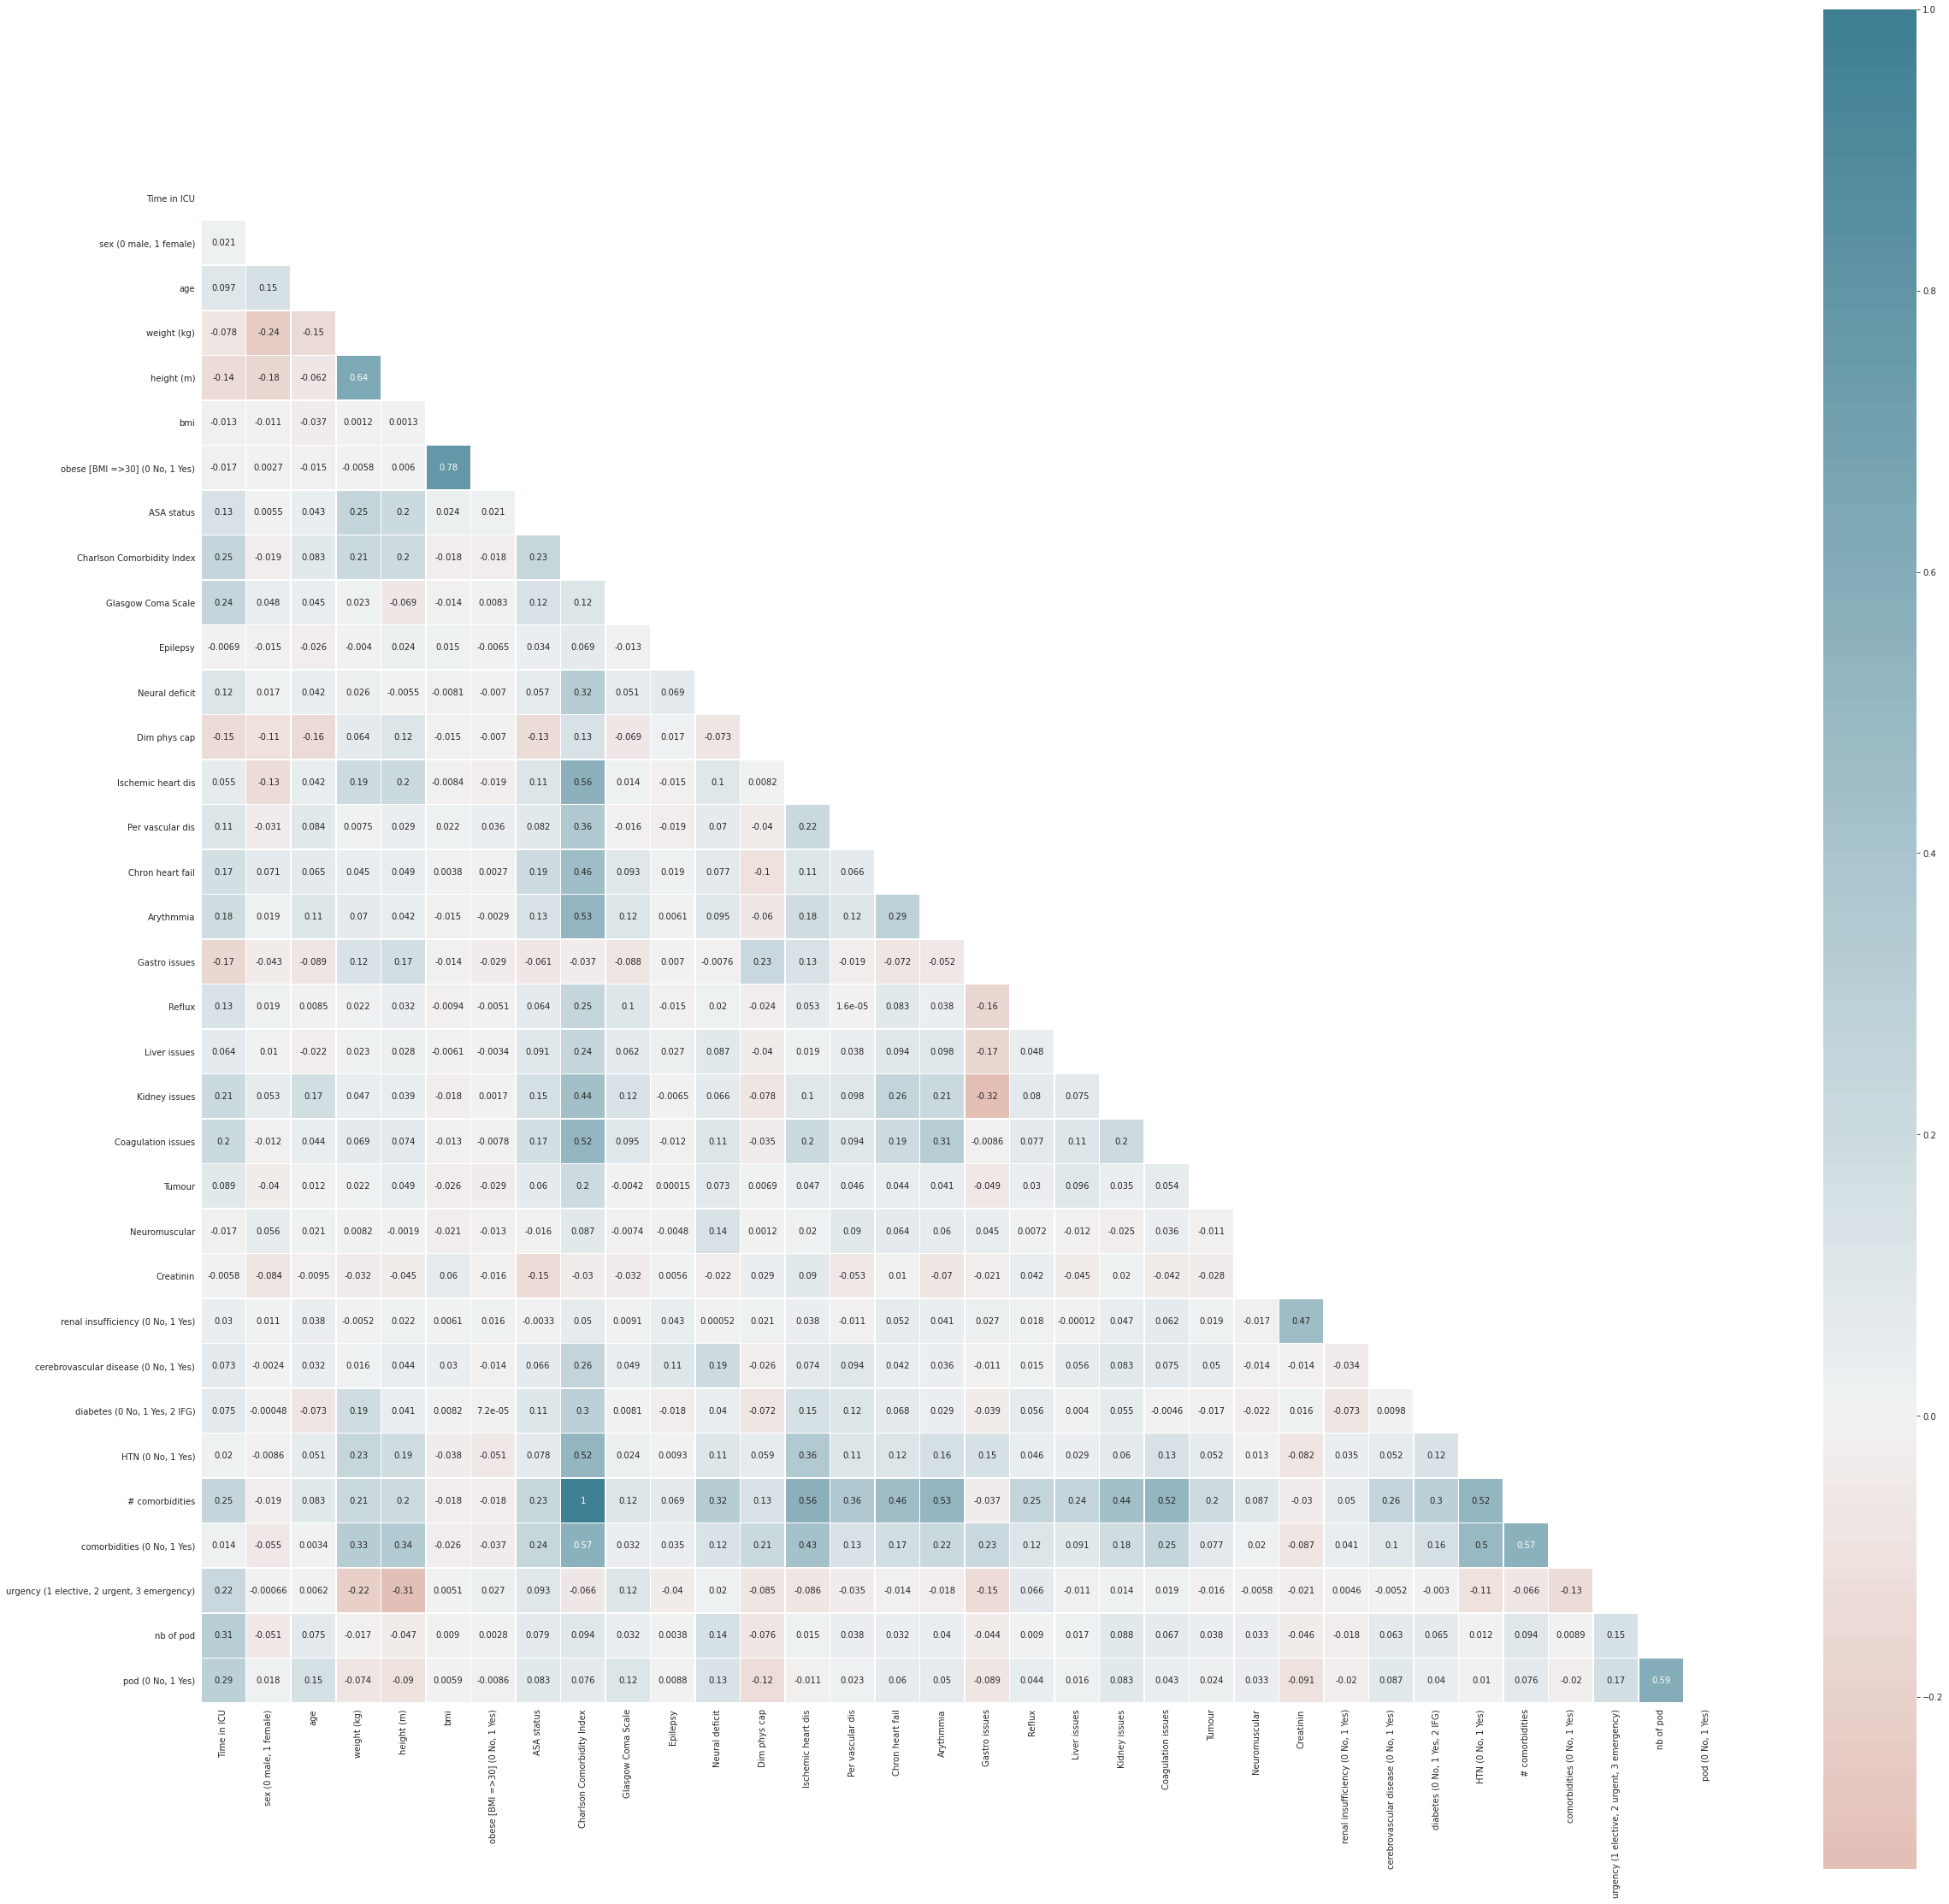

In [9]:
# calculate the correlation matrix

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(20, 220, n=200)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40, 40))
    ax = sns.heatmap(corr, 
        mask=mask,
        cmap=cmap,
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True,
        center=0,
        square=True,
        linewidths=.5)

In [10]:
# Drop one of the high correlated columns "Charlson Comorbidity Index"

df.drop('Charlson Comorbidity Index', axis=1, inplace=True)

In [11]:
# Drop Obese column, will be replaced with a binning of the BMI

df.drop('obese [BMI =>30] (0 No, 1 Yes)', axis=1, inplace=True)

In [14]:
# Drop bmi, it is misscalculated

df.drop('bmi', axis=1, inplace=True)

In [15]:
# Drop Glasgow Coma Scale, it is misscalculated

df.drop('Glasgow Coma Scale', axis=1, inplace=True)

In [16]:
# Drop Creatinine, it is misscalculated

df.drop('Creatinin', axis=1, inplace=True)

In [17]:
# Drop duplicates

df.drop_duplicates(inplace=True)
df.shape

(2889, 29)

In [18]:
# Drop Time in ICU, it is a value we get afterwards and not available for new data

df.drop('Time in ICU', axis=1, inplace=True)

In [19]:
# Drop nb of pod because it works as a data leakage

df.drop('nb of pod', axis=1, inplace=True)

In [20]:
def switch_w_h (pt_ids, df):   
# Take a list of patients and switch the weight and height
    for i in pt_ids:
        a = df.loc[i, 'weight (kg)']
        b = df.loc[i, 'height (m)']
        print (f'pt_id {i} has after the switch: Weight of {b*100} kg and Height of {a/100} m')
        df.loc[i, 'weight (kg)'] = b * 100
        df.loc[i, 'height (m)'] = a / 100

In [21]:
# Create a list for patients given the conditions for switching and applying switch_w_h function

pt_ids = [x for x in df[(df['weight (kg)'] > 145) & (df['height (m)'] < 1.51)].index]
switch_w_h(pt_ids, df)

pt_id 62.0 has after the switch: Weight of 72.0 kg and Height of 1.6 m
pt_id 469.0 has after the switch: Weight of 62.0 kg and Height of 1.76 m
pt_id 611.0 has after the switch: Weight of 72.0 kg and Height of 1.69 m
pt_id 1549.0 has after the switch: Weight of 99.0 kg and Height of 1.83 m
pt_id 1574.0 has after the switch: Weight of 0.0 kg and Height of 1.89 m
pt_id 2301.0 has after the switch: Weight of 150.0 kg and Height of 1.6 m


In [22]:
#Replace all the 0 in weight and height to Nan for the KNN imputation

df['weight (kg)'] = df['weight (kg)'].replace(0.0, np.nan)
print(df['weight (kg)'].isnull().sum())

df['height (m)'] = df['height (m)'].replace(0.0, np.nan)
print(df['height (m)'].isnull().sum())


139
196


In [23]:
# Make a copy of df withouth pod to avoid it to interfere in KNN

df_knn = df.drop('pod (0 No, 1 Yes)', axis=1)

In [24]:
# Make a copy for the df_2. We are going to do the KNN for the Weight, Height and Creatinine at the same time for df_2

df_2 = df_knn.copy()

In [25]:
# Use KNNImputer to fill up the values in height and weight

imputer = KNNImputer()
imputer.fit(df_knn)

df_trans = imputer.transform(df_knn)
df_trans = pd.DataFrame(df_trans)

# add columns to the dataframe after the imputation (after imputation the column-names are gone, this is why I'm adding them back)
columns = df_knn.columns
df_trans.columns = columns

# same for index
ind = df_knn.index
df_trans.index = ind

In [26]:
df_trans.isna().sum()

sex (0 male, 1 female)                         0
age                                            0
weight (kg)                                    0
height (m)                                     0
ASA status                                     0
Epilepsy                                       0
Neural deficit                                 0
Dim phys cap                                   0
Ischemic heart dis                             0
Per vascular dis                               0
Chron heart fail                               0
Arythmmia                                      0
Gastro issues                                  0
Reflux                                         0
Liver issues                                   0
Kidney issues                                  0
Coagulation issues                             0
Tumour                                         0
Neuromuscular                                  0
renal insufficiency (0 No, 1 Yes)              0
cerebrovascular dise

In [28]:
#Recalculate bmi and insert after height

bmi = df_trans['weight (kg)'] / (df_trans['height (m)'] **2)
df_trans.insert(loc=4, column='bmi', value=bmi)
df_trans['pod (0 No, 1 Yes)'] = df['pod (0 No, 1 Yes)'] 
df = df_trans

In [29]:
df.isna().sum()

sex (0 male, 1 female)                         0
age                                            0
weight (kg)                                    0
height (m)                                     0
bmi                                            0
ASA status                                     0
Epilepsy                                       0
Neural deficit                                 0
Dim phys cap                                   0
Ischemic heart dis                             0
Per vascular dis                               0
Chron heart fail                               0
Arythmmia                                      0
Gastro issues                                  0
Reflux                                         0
Liver issues                                   0
Kidney issues                                  0
Coagulation issues                             0
Tumour                                         0
Neuromuscular                                  0
renal insufficiency 

In [30]:
# Binning bmi, 4 levels: Underweight = <18.5, Normal weight = 18.5–24.9, Overweight = 25–29.9, Obesity = BMI of 30 or greater

bins_obese = [0, 18.5, 24.99999, 30, 200]
group_names = ['underweight', 'normal_weight', 'overweight', 'obesity']
aa = pd.cut(df['bmi'], bins_obese, labels=group_names, right=True)
df.insert(loc=6, column='bmi_cat', value=aa)

In [31]:
Counter(df['bmi_cat'])

Counter({'overweight': 1255,
         'normal_weight': 952,
         'obesity': 651,
         'underweight': 31})

In [33]:
# Get Dummies from bmi_cat and reshape the df

df = pd.get_dummies(df, columns=['bmi_cat'])
cols = df.columns.tolist()
cols = cols[0:5] + cols[-4:] + cols[5:-4]
df = df[cols]

## Exploring after Data splitting (Imbalance, etc)

In [34]:
# Select X and y values (predictor and outcome)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1:]  # POD

In [35]:
#Split the data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19
)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2311 samples.
Testing set has 578 samples.


### Checking Counter on X_train and X_test

In [36]:
# TesRemove continious columns to check for imbalance unique values

col_lst = [x for x in X_test.columns]

to_remove = ['age', 'weight (kg)', 'height (m)', 'bmi', '# comorbidities', 'ASA status', 'Neuromuscular']
for i in to_remove:
    col_lst.remove(i)

In [37]:
# Check unique values and ratios between them

for col in col_lst:
    print(col)
    aa = Counter(X_test[col])
    print(aa)
    bb = list(aa.values())
    print(bb[0]/bb[1])
    cc = Counter(X_train[col])
    print(cc)
    dd = list(cc.values())
    print(dd[0]/dd[1])
    print('\n')

sex (0 male, 1 female)
Counter({0.0: 411, 1.0: 167})
0.40632603406326034
Counter({0.0: 1695, 1.0: 616})
2.7516233766233764


bmi_cat_underweight
Counter({0: 571, 1: 7})
81.57142857142857
Counter({0: 2287, 1: 24})
95.29166666666667


bmi_cat_normal_weight
Counter({0: 390, 1: 188})
2.074468085106383
Counter({0: 1547, 1: 764})
2.024869109947644


bmi_cat_overweight
Counter({0: 325, 1: 253})
1.284584980237154
Counter({0: 1309, 1: 1002})
1.3063872255489022


bmi_cat_obesity
Counter({0: 448, 1: 130})
0.29017857142857145
Counter({0: 1790, 1: 521})
0.2910614525139665


Epilepsy
Counter({0.0: 576, 1.0: 2})
288.0
Counter({0.0: 2288, 1.0: 23})
99.47826086956522


Neural deficit
Counter({0.0: 519, 1.0: 59})
8.796610169491526
Counter({0.0: 2094, 1.0: 217})
0.10362941738299905


Dim phys cap
Counter({0.0: 444, 1.0: 134})
3.3134328358208953
Counter({0.0: 1746, 1.0: 565})
3.090265486725664


Ischemic heart dis
Counter({1.0: 317, 0.0: 261})
0.8233438485804416
Counter({1.0: 1303, 0.0: 1008})
0.773599386

In [38]:
X_test_test = X_test.copy()
X_train_test = X_train.copy()

In [39]:
X_test_test['Output'] = y_test
X_train_test['Output'] = y_train

col_to_remove = []

# Make a counter on all the columns depending on the ouput (POD), checking if the data is imbalanced or it may lead to a data leakage

for col in col_lst:
    aa = sorted(X_test_test[col].unique())
    print(f'Column name: {col}')
    print('\n')
    for a in aa:
        print(f'X_train: Output counter for unique value "{a}"')
        aa = collections.OrderedDict(sorted(Counter(X_train_test[X_train_test[col] == a]['Output']).items()))
        bb = list(aa.values())
        print(collections.OrderedDict(sorted(Counter(X_train_test[X_train_test[col] == a]['Output']).items())))
        print(f'Ratio: {bb[0]/bb[1]}')
        print(f'X_test: Output counter for unique value "{a}"')
        cc = collections.OrderedDict(sorted(Counter(X_test_test[X_test_test[col] == a]['Output']).items()))
        dd = list(cc.values())
        print(collections.OrderedDict(sorted(Counter(X_test_test[X_test_test[col] == a]['Output']).items())))
        print(f'Ratio: {dd[0]/dd[1]}')
        print('\n')
        if bb[0] < 15 or bb[1] < 15:
            start = "\033[1m"
            end = "\033[0;0m"
            print(emoji.emojize(start + 'CAUTION!!!!' + end + ':red_circle::red_circle::red_circle:'))
            col_to_remove.append(col)
    print('\n\n')
    
print(col_to_remove)


In [40]:
df_models = df.copy()

In [41]:
df_models.shape

(2889, 32)

In [42]:
# Drop Creatinin and Neuromuscular because of the missing values and imbalanced data
# Removing Urgency because of the high feature importance with X_train and between X_test (overfiting)

df_models.drop(['Neuromuscular', 'urgency (1 elective, 2 urgent, 3 emergency)'], axis=1, inplace=True)

In [43]:
# Select X and y values (predictor and outcome)

X = df_models.iloc[:, :-1]  # Features
y = df_models.iloc[:, -1:]  # POD

In [44]:
# Split the data again after remove new columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19
)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2311 samples.
Testing set has 578 samples.


# Default Models Testing

In [45]:
X_test.describe()

sex (0 male, 1 female)         age  weight (kg)  height (m)  \
count              578.000000  578.000000   578.000000  578.000000   
mean                 0.288927   71.205882    78.896886    1.701073   
std                  0.453657    6.370222    14.810092    0.082819   
min                  0.000000   60.000000    43.000000    1.480000   
25%                  0.000000   66.000000    69.550000    1.650000   
50%                  0.000000   71.000000    77.500000    1.700000   
75%                  1.000000   76.000000    87.800000    1.760000   
max                  1.000000   85.000000   156.000000    1.980000   

              bmi  bmi_cat_underweight  bmi_cat_normal_weight  \
count  578.000000           578.000000             578.000000   
mean    27.234311             0.012111               0.325260   
std      4.669770             0.109475               0.468878   
min     16.796875             0.000000               0.000000   
25%     24.352040             0.000000               0.000000   
50%     26.580940             0.000000               0.000000   
75%     29.660951             0.000000               1.000000   
max     60.937500             1.000000               1.000000   

       bmi_cat_overweight  bmi_cat_obesity  ASA status    Epilepsy  \
count          578.000000       578.000000  578.000000  578.000000   
mean             0.437716         0.224913    3.159170    0.003460   
std              0.496535         0.417887    0.782562    0.058773   
min              0.000000         0.000000    0.000000    0.000000   
25%              0.000000         0.000000    3.000000    0.000000   
50%              0.000000         0.000000    3.000000    0.000000   
75%              1.000000         0.000000    4.000000    0.000000   
max              1.000000         1.000000    6.000000    1.000000   

       Neural deficit  Dim phys cap  Ischemic heart dis  Per vascular dis  \
count      578.000000    578.000000          578.000000        578.000000   
mean         0.102076      0.231834            0.548443          0.121107   
std          0.303011      0.422369            0.498079          0.326534   
min          0.000000      0.000000            0.000000          0.000000   
25%          0.000000      0.000000            0.000000          0.000000   
50%          0.000000      0.000000            1.000000          0.000000   
75%          0.000000      0.000000            1.000000          0.000000   
max          1.000000      1.000000            1.000000          1.000000   

       Chron heart fail   Arythmmia  Gastro issues      Reflux  Liver issues  \
count        578.000000  578.000000     578.000000  578.000000    578.000000   
mean           0.134948    0.256055       0.448097    0.095156      0.046713   
std            0.341964    0.436831       0.497730    0.293684      0.211206   
min            0.000000    0.000000       0.000000    0.000000      0.000000   
25%            0.000000    0.000000       0.000000    0.000000      0.000000   
50%            0.000000    0.000000       0.000000    0.000000      0.000000   
75%            0.000000    1.000000       1.000000    0.000000      0.000000   
max            1.000000    1.000000       1.000000    1.000000      1.000000   

       Kidney issues  Coagulation issues      Tumour  \
count      578.00000          578.000000  578.000000   
mean         0.17128            0.318339    0.041522   
std          0.37708            0.466235    0.199668   
min          0.00000            0.000000    0.000000   
25%          0.00000            0.000000    0.000000   
50%          0.00000            0.000000    0.000000   
75%          0.00000            1.000000    0.000000   
max          1.00000            1.000000    1.000000   

       renal insufficiency (0 No, 1 Yes)  \
count                         578.000000   
mean                            0.077855   
std                             0.268175   
min                             0.000000   
25%                

In [46]:
model_auc_score = {}


def model_evaluation(model_name, predictions, pipe):

    print(classification_report(y_test, predictions))
    print("----------------------------------------------------------")
    print(confusion_matrix(y_test, predictions))
    print("----------------------------------------------------------")
    skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
    probs = pipe.predict_proba(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
    roc_auc = metrics.roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
    print("AUC: %.2f%%" % (roc_auc * 100.0))
    print("----------------------------------------------------------")
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    
    model_auc_score[model_name] = roc_auc

In [47]:
# Check the overlapped results between the 2 models

def overlapping(predictions_model_1, name_model_1, predictions_model_2, name_model_2):
    print(f'The overlapping in the results between {name_model_1} and {name_model_2} is:')
    print(f'{round((np.sum(predictions_model_1==predictions_model_2)/len(X_test) * 100), 2)}%')

In [48]:
# Check for the accuracy of the predictions related to real predictions in the quartiles

def ranges_acc (predict_proba, model_name, steps):
    # Input predicts in term of probabilities, name of the model (aesthetic) and the number of ranges where you want to see the performance of your model
    
    df_acc = pd.DataFrame(predict_proba)
    df_acc['real_output'] = np.array(y_test['pod (0 No, 1 Yes)'])
    
    pct = steps + 1
    ranges = np.linspace(0.5, 1.0, pct)
    first_range = 0
    print(f'Accuracy for the model {model_name}:\n')
    
    for i in range(steps):
        step = df_acc[(df_acc[1] >= ranges[first_range]) & (df_acc[1] < ranges[first_range + 1])]
        acc = step['real_output'].sum()/len(step['real_output']) * 100
        print(f'The accuracy when the model is predicting POD with a probability of {round(ranges[first_range] * 100, 2)}% - {round(ranges[first_range + 1] * 100,2 )}% is: \n\t {round(acc, 2)}%')
        first_range += 1

In [49]:
numeric_features = [
    "age",
    "weight (kg)",
    "height (m)",
    "bmi"
]

In [50]:
# The numeric data is standard-scaled

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])


# The column transformer allows to apply different preprocessing steps for individual sets of columns
# transformers must support fit and transform.
# Special-cased strings ‘drop’ and ‘passthrough’ are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)],
        remainder='passthrough'
)

## Logistic Regression

In [51]:
l_regr = LogisticRegression(max_iter=1000)
pipeline_lregr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", l_regr)]
)

pipeline_lregr.fit(X_train, y_train)
lregr_pred = pipeline_lregr.predict(X_test)
lregr_pred_proba = pipeline_lregr.predict_proba(X_test)

In [52]:
accuracy_score(y_test, lregr_pred)

0.615916955017301

              precision    recall  f1-score   support

         0.0       0.63      0.81      0.71       336
         1.0       0.57      0.34      0.43       242

    accuracy                           0.62       578
   macro avg       0.60      0.58      0.57       578
weighted avg       0.61      0.62      0.59       578

----------------------------------------------------------
[[273  63]
 [159  83]]
----------------------------------------------------------
AUC: 60.65%
----------------------------------------------------------


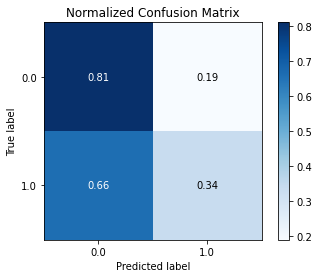

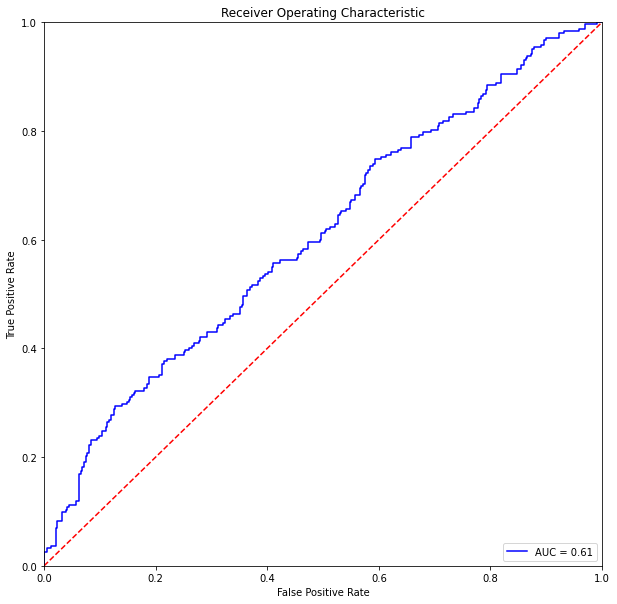

In [53]:
model_evaluation("Logistic Regression", lregr_pred, pipeline_lregr)

In [54]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = l_regr.coef_[0]
new = pd.DataFrame(importance).T

In [55]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=False)

In [56]:
importance2

0
Neural deficit                         0.659972
cerebrovascular disease (0 No, 1 Yes)  0.473898
sex (0 male, 1 female)                 0.278285
ASA status                             0.216061
bmi_cat_obesity                        0.214591
bmi_cat_underweight                    0.199957
diabetes (0 No, 1 Yes, 2 IFG)          0.176197
Tumour                                 0.126397
Chron heart fail                       0.123796
Reflux                                 0.113671
weight (kg)                            0.070805
Kidney issues                          0.054916
# comorbidities                        0.047891
HTN (0 No, 1 Yes)                      0.004801
Coagulation issues                    -0.025739
height (m)                            -0.027125
Arythmmia                             -0.056240
Per vascular dis                      -0.092995
Gastro issues                         -0.099161
renal insufficiency (0 No, 1 Yes)     -0.135782
bmi_cat_overweight                    -0.156398
Ischemic heart dis                    -0.179741
age                                   -0.199357
comorbidities (0 No, 1 Yes)           -0.208525
Epilepsy                              -0.221995
bmi                                   -0.238654
bmi_cat_normal_weight                 -0.250119
Liver issues                          -0.264984
Dim phys cap                          -0.361846

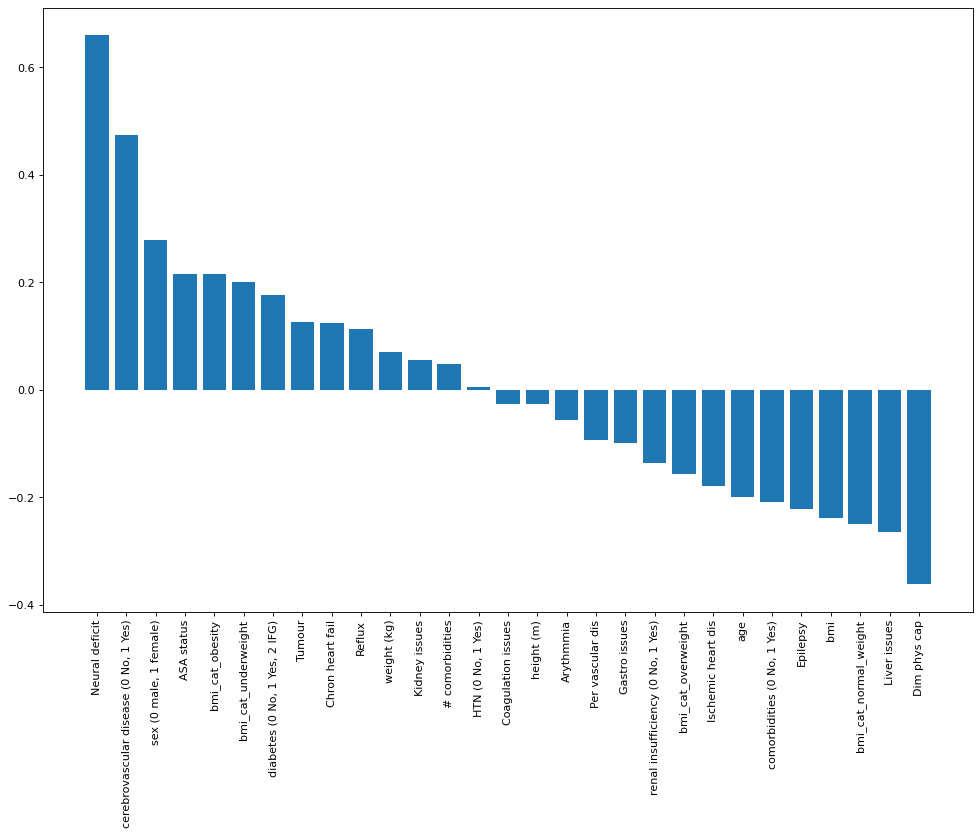

In [57]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

## KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
pipeline_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", knn)]
)
pipeline_knn.fit(X_train, y_train)

knn_predictions = pipeline_knn.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       336
         1.0       0.59      0.48      0.53       242

    accuracy                           0.64       578
   macro avg       0.63      0.62      0.62       578
weighted avg       0.63      0.64      0.63       578

----------------------------------------------------------
[[255  81]
 [127 115]]
----------------------------------------------------------
AUC: 66.07%
----------------------------------------------------------


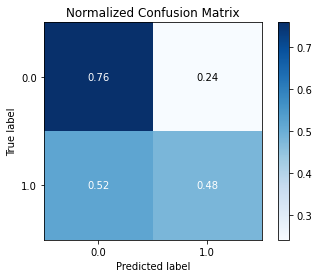

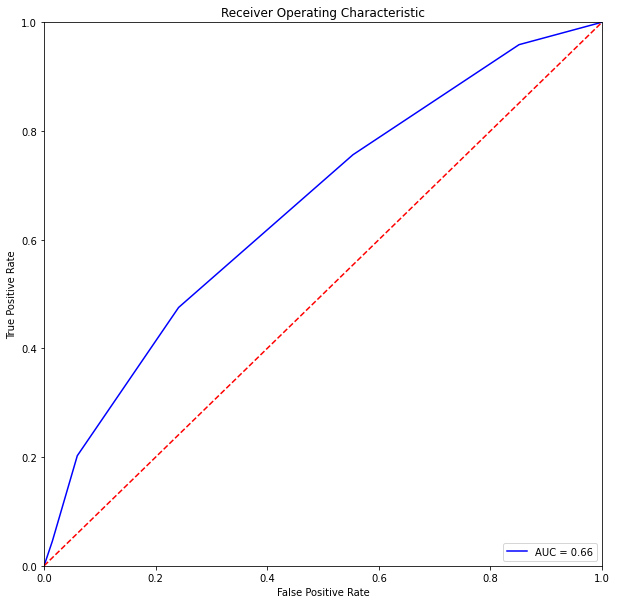

In [59]:
model_evaluation("KNN", knn_predictions, pipeline_knn)

## NB

In [60]:
nb = BernoulliNB()
pipeline_nb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", nb)]
)
pipeline_nb.fit(X_train, y_train)

nb_predictions = pipeline_nb.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70       336
         1.0       0.56      0.44      0.50       242

    accuracy                           0.62       578
   macro avg       0.61      0.60      0.60       578
weighted avg       0.61      0.62      0.61       578

----------------------------------------------------------
[[253  83]
 [135 107]]
----------------------------------------------------------
AUC: 64.18%
----------------------------------------------------------


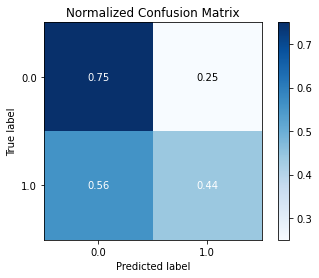

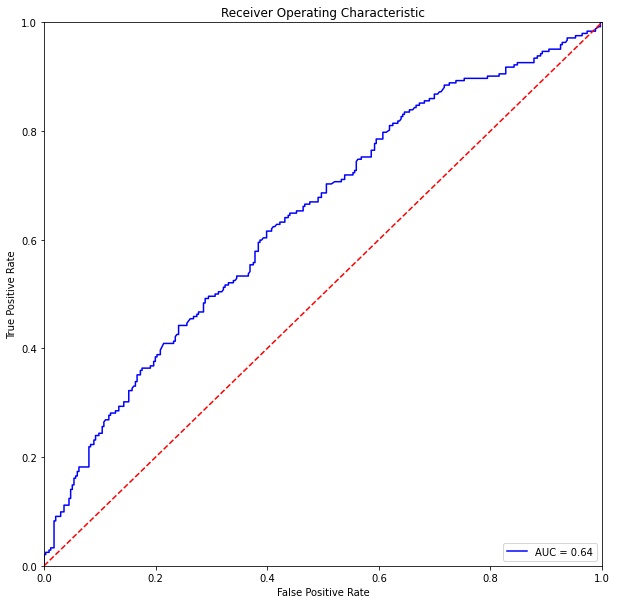

In [61]:
model_evaluation("Naive Bayes", nb_predictions, pipeline_nb)

In [62]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = nb.coef_[0]
new = pd.DataFrame(importance).T

In [63]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=True)

In [64]:
importance2

0
Epilepsy                              -4.501828
bmi_cat_underweight                   -4.127134
Tumour                                -3.049576
Liver issues                          -2.910739
cerebrovascular disease (0 No, 1 Yes) -2.411087
Reflux                                -2.399913
renal insufficiency (0 No, 1 Yes)     -2.304603
Per vascular dis                      -2.255332
Neural deficit                        -1.987068
diabetes (0 No, 1 Yes, 2 IFG)         -1.787735
Dim phys cap                          -1.663281
Chron heart fail                      -1.601406
Kidney issues                         -1.510651
bmi_cat_obesity                       -1.444402
Arythmmia                             -1.327569
bmi                                   -1.312474
Coagulation issues                    -1.169623
bmi_cat_normal_weight                 -1.085593
Gastro issues                         -0.903271
bmi_cat_overweight                    -0.886008
height (m)                            -0.842939
age                                   -0.755537
weight (kg)                           -0.709408
Ischemic heart dis                    -0.571786
sex (0 male, 1 female)                -0.566443
HTN (0 No, 1 Yes)                     -0.461971
# comorbidities                       -0.135838
comorbidities (0 No, 1 Yes)           -0.135838
ASA status                            -0.018312

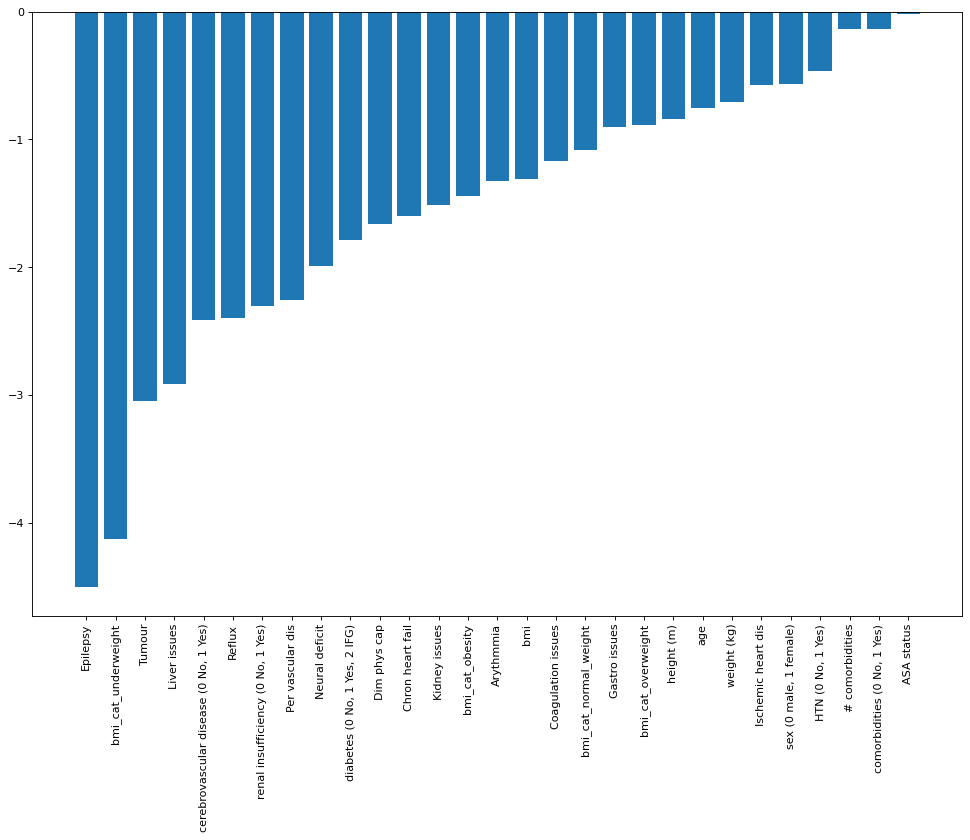

In [65]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

## SVM

### Linear SVM

In [66]:
svm = LinearSVC()
pipeline_svm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svm)]
)
pipeline_svm.fit(X_train, y_train)

svm_predictions = pipeline_svm.predict(X_test)

In [67]:
# model_evaluation("Linear SVM", svm_predictions, pipeline_svm)

In [68]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = svm.coef_[0]
new = pd.DataFrame(importance).T

In [69]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=False)

In [70]:
importance2

0
Neural deficit                         0.321972
cerebrovascular disease (0 No, 1 Yes)  0.231446
sex (0 male, 1 female)                 0.129010
ASA status                             0.099143
diabetes (0 No, 1 Yes, 2 IFG)          0.089775
Tumour                                 0.068117
Chron heart fail                       0.066372
Reflux                                 0.059569
bmi_cat_underweight                    0.048783
weight (kg)                            0.038009
Kidney issues                          0.032292
bmi_cat_obesity                        0.031249
# comorbidities                        0.016049
HTN (0 No, 1 Yes)                      0.008778
height (m)                            -0.000349
Coagulation issues                    -0.005721
Arythmmia                             -0.019247
Per vascular dis                      -0.038480
Gastro issues                         -0.045985
renal insufficiency (0 No, 1 Yes)     -0.060867
Ischemic heart dis                    -0.078033
comorbidities (0 No, 1 Yes)           -0.099423
age                                   -0.102671
bmi                                   -0.112742
Epilepsy                              -0.115346
Liver issues                          -0.117857
bmi_cat_overweight                    -0.139258
Dim phys cap                          -0.156715
bmi_cat_normal_weight                 -0.182581

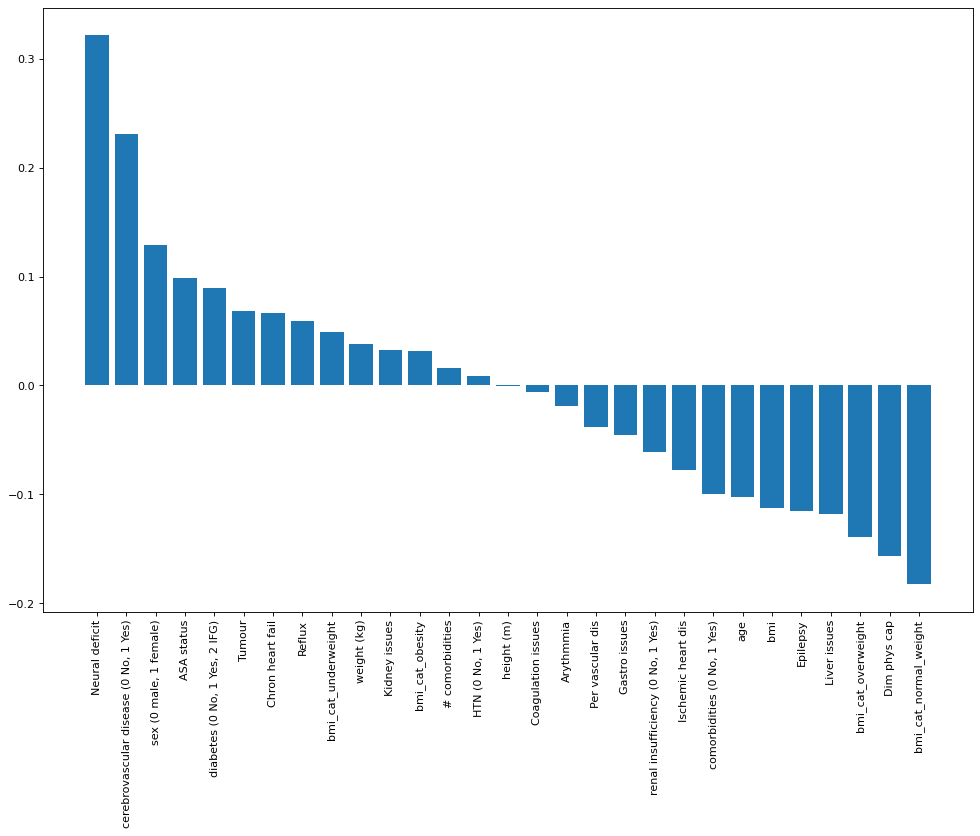

In [71]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

### SVM with Radial Basis Function

In [72]:
# Call model into variable
svm_rbf = SVC(kernel="rbf", gamma="scale", probability=True)
pipeline_svm_rbf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svm_rbf)]
)
pipeline_svm_rbf.fit(X_train, y_train)

svm_rbf_predictions = pipeline_svm_rbf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.62      0.88      0.73       336
         1.0       0.60      0.25      0.35       242

    accuracy                           0.62       578
   macro avg       0.61      0.57      0.54       578
weighted avg       0.61      0.62      0.57       578

----------------------------------------------------------
[[295  41]
 [181  61]]
----------------------------------------------------------
AUC: 63.73%
----------------------------------------------------------


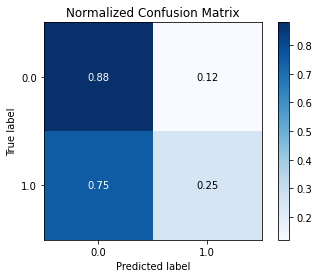

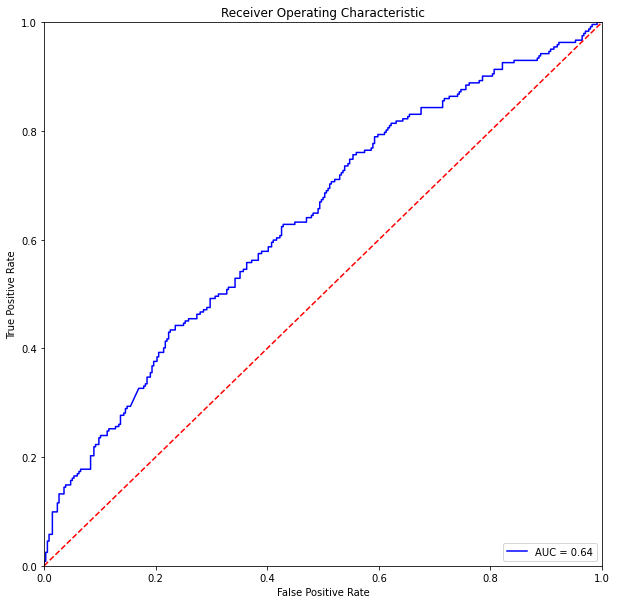

In [73]:
model_evaluation("SVM with Radia Basis Function", svm_rbf_predictions, pipeline_svm_rbf)

## Random Forest

In [74]:
rfc = RandomForestClassifier(random_state=19)

pipeline_rfc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rfc)]
)
pipeline_rfc.fit(X_train, y_train)

rfc_pred = pipeline_rfc.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       336
         1.0       0.65      0.53      0.58       242

    accuracy                           0.68       578
   macro avg       0.68      0.66      0.66       578
weighted avg       0.68      0.68      0.68       578

----------------------------------------------------------
[[267  69]
 [114 128]]
----------------------------------------------------------
AUC: 70.72%
----------------------------------------------------------


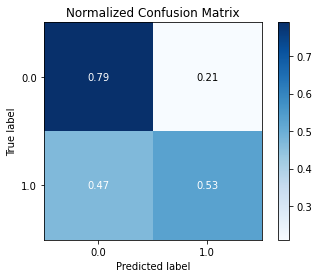

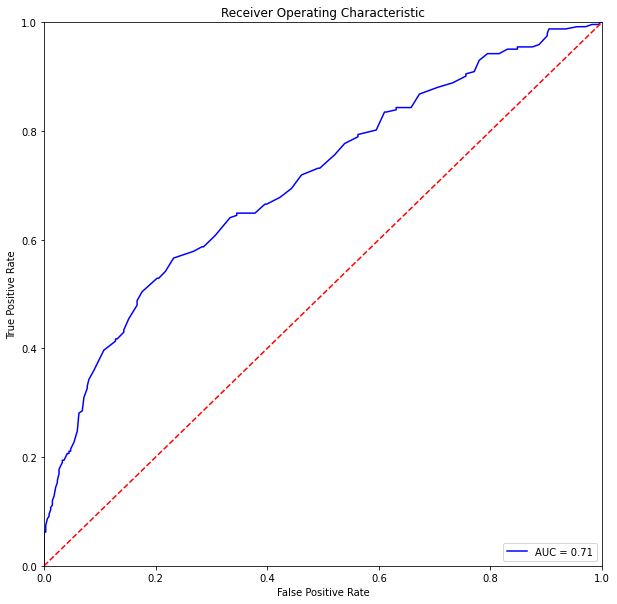

In [75]:
model_evaluation("Random Forest", rfc_pred, pipeline_rfc)

In [76]:
rfc_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(rfc.feature_importances_, 3)}
)
rfc_importances = rfc_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [77]:
rfc_imp = rfc_importances.sort_values('importance', ascending=False)
rfc_imp

importance
feature                                          
height (m)                                  0.156
sex (0 male, 1 female)                      0.141
weight (kg)                                 0.135
age                                         0.133
# comorbidities                             0.062
ASA status                                  0.039
Gastro issues                               0.025
Coagulation issues                          0.023
HTN (0 No, 1 Yes)                           0.022
Ischemic heart dis                          0.021
Arythmmia                                   0.020
bmi                                         0.020
Dim phys cap                                0.018
Kidney issues                               0.018
diabetes (0 No, 1 Yes, 2 IFG)               0.017
Chron heart fail                            0.017
Neural deficit                              0.017
renal insufficiency (0 No, 1 Yes)           0.015
bmi_cat_overweight                          0.014
Per vascular dis                            0.013
bmi_cat_normal_weight                       0.012
Reflux                                      0.012
cerebrovascular disease (0 No, 1 Yes)       0.012
Liver issues                                0.010
bmi_cat_obesity                             0.009
Tumour                                      0.007
comorbidities (0 No, 1 Yes)                 0.007
Epilepsy                                    0.003
bmi_cat_underweight                         0.002

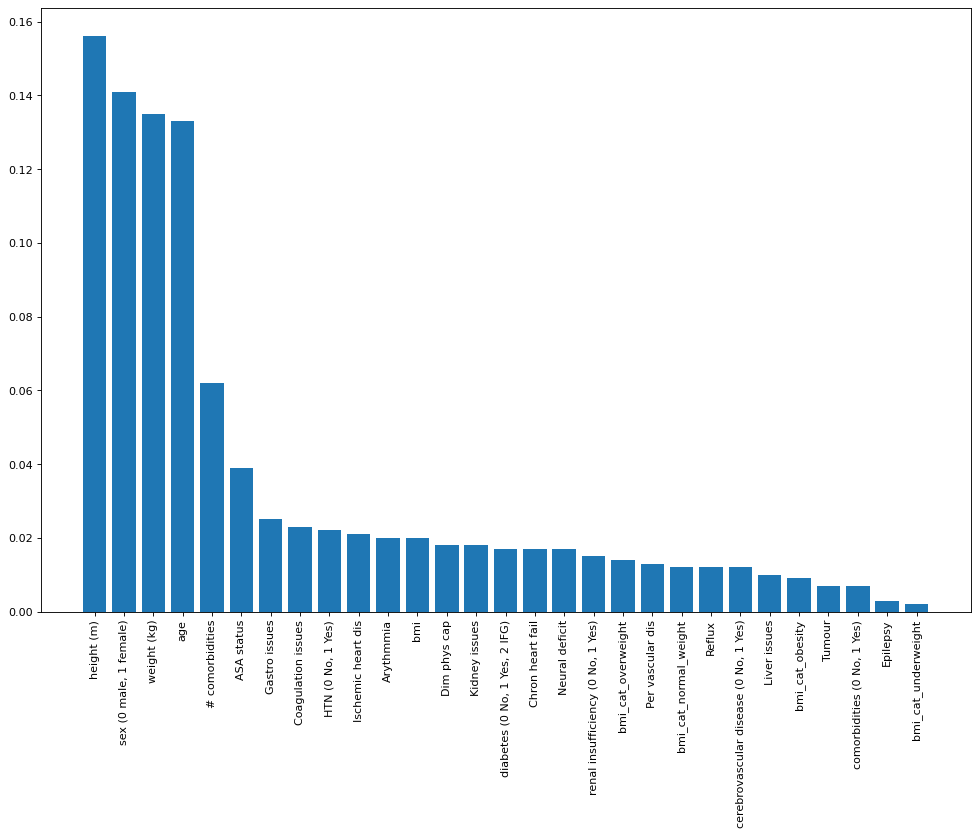

In [78]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(rfc_imp.index, height=rfc_imp['importance'])
plt.show()

## AdaBoost

In [79]:
ada = AdaBoostClassifier()
pipeline_ada = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", ada)]
)
pipeline_ada.fit(X_train, y_train)

ada_pred = pipeline_ada.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.64      0.73      0.68       336
         1.0       0.53      0.43      0.48       242

    accuracy                           0.60       578
   macro avg       0.59      0.58      0.58       578
weighted avg       0.60      0.60      0.60       578

----------------------------------------------------------
[[244  92]
 [137 105]]
----------------------------------------------------------
AUC: 62.58%
----------------------------------------------------------


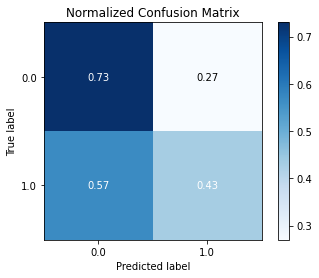

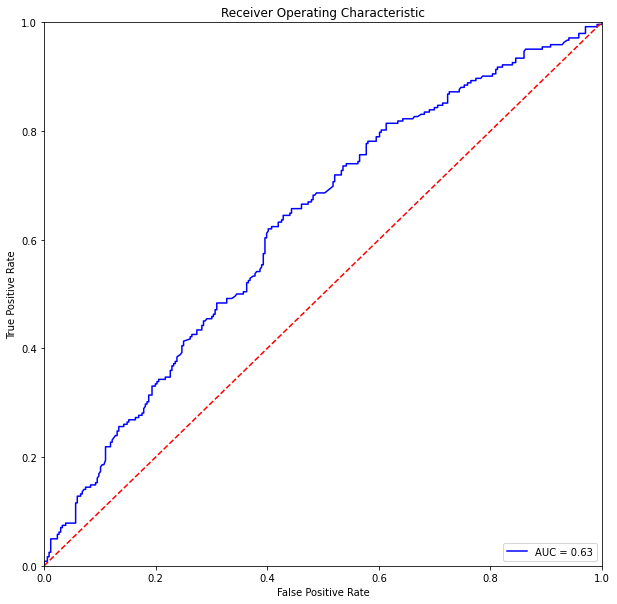

In [80]:
model_evaluation("AdaBoost", ada_pred, pipeline_ada)

In [81]:
ada_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(ada.feature_importances_, 3)}
)
ada_importances = ada_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [82]:
ada_imp = ada_importances.sort_values('importance', ascending=False)
ada_imp

importance
feature                                          
age                                          0.28
height (m)                                   0.26
weight (kg)                                  0.14
sex (0 male, 1 female)                       0.12
ASA status                                   0.06
Liver issues                                 0.02
Neural deficit                               0.02
bmi                                          0.02
renal insufficiency (0 No, 1 Yes)            0.02
cerebrovascular disease (0 No, 1 Yes)        0.02
diabetes (0 No, 1 Yes, 2 IFG)                0.02
Dim phys cap                                 0.02
bmi_cat_normal_weight                        0.00
bmi_cat_underweight                          0.00
Per vascular dis                             0.00
HTN (0 No, 1 Yes)                            0.00
bmi_cat_obesity                              0.00
Epilepsy                                     0.00
comorbidities (0 No, 1 Yes)                  0.00
Ischemic heart dis                           0.00
# comorbidities                              0.00
Chron heart fail                             0.00
Arythmmia                                    0.00
Gastro issues                                0.00
Reflux                                       0.00
Kidney issues                                0.00
Coagulation issues                           0.00
Tumour                                       0.00
bmi_cat_overweight                           0.00

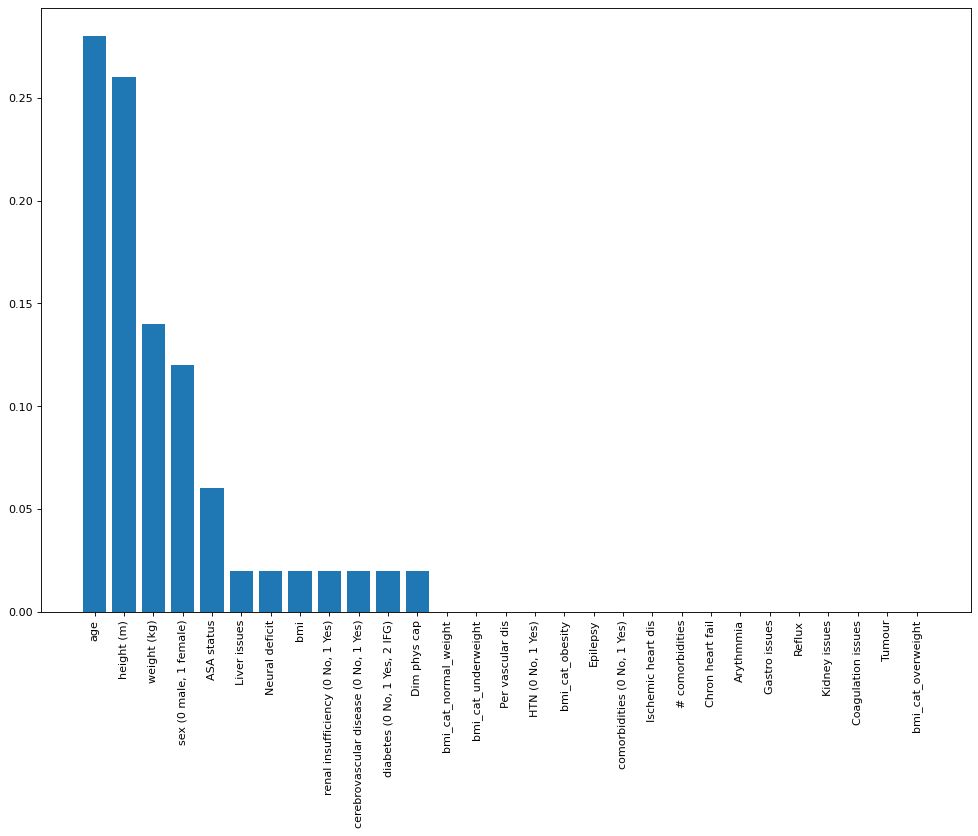

In [83]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(ada_imp.index, height=ada_imp['importance'])
plt.show()

## Catboost

In [ ]:
cat = CatBoostClassifier()
pipeline_cat = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", cat)]
)
pipeline_cat.fit(X_train, y_train)

cat_pred = pipeline_cat.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.73       336
         1.0       0.61      0.46      0.53       242

    accuracy                           0.65       578
   macro avg       0.64      0.63      0.63       578
weighted avg       0.65      0.65      0.64       578

----------------------------------------------------------
[[265  71]
 [130 112]]
----------------------------------------------------------
AUC: 68.11%
----------------------------------------------------------


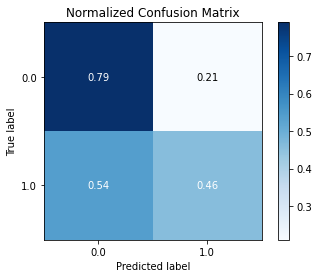

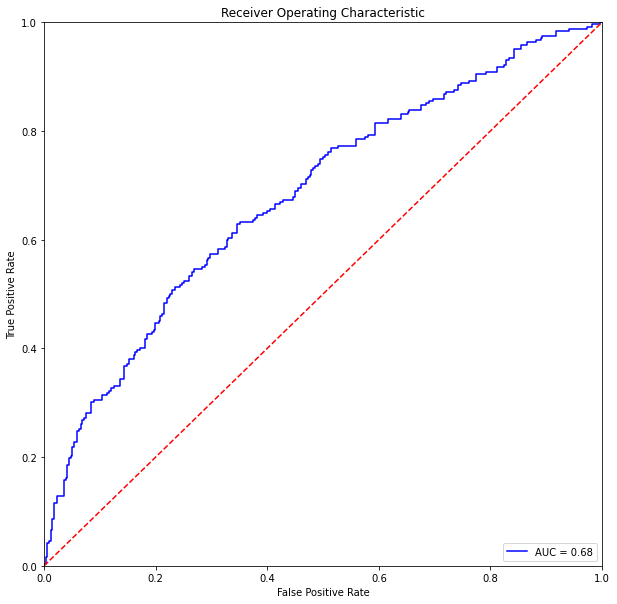

In [85]:
model_evaluation("CatBoost", cat_pred, pipeline_cat)

In [86]:
cat_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(cat.feature_importances_, 3)}
)
cat_importances = cat_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [87]:
cat_imp = cat_importances.sort_values('importance', ascending=False)
cat_imp

importance
feature                                          
sex (0 male, 1 female)                     16.148
weight (kg)                                12.628
age                                        11.476
height (m)                                 11.221
# comorbidities                             5.689
ASA status                                  5.264
Gastro issues                               3.346
Neural deficit                              3.166
Dim phys cap                                3.003
diabetes (0 No, 1 Yes, 2 IFG)               2.665
HTN (0 No, 1 Yes)                           2.529
Ischemic heart dis                          2.436
Chron heart fail                            2.115
Coagulation issues                          1.946
Kidney issues                               1.794
Liver issues                                1.765
Arythmmia                                   1.744
cerebrovascular disease (0 No, 1 Yes)       1.680
Per vascular dis                            1.615
bmi                                         1.505
bmi_cat_overweight                          1.478
Reflux                                      1.268
renal insufficiency (0 No, 1 Yes)           1.072
bmi_cat_normal_weight                       0.812
bmi_cat_obesity                             0.564
comorbidities (0 No, 1 Yes)                 0.427
Tumour                                      0.283
bmi_cat_underweight                         0.231
Epilepsy                                    0.131

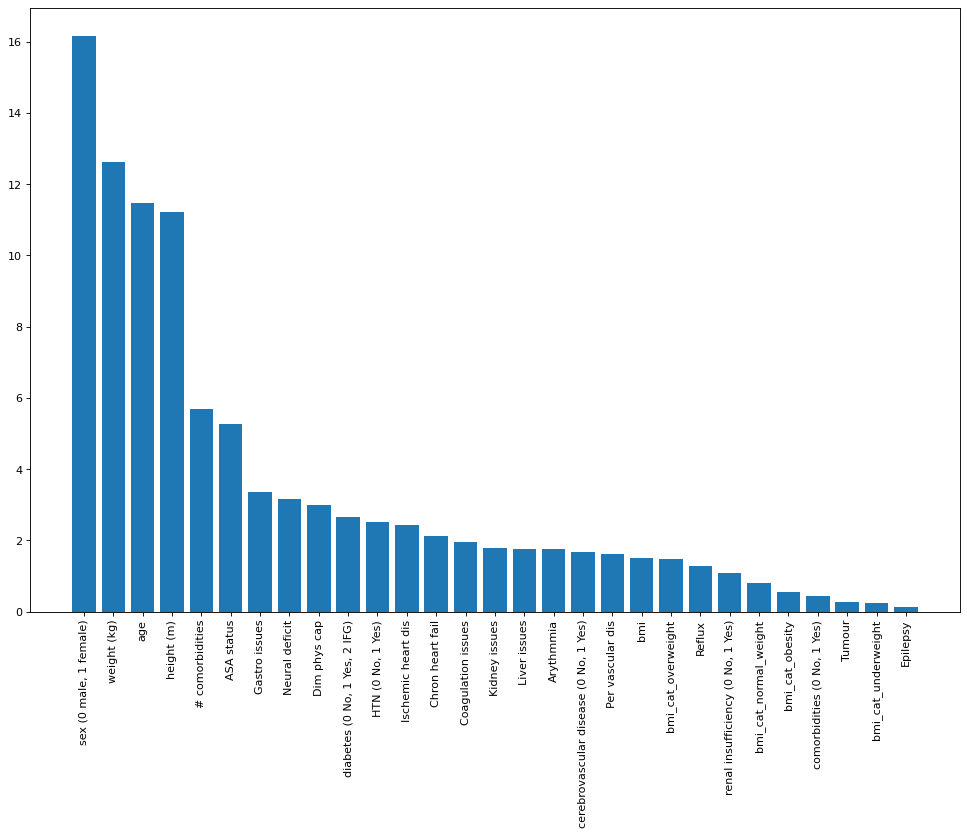

In [88]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(cat_imp.index, height=cat_imp['importance'])
plt.show()

## XGBoost

In [89]:
xgb = XGBClassifier()
pipeline_xgb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb)]
)
pipeline_xgb.fit(X_train, y_train)

xgb_pred = pipeline_xgb.predict(X_test)

[15:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70       336
         1.0       0.57      0.53      0.55       242

    accuracy                           0.64       578
   macro avg       0.63      0.62      0.62       578
weighted avg       0.64      0.64      0.64       578

----------------------------------------------------------
[[240  96]
 [113 129]]
----------------------------------------------------------
AUC: 66.58%
----------------------------------------------------------


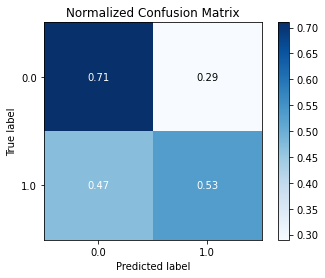

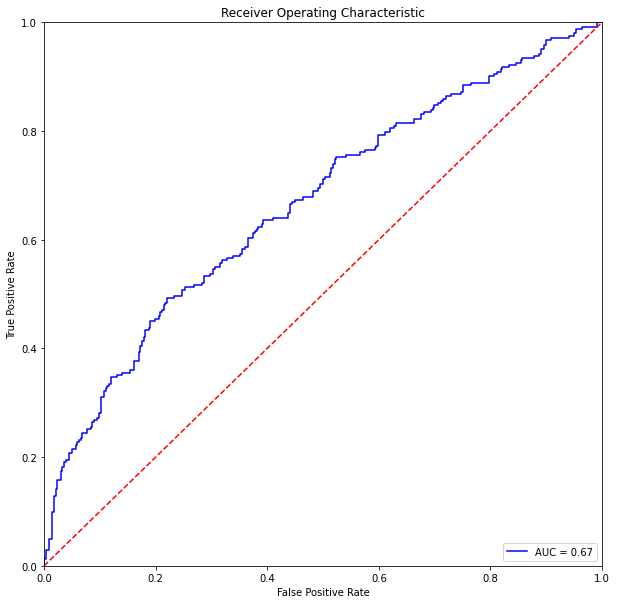

In [90]:
model_evaluation("XGBoost", xgb_pred, pipeline_xgb)

In [91]:
xgb_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(xgb.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [92]:
xgb_imp = xgb_importances.sort_values('importance', ascending=False)
xgb_imp

importance
feature                                          
Neural deficit                              0.092
Reflux                                      0.053
Liver issues                                0.050
ASA status                                  0.050
cerebrovascular disease (0 No, 1 Yes)       0.048
bmi_cat_overweight                          0.045
Dim phys cap                                0.042
sex (0 male, 1 female)                      0.039
Coagulation issues                          0.039
Kidney issues                               0.039
height (m)                                  0.037
weight (kg)                                 0.036
Tumour                                      0.036
bmi                                         0.034
Per vascular dis                            0.034
Arythmmia                                   0.034
HTN (0 No, 1 Yes)                           0.034
renal insufficiency (0 No, 1 Yes)           0.033
diabetes (0 No, 1 Yes, 2 IFG)               0.033
Gastro issues                               0.032
age                                         0.032
Ischemic heart dis                          0.030
Chron heart fail                            0.030
# comorbidities                             0.029
bmi_cat_normal_weight                       0.027
Epilepsy                                    0.015
bmi_cat_underweight                         0.000
bmi_cat_obesity                             0.000
comorbidities (0 No, 1 Yes)                 0.000

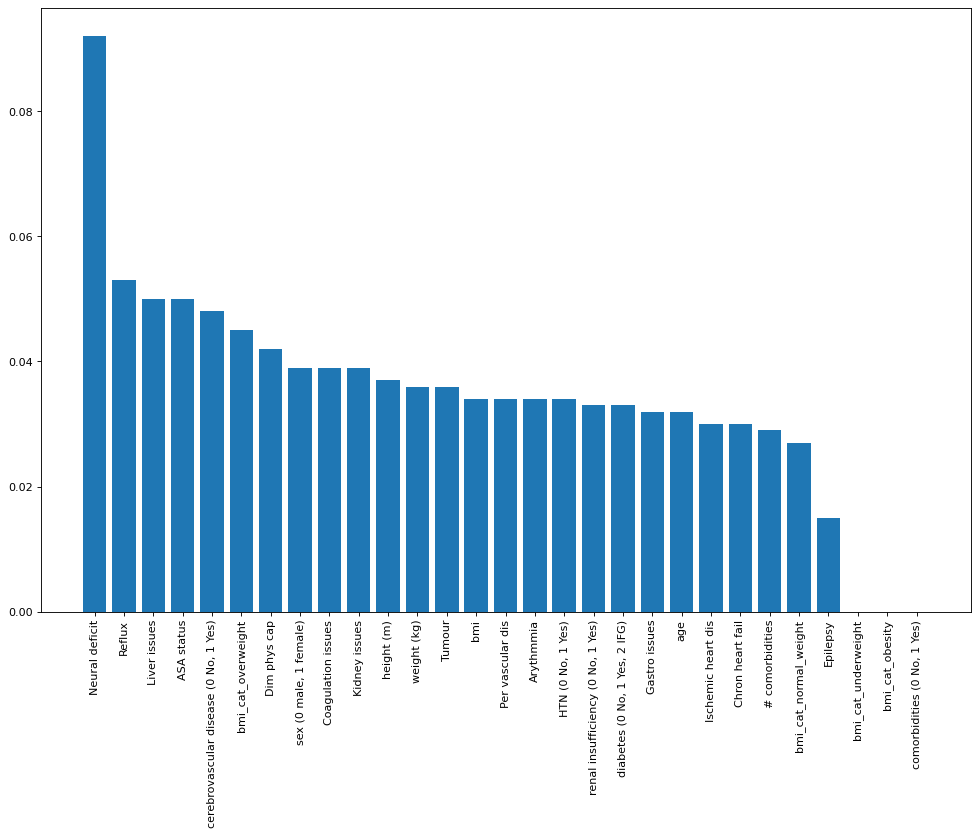

In [93]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(xgb_imp.index, height=xgb_imp['importance'])
plt.show()

# LightGBM (run it alone)

## Just for LightGBM

import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

### Select X and y values (predictor and outcome)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1:]  # POD

#Split the data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19
)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

lgbm = LGBMClassifier()
pipeline_lgbm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", lgbm)]
)
pipeline_lgbm.fit(X_train, y_train)

lgbm_pred = pipeline_lgbm.predict(X_test)

model_evaluation("LightGBM", lgbm_pred, pipeline_lgbm)

lgbm_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(lgbm.feature_importances_, 3)}
)
lgbm_importances = lgbm_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

lgbm_imp = lgbm_importances.sort_values('importance', ascending=False)
lgbm_imp

plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(lgbm_imp.index, height=lgbm_imp['importance'])
plt.show()

### LightGBM random search

rs_params = {

        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (1),
        'bagging_frequency': (5, 8),
        'max_depth': (2, 4, 6, 8, 10),
        'min_data_in_leaf': (50, 60, 70, 80, 90, 100, 110, 120, 130, 140),
        'num_leaves': (200, 300, 400, 500, 600),
        'learning_rate': np.around(np.linspace(0.01, 1, 15), decimals=2)

}

### Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=LGBMClassifier(), param_distributions=rs_params, cv = 5, n_iter=100,verbose=1, scoring="roc_auc")

### Train on training data-
rs_cv.fit(X_train, y_train, verbose=1)

LogisticRegression().get_params().keys()

rs_cv.best_params_

rs_cv.best_score_

rs_cv.best_estimator_.feature_importances_

#Feature importance for top 50 predictors
predictors = [x for x in X.columns]
feat_imp = pd.Series(rs_cv.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:50]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

# Model Summarize

In [94]:
# Lineal SVM dosn't have a AUC

model_auc_score

{'Logistic Regression': 0.6065279417552145,
 'KNN': 0.6607204348681621,
 'Naive Bayes': 0.641836383313656,
 'SVM with Radia Basis Function': 0.6372983077528531,
 'Random Forest': 0.7072080381739474,
 'AdaBoost': 0.625836284927194,
 'CatBoost': 0.6810802833530107,
 'XGBoost': 0.6657688902007084}

In [95]:
model = []
score = []
for k, v in model_auc_score.items():
    model.append(k)
    score.append(v)

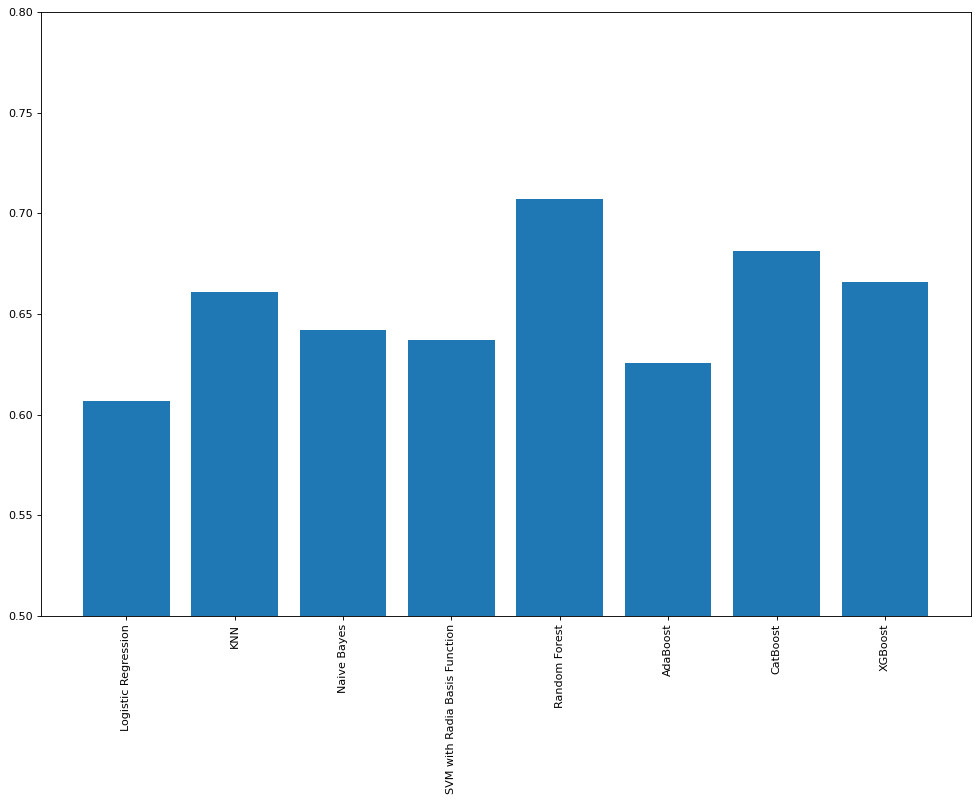

In [96]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(model, score)
plt.ylim(0.5, 0.8)
plt.show()

# Hyperparameter Tuning

## Randomized Search

### Random Forest

In [97]:
select_K_filter = SelectKBest(f_classif)

In [98]:
pipe_rand = Pipeline([("preprocessor", preprocessor), ("feat_select", select_K_filter), ("clf", rfc)])
k_option = range(3, len(X_train.columns))

In [99]:
# Hyperparameter tunning for the best model

rand_params = [
#     {
#         "feat_select__k": k_option,
#         "clf": [XGBClassifier()],
#         "clf__learning_rate": np.around(np.linspace(0.01, 0.08, 15), decimals=3),
#         "clf__n_estimators": np.linspace(50, 1200).astype(int),
#         "clf__max_depth": range(2, 10),
#         "clf__min_child_weight": [0, 1],
#     },
#     {
#         "feat_select__k": k_option,
#         "clf": [CatBoostClassifier()],
#         "clf__learning_rate": np.around(np.linspace(0.01, 1, 15), decimals=2),
#         "clf__depth": range(2, 10),
#         "clf__l2_leaf_reg": range(1, 9, 2),
#     },
    {
        "feat_select__k": k_option,
        "clf": [RandomForestClassifier(random_state=19)],
        "clf__n_estimators": list(range(50, 950, 100)),
        "clf__max_depth": [None, 1, 2, 5, 7, 10, 15, 25, 40],
    },
]

In [100]:
scoring = {
    'AUC': 'roc_auc',
    'f1_macro': 'f1_macro',
    'accuracy': 'accuracy',
    'sensitivity': 'recall',
    'specificity': make_scorer(recall_score,pos_label=0)
}
randsearch_cv = RandomizedSearchCV(
    pipe_rand, rand_params, n_iter=25, cv=4, scoring=scoring, refit = 'AUC', n_jobs=-1, verbose=1
)
randsearch_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'weight '
                                                                                '(kg)',
                                                                                'height '
                                                                                '(m)',
                                                                         

In [101]:
randsearch_cv.best_params_

{'feat_select__k': 28,
 'clf__n_estimators': 850,
 'clf__max_depth': 40,
 'clf': RandomForestClassifier(max_depth=40, n_estimators=850, random_state=19)}

## Grid Search

In [102]:
randsearch_cv.best_params_

{'feat_select__k': 28,
 'clf__n_estimators': 850,
 'clf__max_depth': 40,
 'clf': RandomForestClassifier(max_depth=40, n_estimators=850, random_state=19)}

In [103]:
n_est_ = randsearch_cv.best_params_["clf__n_estimators"]
k = randsearch_cv.best_params_["feat_select__k"]
depth = randsearch_cv.best_params_['clf__max_depth']
step = 2
range_ = 6

In [104]:
n_est_list = list(range(n_est_ - range_, n_est_ + range_, step))
n_est_list

[844, 846, 848, 850, 852, 854]

In [105]:
k_list = [k - 1, k, k + 1]
k_list

[27, 28, 29]

In [106]:
depth_list = [depth -2, depth -1, depth, depth + 1, depth + 2]

In [107]:
# learning_rate_list = np.around(
#     np.linspace(
#         learning_rate - learning_rate_range_, learning_rate + learning_rate_range_, 5
#     ),
#     decimals=2,
# )
# learning_rate_list

In [108]:
grid_model_pipeline = Pipeline([("preprocessor", preprocessor),("feat_select", select_K_filter), ("clf", rfc)])


grid_params = [
    {
        "feat_select__k": k_list,
        "clf": [RandomForestClassifier(random_state=19)],
        "clf__n_estimators": n_est_list,
        'clf__max_depth':depth_list ,
    }
]

In [109]:
# Create a grid search object

scoring = {
    'AUC': 'roc_auc',
    'f1_macro': 'f1_macro',
    'accuracy': 'accuracy',
    'sensitivity': 'recall',
    'specificity': make_scorer(recall_score,pos_label=0)
}

gridsearch_rf = GridSearchCV(
    grid_model_pipeline,
    grid_params,
    cv=4,
    scoring=scoring,
    refit='AUC',
    n_jobs=-1,
)

In [110]:
gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'weight '
                                                                          '(kg)',
                                                                          'height '
                                                                          '(m)',
                                                                          'bmi'])])),
                                       ('feat_select'

In [111]:
gridsearch_rf.best_params_

{'clf': RandomForestClassifier(max_depth=41, n_estimators=850, random_state=19),
 'clf__max_depth': 41,
 'clf__n_estimators': 850,
 'feat_select__k': 27}

In [112]:
gridsearch_rf.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weight (kg)',
                                                   'height (m)', 'bmi'])])),
                ('feat_select', SelectKBest(k=27)),
                ('clf',
                 RandomForestClassifier(max_depth=41, n_estimators=850,
                                        random_state=19))])

In [113]:
gridsearch_rf.best_score_

0.6729304454326366

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       336
         1.0       0.67      0.53      0.59       242

    accuracy                           0.69       578
   macro avg       0.69      0.67      0.67       578
weighted avg       0.69      0.69      0.69       578

----------------------------------------------------------
[[273  63]
 [114 128]]
----------------------------------------------------------
AUC: 71.56%
----------------------------------------------------------


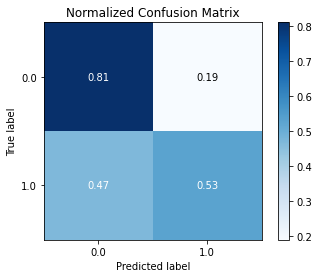

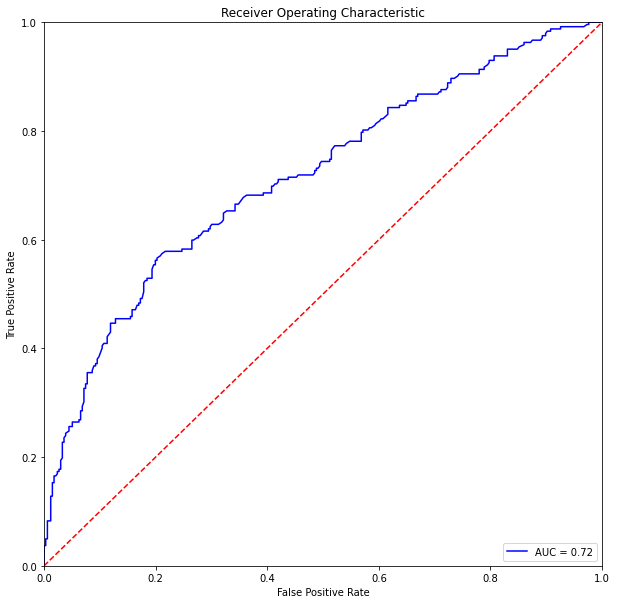

In [114]:
best_pred = gridsearch_rf.best_estimator_.predict(X_test)

model_evaluation("Random Forest", best_pred, gridsearch_rf.best_estimator_)

## Precision from best model

In [115]:
rf_best_pred_proba = gridsearch_rf.best_estimator_.predict_proba(X_test)
ranges_acc(rf_best_pred_proba, 'Random Forest (Grid Search)', 5)

Accuracy for the model Random Forest (Grid Search):

The accuracy when the model is predicting POD with a probability of 50.0% - 60.0% is: 
	 55.68%
The accuracy when the model is predicting POD with a probability of 60.0% - 70.0% is: 
	 69.23%
The accuracy when the model is predicting POD with a probability of 70.0% - 80.0% is: 
	 78.12%
The accuracy when the model is predicting POD with a probability of 80.0% - 90.0% is: 
	 87.5%
The accuracy when the model is predicting POD with a probability of 90.0% - 100.0% is: 
	 100.0%


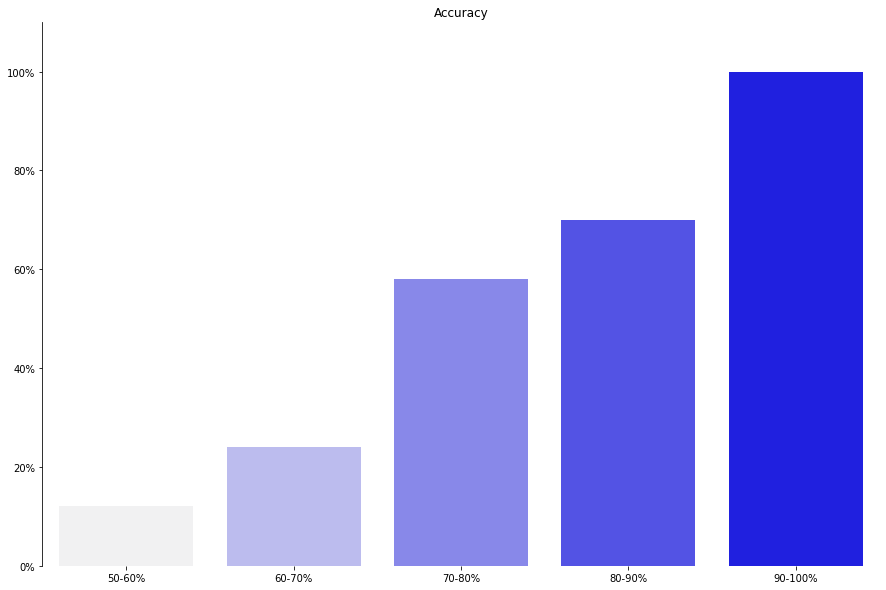

In [116]:
fig, axs = plt.subplots(figsize=(15,10))
prob_plot = ['50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
acc_plot = [56, 62, 79, 85, 100]


ax = sns.barplot(x=prob_plot, y=acc_plot, palette='light:b')

ax.spines['left'].set_color('black')
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f}%'.format(x) for x in vals])
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(50)
ax.grid(False)
ax.set_title('Accuracy')
plt.show()

Text(0.5, 1.0, 'Accuracy')

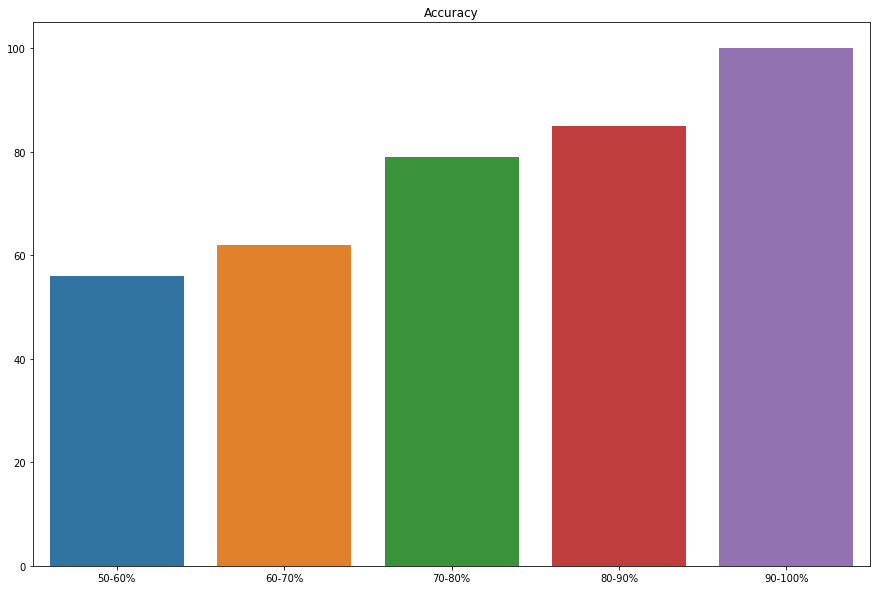

In [117]:
fig, axs = plt.subplots(figsize=(15,10))
prob_plot = ['50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
acc_plot = [56, 62, 79, 85, 100]

ax = sns.barplot(x=prob_plot, y=acc_plot)
sns.color_palette("hls", 8)
ax.grid(False)
ax.set_title('Accuracy')

### Compare scores with Random Forest and cross validation

In [118]:
rfc = RandomForestClassifier(random_state=19)

pipeline_rfc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rfc)]
)

rfc_score_cv = np.mean(cross_val_score(pipeline_rfc, X_train, y_train, scoring="roc_auc", cv=4))
rfc_score_cv

0.6675616440052168

In [119]:
#Cross Validation with best_estimator from gridsearch

rfc_score_best_cv = np.mean(cross_val_score(gridsearch_rf.best_estimator_, X_train, y_train, scoring="roc_auc", cv=4))
rfc_score_best_cv

0.6729304454326366

## Overlap between results (Checking with RandomizedSearch)

In [120]:
#RUN RANDOMSEARCH TOGETHER
#imports

def applyBestEstimator(best_estimator):
    best_estimator.fit(X_train,y_train)
    pred = best_estimator.predict(X_test)
    print(classification_report(y_test, pred))
    print(roc_auc_score(y_test,best_estimator.predict_proba(X_test)[:,1]))

    CM = confusion_matrix(y_test, pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))

    print(f"here are the values for the estimator: {best_estimator['clf']}")

    print('-'*50)

    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'ROC: {roc_auc_score(y_test,best_estimator.predict_proba(X_test)[:,1])}')
    

#setting all variables
scoring = {
    'AUC': 'roc_auc',
    'f1_macro': 'f1_macro',
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

#define all params for the classifiers
rfc_params = {
        "feat_select__k": k_option,
        "clf": [RandomForestClassifier(random_state = 19)],
        "clf__n_estimators": list(range(50, 950, 100)),
        "clf__max_depth": [None, 1, 2, 5, 7, 10, 15, 25, 40]
    }

xgb_params = {
        "feat_select__k": k_option,
        "clf": [XGBClassifier()],
        "clf__learning_rate": np.around(np.linspace(0.01, 0.08, 15), decimals=3),
        "clf__n_estimators": np.linspace(50, 1200).astype(int),
        "clf__max_depth": range(2, 10),
        "clf__min_child_weight": [0, 1]
    }

cat_params = {
        "feat_select__k": k_option,
        "clf": [CatBoostClassifier()],
        "clf__learning_rate": np.around(np.linspace(0.01, 1, 15), decimals=2),
        "clf__depth": range(2, 10),
        "clf__l2_leaf_reg": range(1, 9, 2)
    }

ada_params = {
        "feat_select__k": k_option,
        "clf": [AdaBoostClassifier()],
        "clf__n_estimators": np.linspace(25, 600).astype(int),
        "clf__learning_rate": np.around(np.linspace(0.01, 1, 15), decimals=2)
    }

#create base clfs
rfc = RandomForestClassifier(random_state = 19)
xgb = XGBClassifier()
cat = CatBoostClassifier()
ada = AdaBoostClassifier()


def randSearchAlone(clf,params):
    pipe_clf = Pipeline(steps=[("preprocessor", preprocessor), ("feat_select", select_K_filter),("clf",clf)])
    rand_search = RandomizedSearchCV(pipe_clf, params, n_iter=25, cv=4, scoring=scoring, refit = 'AUC', n_jobs=-1,          verbose=1)
    rand_search.fit(X_train,y_train)
    best_estimator = rand_search.best_estimator_
    best_params = rand_search.best_params_
    cv_results = rand_search.cv_results_
    best_score = rand_search.best_score_
    return best_estimator,best_params,cv_results, best_score

def getAllScores(cv_results):
    print(f"AUC: {mean(cv_results['mean_test_AUC'])}")
    print(f"f1_macro: {mean(cv_results['mean_test_f1_macro'])}")
    print(f"accuracy: {mean(cv_results['mean_test_accuracy'])}")
    print(f"sensitivity: {mean(cv_results['mean_test_sensitivity'])}")
    print(f"specificity: {mean(cv_results['mean_test_specificity'])}")

In [121]:
# Check best randomized parameters for all best models and probability predictions

best_estimator_xgb,best_params_xgb,cv_results_xgb,best_score_xgb = randSearchAlone(xgb,xgb_params)
xgb_pred = best_estimator_xgb.predict(X_test)

rfc_pred = gridsearch_rf.best_estimator_.predict(X_test)

best_estimator_ada,best_params_ada,cv_results_ada,best_score_ada = randSearchAlone(ada, ada_params)
ada_pred = best_estimator_ada.predict(X_test)

best_estimator_cat,best_params_cat,cv_results_cat,best_score_cat = randSearchAlone(cat, cat_params)
cat_pred = best_estimator_cat.predict(X_test)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[15:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
0:	learn: 0.6719463	total: 5.21ms	remaining: 5.21s
1:	learn: 0.6516780	total: 11ms	remaining: 5.5s
2:	learn: 0.6327475	total: 16.3ms	remaining: 5.42s
3:	learn: 0.6174921	total: 21.4ms	remaining: 5.32s
4:	learn: 0.6020196	total: 26.6ms	remaining: 5.3s
5:	learn: 0.5966134	total: 32.2ms	remaining: 5.34s
6:	learn: 0.5902008	total: 37.5ms	remaining: 5.33s
7:	learn: 0.5824379	total: 43.2ms	remaining: 5.36s
8:	learn: 0.5738912	total: 48.5ms	remaining: 5.34s
9:	learn: 0.5701882	total: 55.4ms	remaining: 5.48

In [122]:
overlapping(xgb_pred, 'XGBoost', rfc_pred, 'Random Forest')

The overlapping in the results between XGBoost and Random Forest is:
83.39%


In [123]:
overlapping(xgb_pred, 'XGBoost', ada_pred, 'AdaBoost')

The overlapping in the results between XGBoost and AdaBoost is:
64.71%


In [124]:
overlapping(xgb_pred, 'XGBoost', cat_pred, 'CatBoost')

The overlapping in the results between XGBoost and CatBoost is:
86.33%


In [125]:
overlapping(ada_pred, 'AdaBoost', rfc_pred, 'Randon Forest')

The overlapping in the results between AdaBoost and Randon Forest is:
73.7%


In [126]:
overlapping(cat_pred, 'CatBoost', rfc_pred, 'Random forest')

The overlapping in the results between CatBoost and Random forest is:
83.56%


In [127]:
overlapping(ada_pred, 'Ada Boost', cat_pred, 'CatBoost')

The overlapping in the results between Ada Boost and CatBoost is:
64.53%


In [128]:
df_overlap = X_test.copy()

In [129]:
df_overlap['cat_pred'] = cat_pred
df_overlap['xgb_pred'] = xgb_pred
df_overlap['rfc_pred'] = rfc_pred
df_overlap['real_pred'] = y_test

In [130]:
df_overlapped = df_overlap[(df_overlap['cat_pred'] == df_overlap['xgb_pred']) & (df_overlap['xgb_pred'] == df_overlap['rfc_pred']) & (df_overlap['rfc_pred'] == df_overlap['real_pred'])]
df_non_overlapped = df_overlap[(df_overlap['cat_pred'] != df_overlap['xgb_pred']) | (df_overlap['xgb_pred'] != df_overlap['rfc_pred']) |(df_overlap['rfc_pred'] != df_overlap['real_pred'])]

In [132]:
unique_original = Counter(df['sex (0 male, 1 female)'])
list_unique_original = [x for k, x in unique_original.items()]

<function matplotlib.pyplot.show(close=None, block=None)>

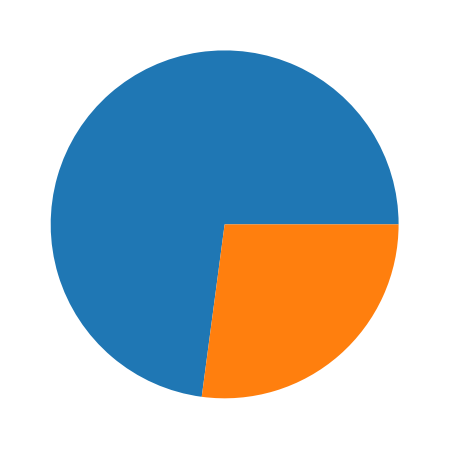

In [133]:
plt.figure(figsize=(16,8))
# plot chart
plt.pie(list_unique_original)
plt.show

In [134]:
unique_overlapped = Counter(df_overlapped['sex (0 male, 1 female)'])
list_unique_overlapped = [x for k, x in unique_overlapped.items()]

<function matplotlib.pyplot.show(close=None, block=None)>

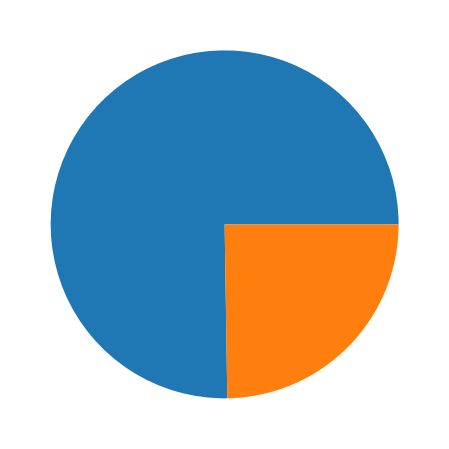

In [135]:
plt.figure(figsize=(16,8))
# plot chart
plt.pie(list_unique_overlapped)
plt.show

In [136]:
df_overlapped.describe()

sex (0 male, 1 female)         age  weight (kg)  height (m)  \
count              311.000000  311.000000   311.000000  311.000000   
mean                 0.247588   70.717042    79.814148    1.708032   
std                  0.432307    6.241148    14.884590    0.082934   
min                  0.000000   60.000000    46.000000    1.480000   
25%                  0.000000   66.000000    70.000000    1.650000   
50%                  0.000000   70.000000    80.000000    1.700000   
75%                  0.000000   76.000000    88.000000    1.764000   
max                  1.000000   85.000000   135.000000    1.920000   

              bmi  bmi_cat_underweight  bmi_cat_normal_weight  \
count  311.000000           311.000000             311.000000   
mean    27.301666             0.006431               0.315113   
std      4.475983             0.080063               0.465309   
min     17.746229             0.000000               0.000000   
25%     24.376731             0.000000               0.000000   
50%     26.769780             0.000000               0.000000   
75%     29.747415             0.000000               1.000000   
max     42.517007             1.000000               1.000000   

       bmi_cat_overweight  bmi_cat_obesity  ASA status  Epilepsy  \
count          311.000000       311.000000  311.000000     311.0   
mean             0.440514         0.237942    3.170418       0.0   
std              0.497249         0.426510    0.811148       0.0   
min              0.000000         0.000000    0.000000       0.0   
25%              0.000000         0.000000    3.000000       0.0   
50%              0.000000         0.000000    3.000000       0.0   
75%              1.000000         0.000000    4.000000       0.0   
max              1.000000         1.000000    6.000000       0.0   

       Neural deficit  Dim phys cap  Ischemic heart dis  Per vascular dis  \
count      311.000000    311.000000          311.000000        311.000000   
mean         0.086817      0.270096            0.546624          0.131833   
std          0.282020      0.444725            0.498624          0.338854   
min          0.000000      0.000000            0.000000          0.000000   
25%          0.000000      0.000000            0.000000          0.000000   
50%          0.000000      0.000000            1.000000          0.000000   
75%          0.000000      1.000000            1.000000          0.000000   
max          1.000000      1.000000            1.000000          1.000000   

       Chron heart fail   Arythmmia  Gastro issues      Reflux  Liver issues  \
count        311.000000  311.000000     311.000000  311.000000    311.000000   
mean           0.147910    0.260450       0.453376    0.096463      0.051447   
std            0.355583    0.439588       0.498624    0.295701      0.221264   
min            0.000000    0.000000       0.000000    0.000000      0.000000   
25%            0.000000    0.000000       0.000000    0.000000      0.000000   
50%            0.000000    0.000000       0.000000    0.000000      0.000000   
75%            0.000000    1.000000       1.000000    0.000000      0.000000   
max            1.000000    1.000000       1.000000    1.000000      1.000000   

       Kidney issues  Coagulation issues      Tumour  \
count     311.000000          311.000000  311.000000   
mean        0.173633            0.366559    0.048232   
std         0.379404            0.482641    0.214600   
min         0.000000            0.000000    0.000000   
25%         0.000000            0.000000    0.000000   
50%         0.000000            0.000000    0.000000   
75%         0.000000            1.000000    0.000000   
max         1.000000            1.000000    1.000000   

       renal insufficiency (0 No, 1 Yes)  \
count                         311.000000   
mean                            0.083601   
std                             0.277235   
min                             0.000000   
25%                             0.000

In [137]:
unique_non_overlapped = Counter(df_non_overlapped['sex (0 male, 1 female)'])
list_unique_non_overlapped = [x for k, x in unique_non_overlapped.items()]

<function matplotlib.pyplot.show(close=None, block=None)>

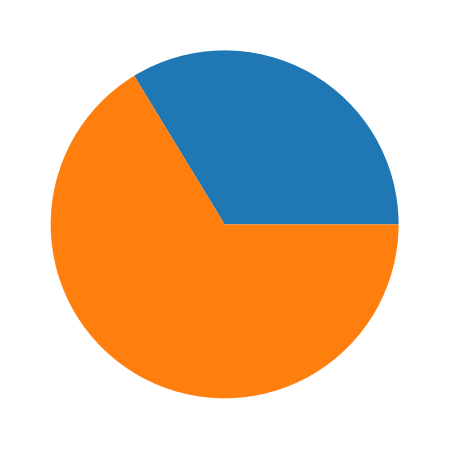

In [138]:
plt.figure(figsize=(16,8))
# plot chart
plt.pie(list_unique_non_overlapped)
plt.show

In [139]:
df_non_overlapped.describe()

sex (0 male, 1 female)         age  weight (kg)  height (m)  \
count              267.000000  267.000000   267.000000  267.000000   
mean                 0.337079   71.775281    77.828464    1.692966   
std                  0.473600    6.482631    14.678410    0.082097   
min                  0.000000   60.000000    43.000000    1.500000   
25%                  0.000000   67.000000    69.000000    1.640000   
50%                  0.000000   72.000000    76.000000    1.700000   
75%                  1.000000   76.000000    86.000000    1.740000   
max                  1.000000   85.000000   156.000000    1.980000   

              bmi  bmi_cat_underweight  bmi_cat_normal_weight  \
count  267.000000           267.000000             267.000000   
mean    27.155857             0.018727               0.337079   
std      4.893132             0.135812               0.473600   
min     16.796875             0.000000               0.000000   
25%     24.337480             0.000000               0.000000   
50%     26.438071             0.000000               0.000000   
75%     29.271392             0.000000               1.000000   
max     60.937500             1.000000               1.000000   

       bmi_cat_overweight  bmi_cat_obesity  ASA status    Epilepsy  \
count          267.000000       267.000000  267.000000  267.000000   
mean             0.434457         0.209738    3.146067    0.007491   
std              0.496616         0.407886    0.749193    0.086386   
min              0.000000         0.000000    0.000000    0.000000   
25%              0.000000         0.000000    3.000000    0.000000   
50%              0.000000         0.000000    3.000000    0.000000   
75%              1.000000         0.000000    4.000000    0.000000   
max              1.000000         1.000000    5.000000    1.000000   

       Neural deficit  Dim phys cap  Ischemic heart dis  Per vascular dis  \
count      267.000000    267.000000          267.000000        267.000000   
mean         0.119850      0.187266            0.550562          0.108614   
std          0.325396      0.390857            0.498371          0.311739   
min          0.000000      0.000000            0.000000          0.000000   
25%          0.000000      0.000000            0.000000          0.000000   
50%          0.000000      0.000000            1.000000          0.000000   
75%          0.000000      0.000000            1.000000          0.000000   
max          1.000000      1.000000            1.000000          1.000000   

       Chron heart fail   Arythmmia  Gastro issues      Reflux  Liver issues  \
count        267.000000  267.000000     267.000000  267.000000    267.000000   
mean           0.119850    0.250936       0.441948    0.093633      0.041199   
std            0.325396    0.434366       0.497551    0.291864      0.199122   
min            0.000000    0.000000       0.000000    0.000000      0.000000   
25%            0.000000    0.000000       0.000000    0.000000      0.000000   
50%            0.000000    0.000000       0.000000    0.000000      0.000000   
75%            0.000000    0.500000       1.000000    0.000000      0.000000   
max            1.000000    1.000000       1.000000    1.000000      1.000000   

       Kidney issues  Coagulation issues      Tumour  \
count     267.000000          267.000000  267.000000   
mean        0.168539            0.262172    0.033708   
std         0.375048            0.440642    0.180815   
min         0.000000            0.000000    0.000000   
25%         0.000000            0.000000    0.000000   
50%         0.000000            0.000000    0.000000   
75%         0.000000            1.000000    0.000000   
max         1.000000            1.000000    1.000000   

       renal insufficiency (0 No, 1 Yes)  \
count                         267.000000   
mean                            0.071161   
std                             0.257576   
min                             0.000000   
25%                

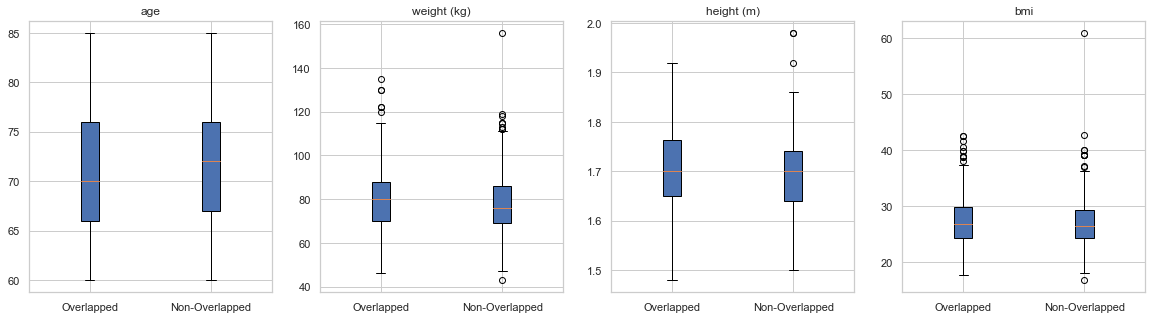

In [140]:
sns.set()
sns.set_style("whitegrid")

fig, axs = plt.subplots(1, 4, figsize = (20,5))
i = 0
for column in numeric_features:
    ax = axs[i]
    ax.set_title(column)
    ax.boxplot([df_overlapped[column], df_non_overlapped[column]], labels=['Overlapped', 'Non-Overlapped'], patch_artist=True)
    plt.show
    i += 1

## Checking precision on the ranges

In [141]:
xgb_pred_proba = best_estimator_xgb.predict_proba(X_test)

rfc_pred_proba = gridsearch_rf.best_estimator_.predict_proba(X_test)

ada_pred_proba = best_estimator_ada.predict_proba(X_test)

cat_pred_proba = best_estimator_cat.predict_proba(X_test)

In [142]:
ranges_acc(xgb_pred_proba, 'XGBoost', 5)

Accuracy for the model XGBoost:

The accuracy when the model is predicting POD with a probability of 50.0% - 60.0% is: 
	 37.84%
The accuracy when the model is predicting POD with a probability of 60.0% - 70.0% is: 
	 54.17%
The accuracy when the model is predicting POD with a probability of 70.0% - 80.0% is: 
	 51.72%
The accuracy when the model is predicting POD with a probability of 80.0% - 90.0% is: 
	 51.35%
The accuracy when the model is predicting POD with a probability of 90.0% - 100.0% is: 
	 69.0%


In [143]:
ranges_acc(rfc_pred_proba, 'Random Forest', 5)

Accuracy for the model Random Forest:

The accuracy when the model is predicting POD with a probability of 50.0% - 60.0% is: 
	 55.68%
The accuracy when the model is predicting POD with a probability of 60.0% - 70.0% is: 
	 69.23%
The accuracy when the model is predicting POD with a probability of 70.0% - 80.0% is: 
	 78.12%
The accuracy when the model is predicting POD with a probability of 80.0% - 90.0% is: 
	 87.5%
The accuracy when the model is predicting POD with a probability of 90.0% - 100.0% is: 
	 100.0%


In [144]:
ranges_acc(ada_pred_proba, 'AdaBoost', 5)

Accuracy for the model AdaBoost:

The accuracy when the model is predicting POD with a probability of 50.0% - 60.0% is: 
	 58.68%
The accuracy when the model is predicting POD with a probability of 60.0% - 70.0% is: 
	 nan%
The accuracy when the model is predicting POD with a probability of 70.0% - 80.0% is: 
	 nan%
The accuracy when the model is predicting POD with a probability of 80.0% - 90.0% is: 
	 nan%
The accuracy when the model is predicting POD with a probability of 90.0% - 100.0% is: 
	 nan%


In [145]:
ranges_acc(cat_pred_proba, 'CatBoost', 5)

Accuracy for the model CatBoost:

The accuracy when the model is predicting POD with a probability of 50.0% - 60.0% is: 
	 39.13%
The accuracy when the model is predicting POD with a probability of 60.0% - 70.0% is: 
	 50.0%
The accuracy when the model is predicting POD with a probability of 70.0% - 80.0% is: 
	 59.09%
The accuracy when the model is predicting POD with a probability of 80.0% - 90.0% is: 
	 50.0%
The accuracy when the model is predicting POD with a probability of 90.0% - 100.0% is: 
	 69.37%


# Clustering

In [146]:
# Lets check the performance of all models separating the data in different clusters to see how it affects to the performance

In [147]:
numeric_features = [
    "age",
    "weight (kg)",
    "height (m)",
    "bmi"
]

In [148]:
# The numeric data is standard-scaled

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])


# The column transformer allows to apply different preprocessing steps for individual sets of columns
# transformers must support fit and transform.
# Special-cased strings ‘drop’ and ‘passthrough’ are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)],
        remainder='passthrough'
)

In [149]:
r_seed = 23  # random seed to use during modeling for reproducability

cluster_errors = []

for i in range(1, 15):
    n_clusters = i
    kmeans_pipeline = Pipeline(
        [
            ("scaler", preprocessor),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0, n_jobs=1),
            ),
        ]
    )
    kmeans_pipeline.fit(df)
    kmeans_pipeline.predict(df)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)

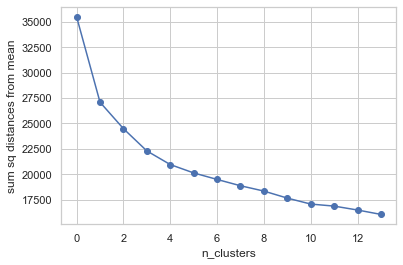

In [150]:
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

In [151]:
n_clusters = 3
kmeans_pipeline = Pipeline(
    [
        ("scaler", preprocessor),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0)),
    ]
)
kmeans_pipeline.fit(X)
labels = kmeans_pipeline.predict(X)
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_



In [152]:
Counter(labels) # The cluster are quite balanced

Counter({0: 894, 1: 1183, 2: 812})

In [153]:
Xt = df.copy()

In [154]:
#Insert the outputs for testiing

Xt.insert(loc=30, column='cluster', value=labels)

# Drop Creatinin and Neuromuscular, bmi_underweight and Epilepsy because of the missing values and imbalanced data

Xt.drop(['Neuromuscular', 'urgency (1 elective, 2 urgent, 3 emergency)'], axis=1, inplace=True)

In [155]:
# Check if the outputs are imbalanced somehow

Xt0 = Xt[Xt['cluster'] == 0]
Xt1 = Xt[Xt['cluster'] == 1]
Xt2 = Xt[Xt['cluster'] == 2]

In [156]:
Xt0.describe()

sex (0 male, 1 female)         age  weight (kg)  height (m)  \
count              894.000000  894.000000   894.000000  894.000000   
mean                 0.131991   68.903803    91.202908    1.736112   
std                  0.338671    6.026976    13.587615    0.090073   
min                  0.000000   60.000000    66.000000    0.800000   
25%                  0.000000   64.000000    82.000000    1.690000   
50%                  0.000000   68.000000    88.000000    1.740000   
75%                  0.000000   73.000000    99.000000    1.790000   
max                  1.000000   85.000000   150.000000    1.980000   

              bmi  bmi_cat_underweight  bmi_cat_normal_weight  \
count  894.000000                894.0             894.000000   
mean    30.506540                  0.0               0.077181   
std      6.650104                  0.0               0.267028   
min     20.221607                  0.0               0.000000   
25%     27.041644                  0.0               0.000000   
50%     29.407596                  0.0               0.000000   
75%     32.653061                  0.0               0.000000   
max    128.125000                  0.0               1.000000   

       bmi_cat_overweight  bmi_cat_obesity  ASA status    Epilepsy  \
count          894.000000       894.000000  894.000000  894.000000   
mean             0.475391         0.447427    3.208054    0.006711   
std              0.499674         0.497507    0.540936    0.081694   
min              0.000000         0.000000    1.000000    0.000000   
25%              0.000000         0.000000    3.000000    0.000000   
50%              0.000000         0.000000    3.000000    0.000000   
75%              1.000000         1.000000    3.000000    0.000000   
max              1.000000         1.000000    6.000000    1.000000   

       Neural deficit  Dim phys cap  Ischemic heart dis  Per vascular dis  \
count      894.000000    894.000000          894.000000        894.000000   
mean         0.068233      0.319911            0.701342          0.064877   
std          0.252286      0.466703            0.457926          0.246446   
min          0.000000      0.000000            0.000000          0.000000   
25%          0.000000      0.000000            0.000000          0.000000   
50%          0.000000      0.000000            1.000000          0.000000   
75%          0.000000      1.000000            1.000000          0.000000   
max          1.000000      1.000000            1.000000          1.000000   

       Chron heart fail   Arythmmia  Gastro issues      Reflux  Liver issues  \
count        894.000000  894.000000     894.000000  894.000000    894.000000   
mean           0.107383    0.191275       0.551454    0.073826      0.036913   
std            0.309772    0.393525       0.497624    0.261633      0.188653   
min            0.000000    0.000000       0.000000    0.000000      0.000000   
25%            0.000000    0.000000       0.000000    0.000000      0.000000   
50%            0.000000    0.000000       1.000000    0.000000      0.000000   
75%            0.000000    0.000000       1.000000    0.000000      0.000000   
max            1.000000    1.000000       1.000000    1.000000      1.000000   

       Kidney issues  Coagulation issues      Tumour  \
count     894.000000          894.000000  894.000000   
mean        0.115213            0.249441    0.026846   
std         0.319457            0.432932    0.161723   
min         0.000000            0.000000    0.000000   
25%         0.000000            0.000000    0.000000   
50%         0.000000            0.000000    0.000000   
75%         0.000000            0.000000    0.000000   
max         1.000000            1.000000    1.000000   

       renal insufficiency (0 No, 1 Yes)  \
count                         894.000000   
mean                            0.093960   
std                             0.291936   
min                             0.000000   
25%                

In [157]:
Xt1.describe()

sex (0 male, 1 female)          age  weight (kg)   height (m)  \
count             1183.000000  1183.000000  1183.000000  1183.000000   
mean                 0.344886    72.164835    72.660524     1.691817   
std                  0.475532     6.656349    11.373641     0.077753   
min                  0.000000    60.000000    33.000000     1.450000   
25%                  0.000000    67.000000    65.000000     1.640000   
50%                  0.000000    72.000000    72.000000     1.700000   
75%                  1.000000    77.000000    80.000000     1.740000   
max                  1.000000    85.000000   112.000000     1.980000   

               bmi  bmi_cat_underweight  bmi_cat_normal_weight  \
count  1183.000000          1183.000000            1183.000000   
mean     25.357431             0.015216               0.495351   
std       3.475563             0.122461               0.500190   
min      12.890625             0.000000               0.000000   
25%      23.116248             0.000000               0.000000   
50%      24.913495             0.000000               0.000000   
75%      27.437721             0.000000               1.000000   
max      40.390184             1.000000               1.000000   

       bmi_cat_overweight  bmi_cat_obesity   ASA status     Epilepsy  \
count         1183.000000      1183.000000  1183.000000  1183.000000   
mean             0.398140         0.091293     3.086221     0.005917   
std              0.489722         0.288148     0.827410     0.076728   
min              0.000000         0.000000     0.000000     0.000000   
25%              0.000000         0.000000     3.000000     0.000000   
50%              0.000000         0.000000     3.000000     0.000000   
75%              1.000000         0.000000     4.000000     0.000000   
max              1.000000         1.000000     6.000000     1.000000   

       Neural deficit  Dim phys cap  Ischemic heart dis  Per vascular dis  \
count     1183.000000   1183.000000         1183.000000       1183.000000   
mean         0.026205      0.169062            0.263736          0.018597   
std          0.159811      0.374965            0.440844          0.135153   
min          0.000000      0.000000            0.000000          0.000000   
25%          0.000000      0.000000            0.000000          0.000000   
50%          0.000000      0.000000            0.000000          0.000000   
75%          0.000000      0.000000            1.000000          0.000000   
max          1.000000      1.000000            1.000000          1.000000   

       Chron heart fail    Arythmmia  Gastro issues       Reflux  \
count       1183.000000  1183.000000    1183.000000  1183.000000   
mean           0.046492     0.066779       0.437025     0.038884   
std            0.210637     0.249745       0.496228     0.193401   
min            0.000000     0.000000       0.000000     0.000000   
25%            0.000000     0.000000       0.000000     0.000000   
50%            0.000000     0.000000       0.000000     0.000000   
75%            0.000000     0.000000       1.000000     0.000000   
max            1.000000     1.000000       1.000000     1.000000   

       Liver issues  Kidney issues  Coagulation issues       Tumour  \
count   1183.000000    1183.000000         1183.000000  1183.000000   
mean       0.020287       0.069315            0.114962     0.010144   
std        0.141041       0.254097            0.319111     0.100246   
min        0.000000       0.000000            0.000000     0.000000   
25%        0.000000       0.000000            0.000000     0.000000   
50%        0.000000       0.000000            0.000000     0.000000   
75%        0.000000       0.000000            0.000000     0.000000   
max        1.000000       1.000000            1.000000     1.000000   

       renal insufficiency (0 No, 1 Yes)  \
count                        1183.000000   
mean                            0.089603   
std                             0.2

In [158]:
Xt2.describe()

sex (0 male, 1 female)         age  weight (kg)  height (m)  \
count              812.000000  812.000000   812.000000  812.000000   
mean                 0.316502   73.253695    75.118966    1.686217   
std                  0.465398    6.424919    13.720575    0.085432   
min                  0.000000   60.000000    40.000000    1.420000   
25%                  0.000000   68.000000    66.000000    1.630000   
50%                  0.000000   74.000000    75.000000    1.700000   
75%                  1.000000   78.000000    84.000000    1.740000   
max                  1.000000   85.000000   156.000000    1.920000   

              bmi  bmi_cat_underweight  bmi_cat_normal_weight  \
count  812.000000            812.00000             812.000000   
mean    26.415431              0.01601               0.365764   
std      4.542620              0.12559               0.481940   
min     16.796875              0.00000               0.000000   
25%     23.566632              0.00000               0.000000   
50%     26.061679              0.00000               0.000000   
75%     28.698980              0.00000               1.000000   
max     60.937500              1.00000               1.000000   

       bmi_cat_overweight  bmi_cat_obesity  ASA status    Epilepsy  \
count          812.000000       812.000000  812.000000  812.000000   
mean             0.442118         0.176108    3.402709    0.014778   
std              0.496944         0.381147    0.580524    0.120739   
min              0.000000         0.000000    1.000000    0.000000   
25%              0.000000         0.000000    3.000000    0.000000   
50%              0.000000         0.000000    3.000000    0.000000   
75%              1.000000         0.000000    4.000000    0.000000   
max              1.000000         1.000000    5.000000    1.000000   

       Neural deficit  Dim phys cap  Ischemic heart dis  Per vascular dis  \
count      812.000000    812.000000          812.000000        812.000000   
mean         0.226601      0.262315            0.838670          0.258621   
std          0.418890      0.440164            0.368062          0.438147   
min          0.000000      0.000000            0.000000          0.000000   
25%          0.000000      0.000000            1.000000          0.000000   
50%          0.000000      0.000000            1.000000          0.000000   
75%          0.000000      1.000000            1.000000          1.000000   
max          1.000000      1.000000            1.000000          1.000000   

       Chron heart fail   Arythmmia  Gastro issues      Reflux  Liver issues  \
count        812.000000  812.000000     812.000000  812.000000    812.000000   
mean           0.400246    0.575123       0.344828    0.158867      0.115764   
std            0.490250    0.494629       0.475605    0.365777      0.320138   
min            0.000000    0.000000       0.000000    0.000000      0.000000   
25%            0.000000    0.000000       0.000000    0.000000      0.000000   
50%            0.000000    1.000000       0.000000    0.000000      0.000000   
75%            1.000000    1.000000       1.000000    0.000000      0.000000   
max            1.000000    1.000000       1.000000    1.000000      1.000000   

       Kidney issues  Coagulation issues      Tumour  \
count     812.000000          812.000000  812.000000   
mean        0.426108            0.615764    0.097291   
std         0.494815            0.486714    0.296536   
min         0.000000            0.000000    0.000000   
25%         0.000000            0.000000    0.000000   
50%         0.000000            1.000000    0.000000   
75%         1.000000            1.000000    0.000000   
max         1.000000            1.000000    1.000000   

       renal insufficiency (0 No, 1 Yes)  \
count                          812.00000   
mean                             0.12931   
std                              0.33575   
min                              0.00000   
25%                

In [159]:
Counter(Xt0['sex (0 male, 1 female)'])

Counter({0.0: 776, 1.0: 118})

In [160]:
Counter(Xt0['pod (0 No, 1 Yes)'])

Counter({0.0: 565, 1.0: 329})

In [161]:
Counter(Xt1['sex (0 male, 1 female)'])

Counter({1.0: 408, 0.0: 775})

In [162]:
Counter(Xt1['pod (0 No, 1 Yes)'])

Counter({1.0: 499, 0.0: 684})

In [163]:
Counter(Xt2['sex (0 male, 1 female)'])

Counter({0.0: 555, 1.0: 257})

In [164]:
Counter(Xt2['pod (0 No, 1 Yes)'])

Counter({0.0: 408, 1.0: 404})

In [165]:
# Select X and y values (predictor and outcome)

X0 = Xt0.iloc[:, :-1]  # Features
y0 = Xt0.iloc[:, -1:]  # POD

In [166]:
X0.drop('cluster', axis=1, inplace=True)

In [167]:
# Select X and y values (predictor and outcome)

X1 = Xt1.iloc[:, :-1]  # Features
y1 = Xt1.iloc[:, -1:]  # POD

In [168]:
X1.drop('cluster', axis=1, inplace=True)

In [169]:
# Select X and y values (predictor and outcome)

X2 = Xt2.iloc[:, :-1]  # Features
y2 = Xt2.iloc[:, -1:]  # POD

In [170]:
X2.drop('cluster', axis=1, inplace=True)

# First cluster model testing

In [171]:
#Split the data for the first cluster

X_train, X_test, y_train, y_test = train_test_split(
    X0, y0, test_size=0.2, random_state=19
)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 715 samples.
Testing set has 179 samples.


## Logistic Regression

In [172]:
l_regr = LogisticRegression(max_iter=1000)
pipeline_lregr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", l_regr)]
)

pipeline_lregr.fit(X_train, y_train)
lregr_pred = pipeline_lregr.predict(X_test)
lregr_pred_proba = pipeline_lregr.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.67      0.86      0.76       110
         1.0       0.61      0.33      0.43        69

    accuracy                           0.66       179
   macro avg       0.64      0.60      0.59       179
weighted avg       0.65      0.66      0.63       179

----------------------------------------------------------
[[95 15]
 [46 23]]
----------------------------------------------------------
AUC: 63.78%
----------------------------------------------------------


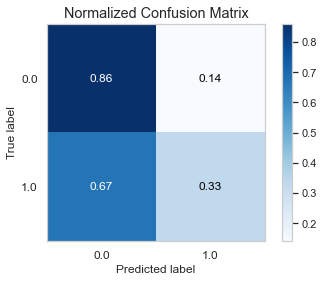

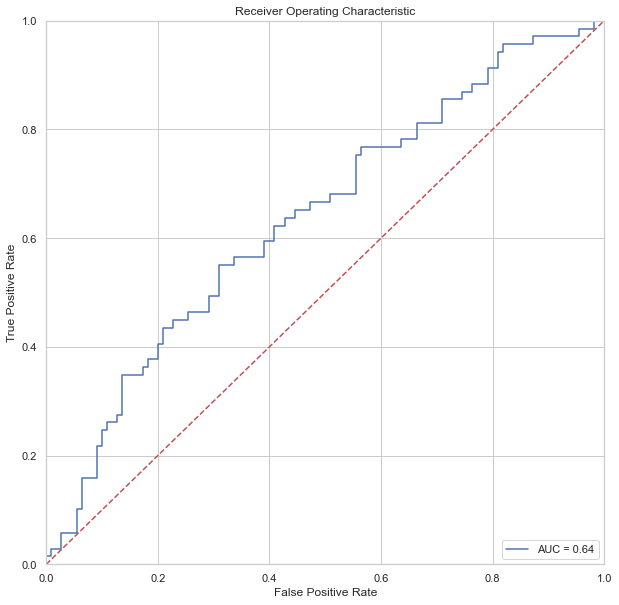

In [173]:
model_evaluation("Logistic Regression", lregr_pred, pipeline_lregr)

In [174]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = l_regr.coef_[0]
new = pd.DataFrame(importance).T

In [175]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=False)

In [176]:
importance2

0
comorbidities (0 No, 1 Yes)            0.570677
ASA status                             0.409422
sex (0 male, 1 female)                 0.409414
Epilepsy                               0.393164
HTN (0 No, 1 Yes)                      0.311188
diabetes (0 No, 1 Yes, 2 IFG)          0.259903
Neural deficit                         0.251376
cerebrovascular disease (0 No, 1 Yes)  0.243849
Reflux                                 0.183048
bmi_cat_normal_weight                  0.175216
# comorbidities                        0.164548
Coagulation issues                     0.075866
Gastro issues                          0.014016
bmi_cat_underweight                    0.000000
age                                   -0.043998
bmi_cat_obesity                       -0.063040
Kidney issues                         -0.077025
Arythmmia                             -0.084153
Chron heart fail                      -0.092821
Liver issues                          -0.093304
bmi_cat_overweight                    -0.111999
renal insufficiency (0 No, 1 Yes)     -0.126404
weight (kg)                           -0.127020
Per vascular dis                      -0.156155
height (m)                            -0.158059
Ischemic heart dis                    -0.306948
bmi                                   -0.411295
Tumour                                -0.467787
Dim phys cap                          -0.598380

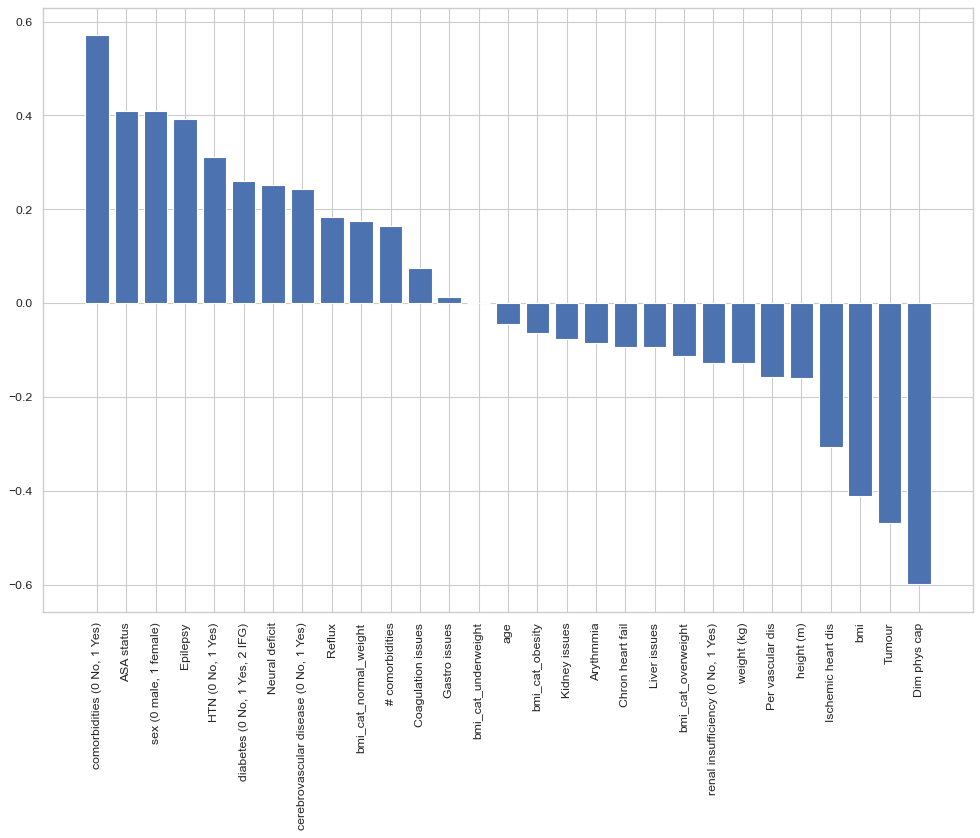

In [177]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

## KNN

In [178]:
knn = KNeighborsClassifier(n_neighbors=5)
pipeline_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", knn)]
)
pipeline_knn.fit(X_train, y_train)

knn_predictions = pipeline_knn.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.65      0.85      0.74       110
         1.0       0.53      0.28      0.36        69

    accuracy                           0.63       179
   macro avg       0.59      0.56      0.55       179
weighted avg       0.60      0.63      0.59       179

----------------------------------------------------------
[[93 17]
 [50 19]]
----------------------------------------------------------
AUC: 60.34%
----------------------------------------------------------


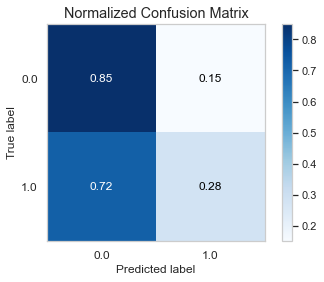

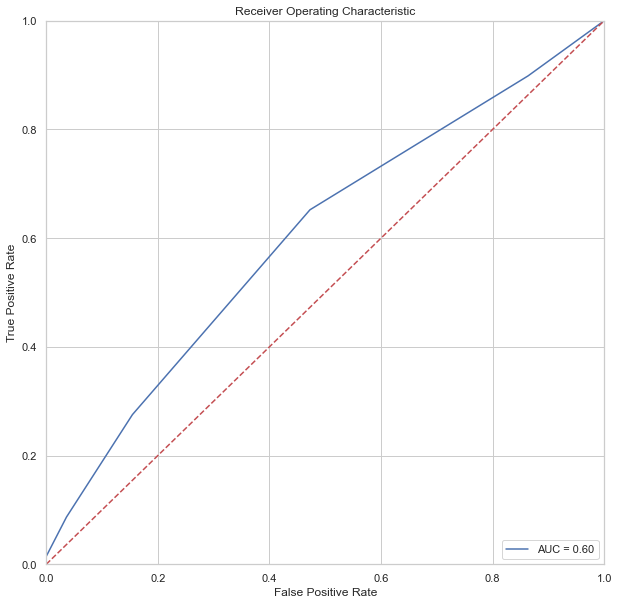

In [179]:
model_evaluation("KNN", knn_predictions, pipeline_knn)

## NB

In [180]:
nb = BernoulliNB()
pipeline_nb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", nb)]
)
pipeline_nb.fit(X_train, y_train)

nb_predictions = pipeline_nb.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.64      0.85      0.73       110
         1.0       0.50      0.23      0.32        69

    accuracy                           0.61       179
   macro avg       0.57      0.54      0.52       179
weighted avg       0.59      0.61      0.57       179

----------------------------------------------------------
[[94 16]
 [53 16]]
----------------------------------------------------------
AUC: 62.76%
----------------------------------------------------------


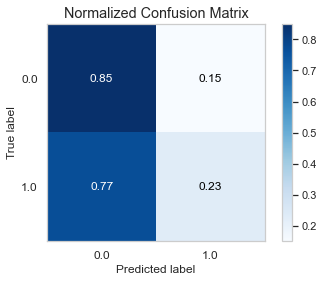

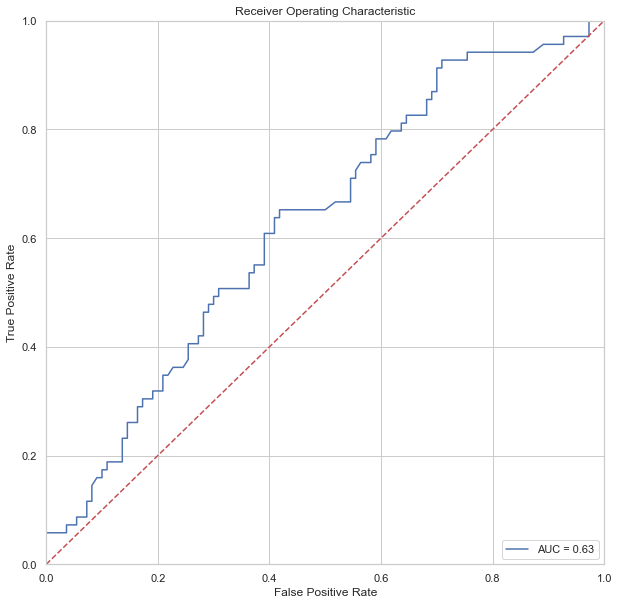

In [181]:
model_evaluation("Naive Bayes", nb_predictions, pipeline_nb)

In [182]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = nb.coef_[0]
new = pd.DataFrame(importance).T

In [183]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=True)

In [184]:
importance2

0
bmi_cat_underweight                   -5.568345
Epilepsy                              -3.958907
Tumour                                -3.488903
Liver issues                          -3.265759
Per vascular dis                      -2.677973
Reflux                                -2.572612
cerebrovascular disease (0 No, 1 Yes) -2.523822
bmi_cat_normal_weight                 -2.523822
renal insufficiency (0 No, 1 Yes)     -2.390291
Neural deficit                        -2.349469
Chron heart fail                      -2.236140
Kidney issues                         -2.071837
bmi                                   -1.984826
Arythmmia                             -1.636519
Dim phys cap                          -1.525293
diabetes (0 No, 1 Yes, 2 IFG)         -1.425210
Coagulation issues                    -1.319849
height (m)                            -0.953224
age                                   -0.914384
bmi_cat_overweight                    -0.797660
weight (kg)                           -0.764323
bmi_cat_obesity                       -0.748063
Gastro issues                         -0.641091
sex (0 male, 1 female)                -0.512099
Ischemic heart dis                    -0.358858
HTN (0 No, 1 Yes)                     -0.188447
ASA status                            -0.003824
# comorbidities                       -0.003824
comorbidities (0 No, 1 Yes)           -0.003824

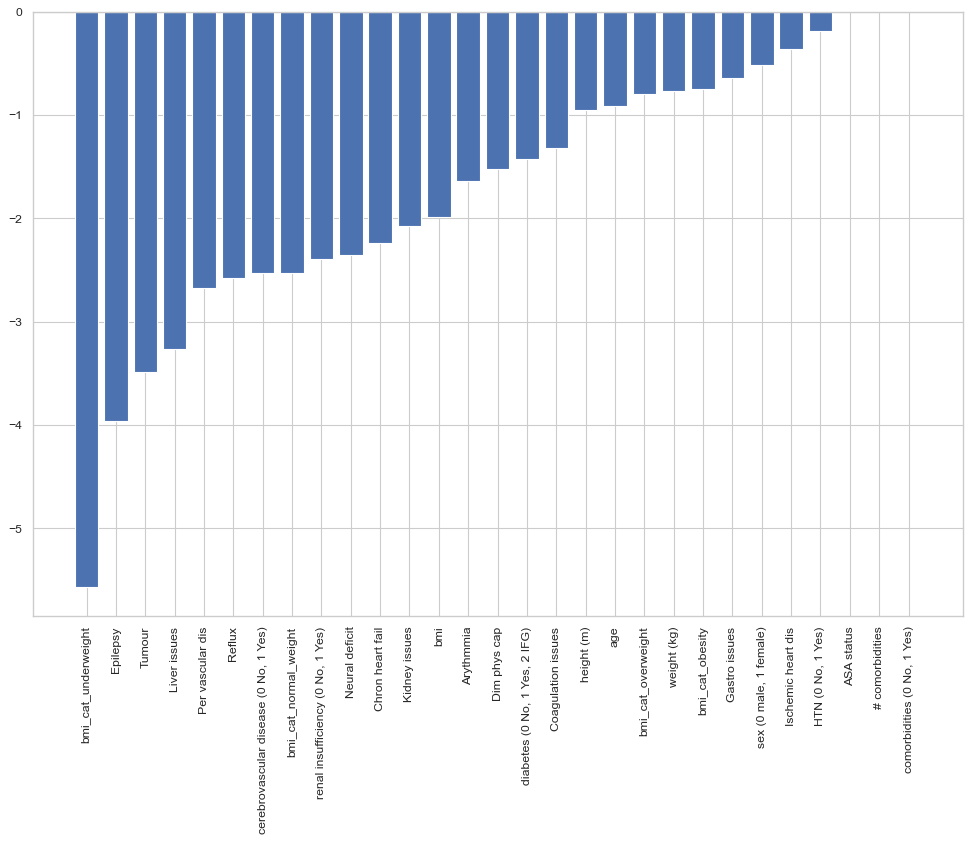

In [185]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

## SVM

### Linear SVM

In [186]:
svm = LinearSVC()
pipeline_svm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svm)]
)
pipeline_svm.fit(X_train, y_train)

svm_predictions = pipeline_svm.predict(X_test)

In [187]:
# model_evaluation("Linear SVM", svm_predictions, pipeline_svm)

In [188]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = svm.coef_[0]
new = pd.DataFrame(importance).T

In [189]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=False)

In [190]:
importance2

0
comorbidities (0 No, 1 Yes)            0.430126
Epilepsy                               0.301716
sex (0 male, 1 female)                 0.180383
ASA status                             0.161696
Neural deficit                         0.114177
diabetes (0 No, 1 Yes, 2 IFG)          0.113122
HTN (0 No, 1 Yes)                      0.111894
cerebrovascular disease (0 No, 1 Yes)  0.107562
# comorbidities                        0.069318
Reflux                                 0.068170
Coagulation issues                     0.032307
Gastro issues                          0.008906
bmi_cat_underweight                    0.000000
age                                   -0.015204
Arythmmia                             -0.041206
Kidney issues                         -0.048335
Liver issues                          -0.049948
Chron heart fail                      -0.053417
height (m)                            -0.055490
weight (kg)                           -0.059687
renal insufficiency (0 No, 1 Yes)     -0.064851
Per vascular dis                      -0.078640
Ischemic heart dis                    -0.147295
bmi                                   -0.192696
bmi_cat_normal_weight                 -0.232785
Tumour                                -0.250412
Dim phys cap                          -0.258483
bmi_cat_obesity                       -0.360124
bmi_cat_overweight                    -0.374536

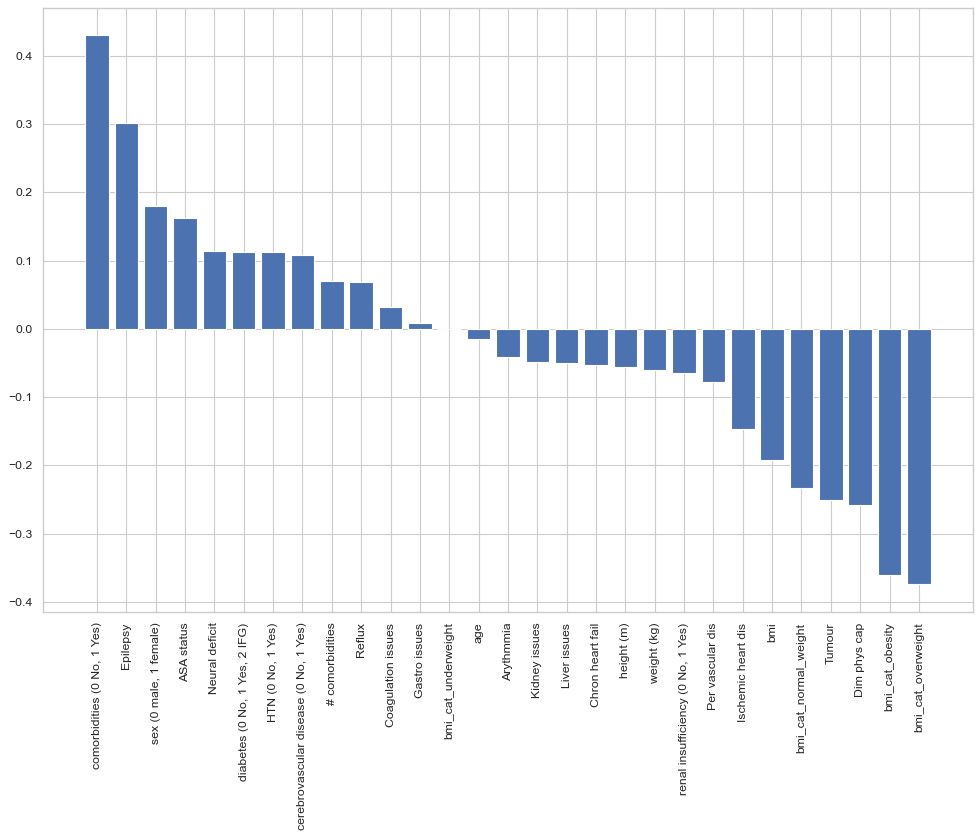

In [191]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

### SVM with Radial Basis Function

In [192]:
# Call model into variable
svm_rbf = SVC(kernel="rbf", gamma="scale", probability=True)
pipeline_svm_rbf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svm_rbf)]
)
pipeline_svm_rbf.fit(X_train, y_train)

svm_rbf_predictions = pipeline_svm_rbf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       110
         1.0       1.00      0.01      0.03        69

    accuracy                           0.62       179
   macro avg       0.81      0.51      0.40       179
weighted avg       0.77      0.62      0.48       179

----------------------------------------------------------
[[110   0]
 [ 68   1]]
----------------------------------------------------------
AUC: 64.04%
----------------------------------------------------------


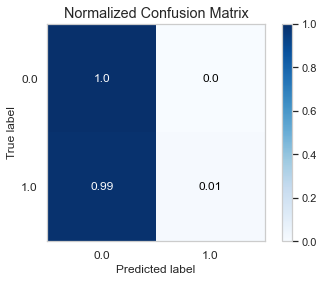

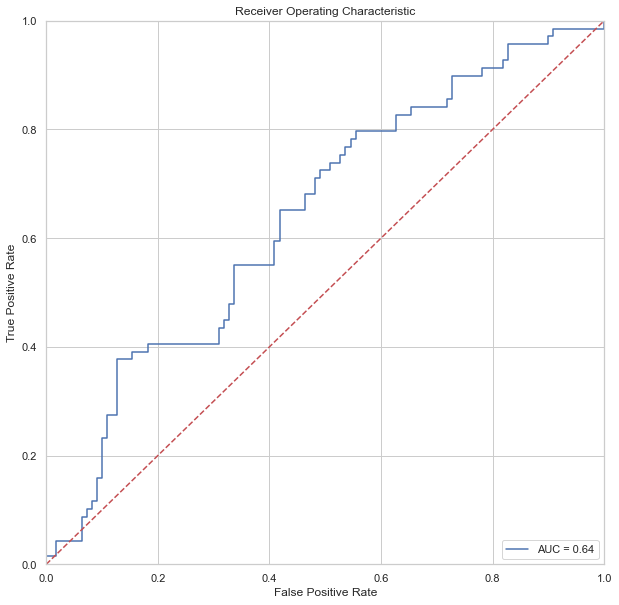

In [193]:
model_evaluation("SVM with Radia Basis Function", svm_rbf_predictions, pipeline_svm_rbf)

## Random Forest

In [194]:
rfc = RandomForestClassifier(random_state=19)

pipeline_rfc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rfc)]
)
pipeline_rfc.fit(X_train, y_train)

rfc_pred = pipeline_rfc.predict(X_test)

In [195]:
aa = pipeline_rfc.predict_proba(X_test)
ranges_acc(aa, 'rf', 5)

Accuracy for the model rf:

The accuracy when the model is predicting POD with a probability of 50.0% - 60.0% is: 
	 47.62%
The accuracy when the model is predicting POD with a probability of 60.0% - 70.0% is: 
	 76.92%
The accuracy when the model is predicting POD with a probability of 70.0% - 80.0% is: 
	 100.0%
The accuracy when the model is predicting POD with a probability of 80.0% - 90.0% is: 
	 100.0%
The accuracy when the model is predicting POD with a probability of 90.0% - 100.0% is: 
	 nan%


              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77       110
         1.0       0.64      0.36      0.46        69

    accuracy                           0.68       179
   macro avg       0.66      0.62      0.62       179
weighted avg       0.67      0.68      0.65       179

----------------------------------------------------------
[[96 14]
 [44 25]]
----------------------------------------------------------
AUC: 70.94%
----------------------------------------------------------


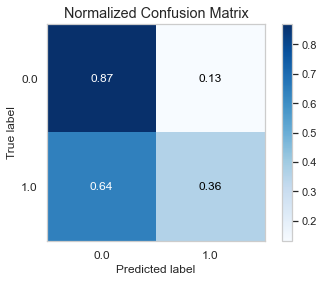

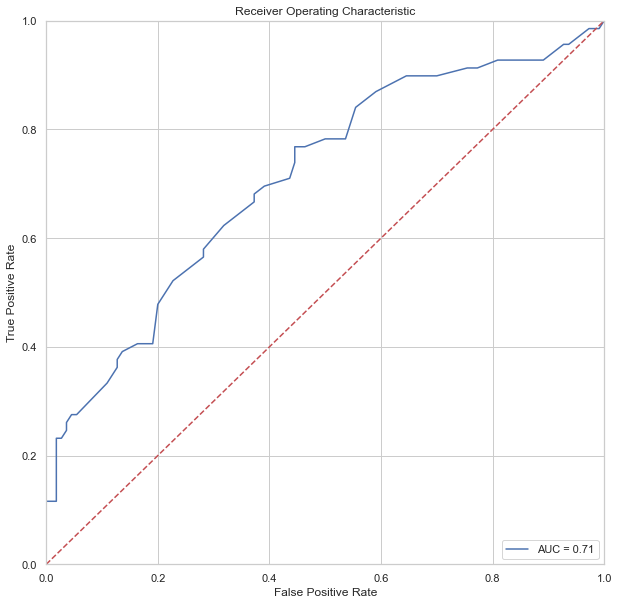

In [196]:
model_evaluation("Random Forest", rfc_pred, pipeline_rfc)

In [197]:
rfc_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(rfc.feature_importances_, 3)}
)
rfc_importances = rfc_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [198]:
rfc_imp = rfc_importances.sort_values('importance', ascending=False)
rfc_imp

importance
feature                                          
height (m)                                  0.156
sex (0 male, 1 female)                      0.152
age                                         0.136
weight (kg)                                 0.129
# comorbidities                             0.053
ASA status                                  0.040
Gastro issues                               0.031
Dim phys cap                                0.028
Coagulation issues                          0.025
Ischemic heart dis                          0.025
diabetes (0 No, 1 Yes, 2 IFG)               0.022
Arythmmia                                   0.020
HTN (0 No, 1 Yes)                           0.020
Chron heart fail                            0.017
Kidney issues                               0.017
bmi                                         0.015
bmi_cat_overweight                          0.014
renal insufficiency (0 No, 1 Yes)           0.014
Neural deficit                              0.014
cerebrovascular disease (0 No, 1 Yes)       0.013
bmi_cat_obesity                             0.013
Per vascular dis                            0.012
Reflux                                      0.011
Liver issues                                0.009
Tumour                                      0.006
bmi_cat_normal_weight                       0.005
Epilepsy                                    0.003
comorbidities (0 No, 1 Yes)                 0.001
bmi_cat_underweight                         0.000

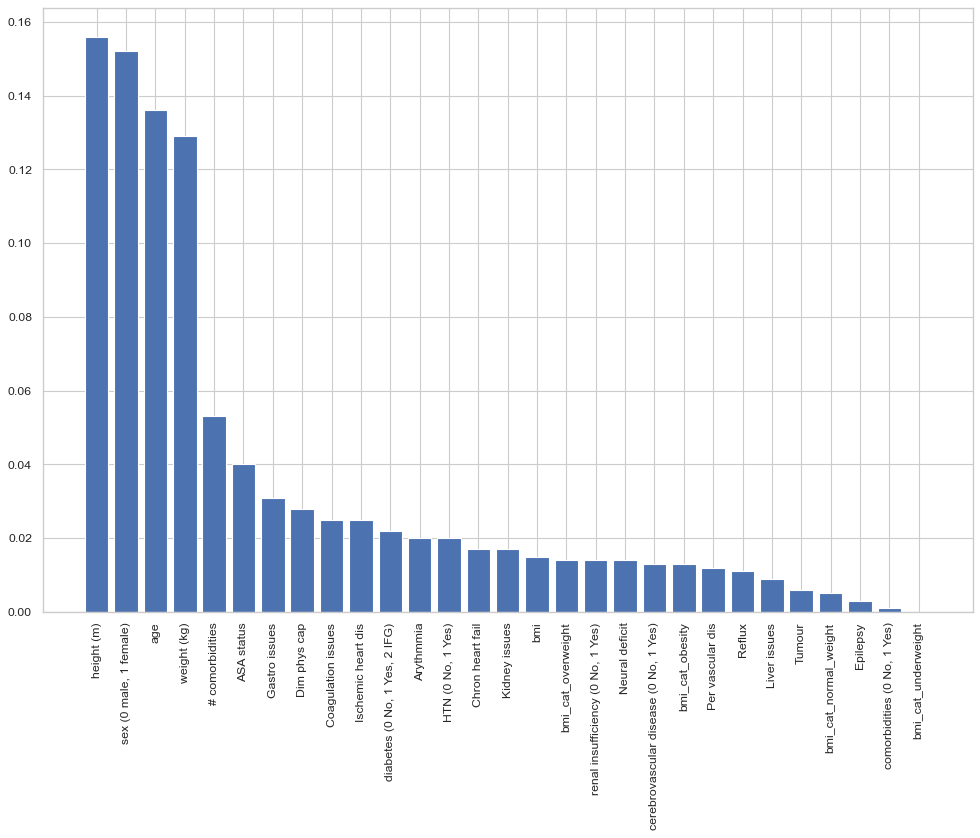

In [199]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(rfc_imp.index, height=rfc_imp['importance'])
plt.show()

## AdaBoost

In [200]:
ada = AdaBoostClassifier()
pipeline_ada = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", ada)]
)
pipeline_ada.fit(X_train, y_train)

ada_pred = pipeline_ada.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.67      0.88      0.76       110
         1.0       0.63      0.32      0.42        69

    accuracy                           0.66       179
   macro avg       0.65      0.60      0.59       179
weighted avg       0.66      0.66      0.63       179

----------------------------------------------------------
[[97 13]
 [47 22]]
----------------------------------------------------------
AUC: 65.07%
----------------------------------------------------------


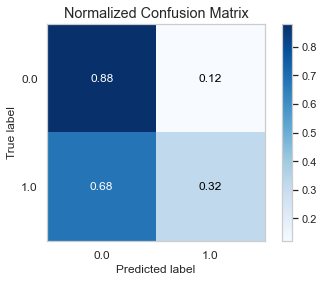

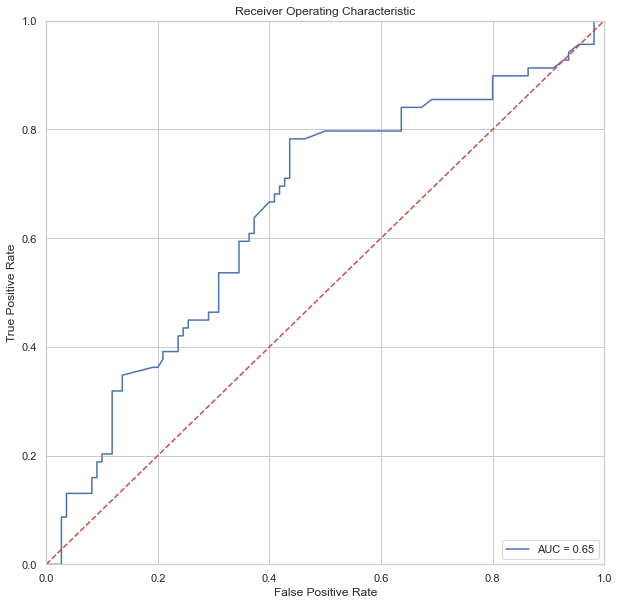

In [201]:
model_evaluation("AdaBoost", ada_pred, pipeline_ada)

In [202]:
ada_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(ada.feature_importances_, 3)}
)
ada_importances = ada_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [203]:
ada_imp = ada_importances.sort_values('importance', ascending=False)
ada_imp

importance
feature                                          
height (m)                                   0.32
age                                          0.16
weight (kg)                                  0.16
sex (0 male, 1 female)                       0.10
Reflux                                       0.02
# comorbidities                              0.02
bmi                                          0.02
ASA status                                   0.02
Epilepsy                                     0.02
Neural deficit                               0.02
Dim phys cap                                 0.02
Ischemic heart dis                           0.02
comorbidities (0 No, 1 Yes)                  0.02
HTN (0 No, 1 Yes)                            0.02
diabetes (0 No, 1 Yes, 2 IFG)                0.02
renal insufficiency (0 No, 1 Yes)            0.02
Tumour                                       0.02
Gastro issues                                0.00
Arythmmia                                    0.00
bmi_cat_normal_weight                        0.00
cerebrovascular disease (0 No, 1 Yes)        0.00
bmi_cat_underweight                          0.00
bmi_cat_obesity                              0.00
bmi_cat_overweight                           0.00
Chron heart fail                             0.00
Coagulation issues                           0.00
Kidney issues                                0.00
Liver issues                                 0.00
Per vascular dis                             0.00

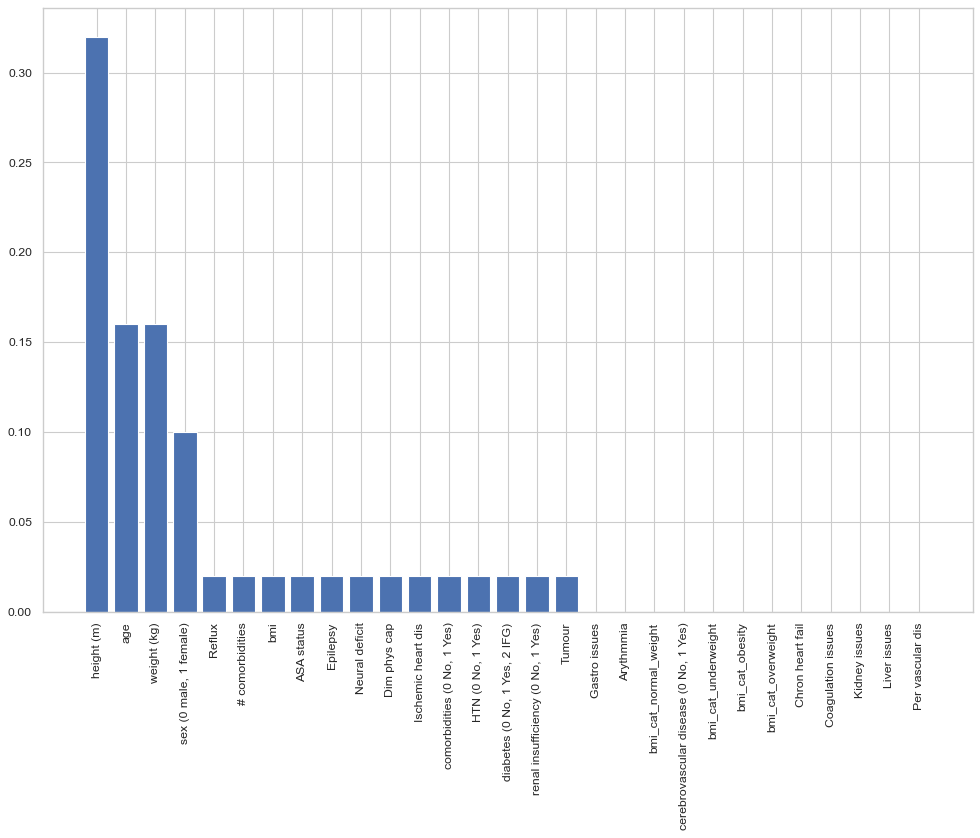

In [204]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(ada_imp.index, height=ada_imp['importance'])
plt.show()

## Catboost

In [ ]:
cat = CatBoostClassifier()
pipeline_cat = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", cat)]
)
pipeline_cat.fit(X_train, y_train)

cat_pred = pipeline_cat.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.68      0.90      0.77       110
         1.0       0.67      0.32      0.43        69

    accuracy                           0.68       179
   macro avg       0.67      0.61      0.60       179
weighted avg       0.67      0.68      0.64       179

----------------------------------------------------------
[[99 11]
 [47 22]]
----------------------------------------------------------
AUC: 69.86%
----------------------------------------------------------


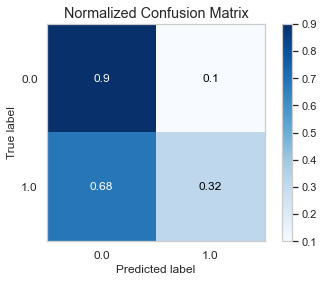

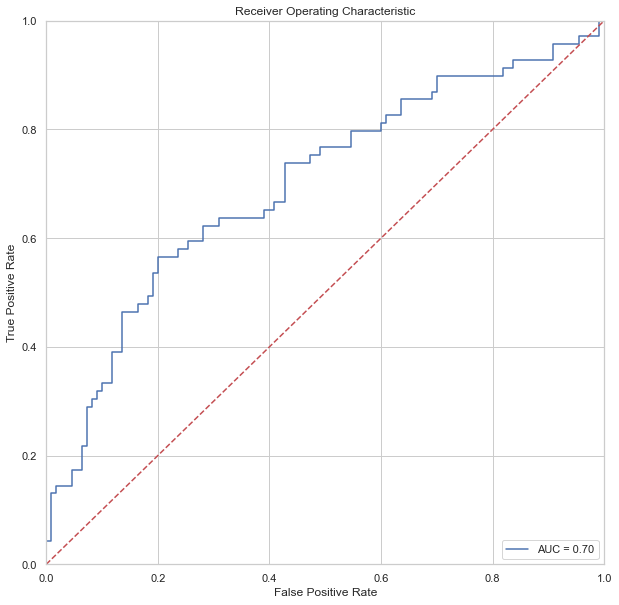

In [206]:
model_evaluation("CatBoost", cat_pred, pipeline_cat)

In [207]:
cat_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(cat.feature_importances_, 3)}
)
cat_importances = cat_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [208]:
cat_imp = cat_importances.sort_values('importance', ascending=False)
cat_imp

importance
feature                                          
sex (0 male, 1 female)                     18.832
height (m)                                 11.497
weight (kg)                                10.833
age                                        10.385
ASA status                                  6.029
# comorbidities                             5.969
Gastro issues                               4.556
Dim phys cap                                4.124
Coagulation issues                          3.637
Ischemic heart dis                          3.633
diabetes (0 No, 1 Yes, 2 IFG)               3.247
HTN (0 No, 1 Yes)                           2.950
Chron heart fail                            1.867
bmi                                         1.851
Neural deficit                              1.628
Arythmmia                                   1.389
Kidney issues                               1.264
cerebrovascular disease (0 No, 1 Yes)       1.244
Reflux                                      0.847
bmi_cat_overweight                          0.803
renal insufficiency (0 No, 1 Yes)           0.789
Per vascular dis                            0.776
bmi_cat_obesity                             0.659
Liver issues                                0.616
bmi_cat_normal_weight                       0.222
Tumour                                      0.195
Epilepsy                                    0.122
comorbidities (0 No, 1 Yes)                 0.035
bmi_cat_underweight                         0.000

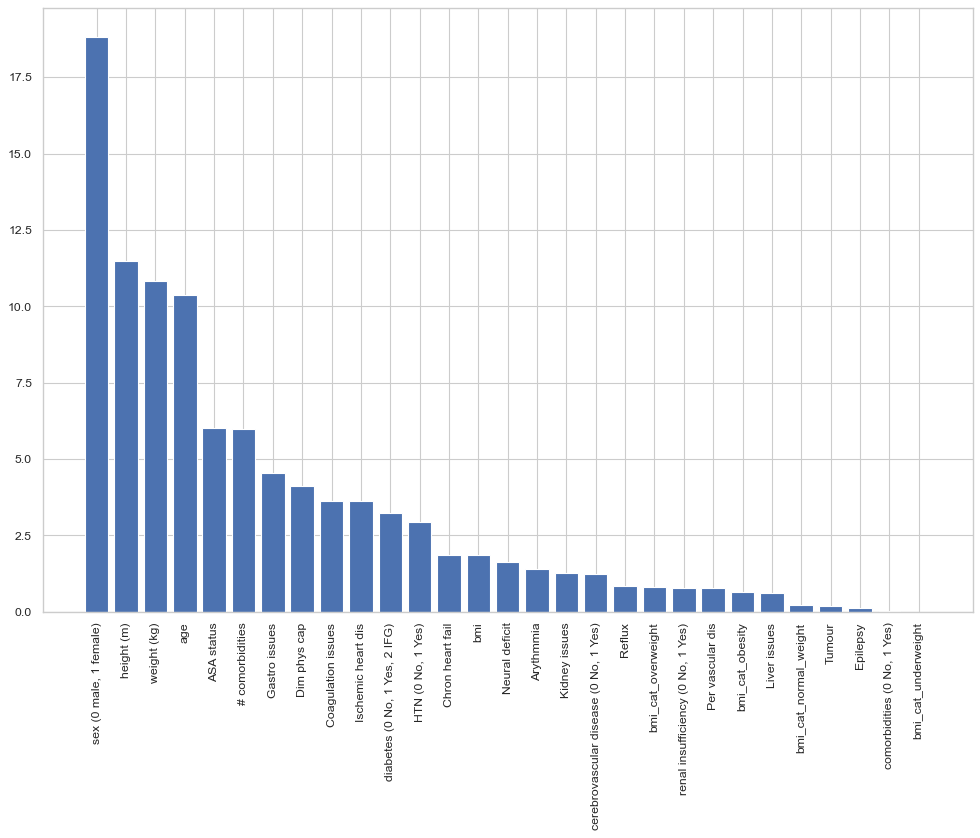

In [209]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(cat_imp.index, height=cat_imp['importance'])
plt.show()

## XGBoost

In [210]:
xgb = XGBClassifier()
pipeline_xgb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb)]
)
pipeline_xgb.fit(X_train, y_train)

xgb_pred = pipeline_xgb.predict(X_test)

[15:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

         0.0       0.71      0.83      0.76       110
         1.0       0.62      0.45      0.52        69

    accuracy                           0.68       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.67      0.68      0.67       179

----------------------------------------------------------
[[91 19]
 [38 31]]
----------------------------------------------------------
AUC: 68.87%
----------------------------------------------------------


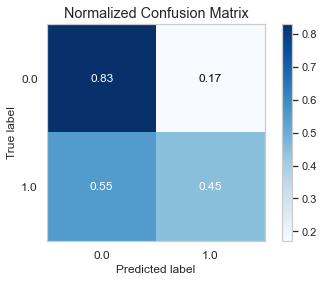

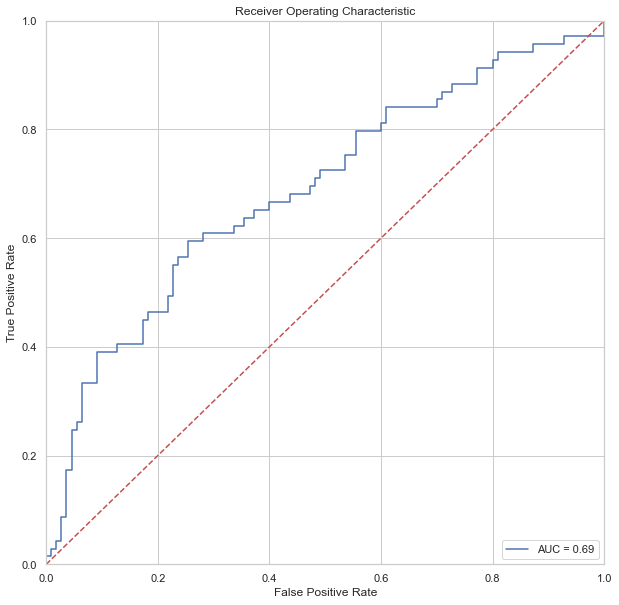

In [211]:
model_evaluation("XGBoost", xgb_pred, pipeline_xgb)

In [212]:
xgb_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(xgb.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [213]:
xgb_imp = xgb_importances.sort_values('importance', ascending=False)
xgb_imp

importance
feature                                          
Coagulation issues                          0.069
HTN (0 No, 1 Yes)                           0.063
diabetes (0 No, 1 Yes, 2 IFG)               0.054
Dim phys cap                                0.052
ASA status                                  0.050
sex (0 male, 1 female)                      0.049
Reflux                                      0.044
Liver issues                                0.044
renal insufficiency (0 No, 1 Yes)           0.044
Kidney issues                               0.042
Ischemic heart dis                          0.042
height (m)                                  0.041
bmi                                         0.041
Chron heart fail                            0.041
weight (kg)                                 0.040
Arythmmia                                   0.039
# comorbidities                             0.039
Neural deficit                              0.039
Gastro issues                               0.037
age                                         0.036
cerebrovascular disease (0 No, 1 Yes)       0.029
bmi_cat_overweight                          0.028
Per vascular dis                            0.023
Tumour                                      0.014
Epilepsy                                    0.000
bmi_cat_underweight                         0.000
bmi_cat_normal_weight                       0.000
bmi_cat_obesity                             0.000
comorbidities (0 No, 1 Yes)                 0.000

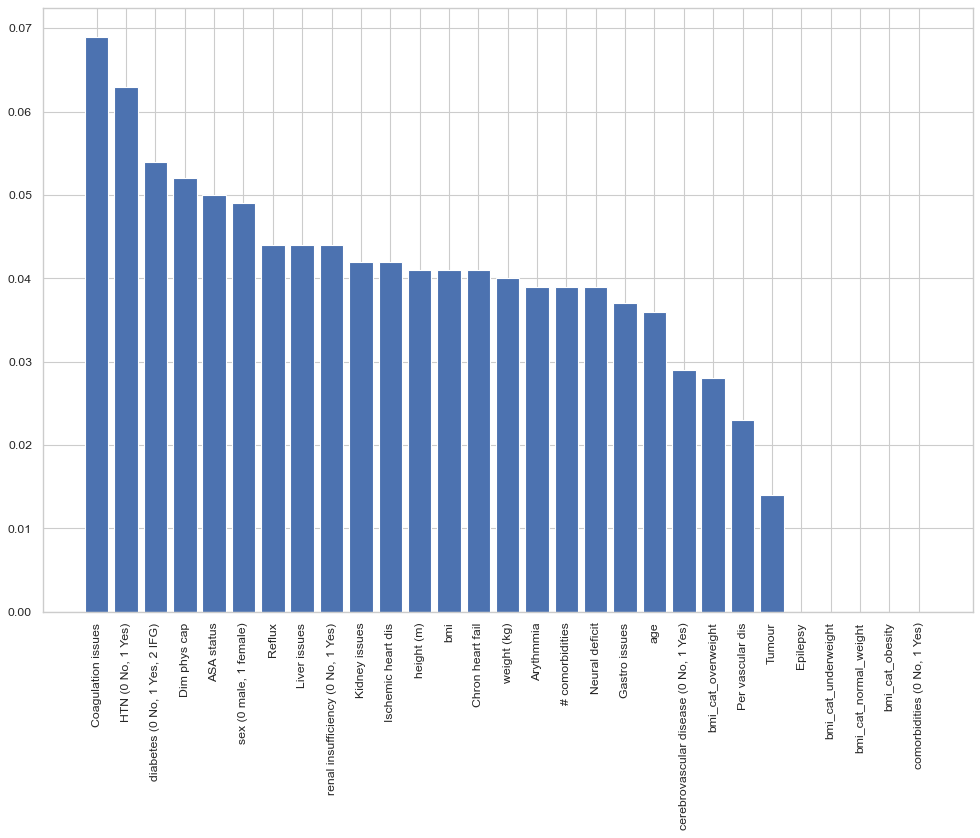

In [214]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(xgb_imp.index, height=xgb_imp['importance'])
plt.show()

## LightGBM

In [215]:
lgbm = LGBMClassifier()
pipeline_lgbm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", lgbm)]
)
pipeline_lgbm.fit(X_train, y_train)

lgbm_pred = pipeline_lgbm.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.74       110
         1.0       0.58      0.42      0.49        69

    accuracy                           0.66       179
   macro avg       0.63      0.61      0.62       179
weighted avg       0.65      0.66      0.65       179

----------------------------------------------------------
[[89 21]
 [40 29]]
----------------------------------------------------------
AUC: 66.03%
----------------------------------------------------------


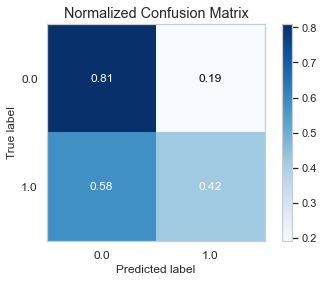

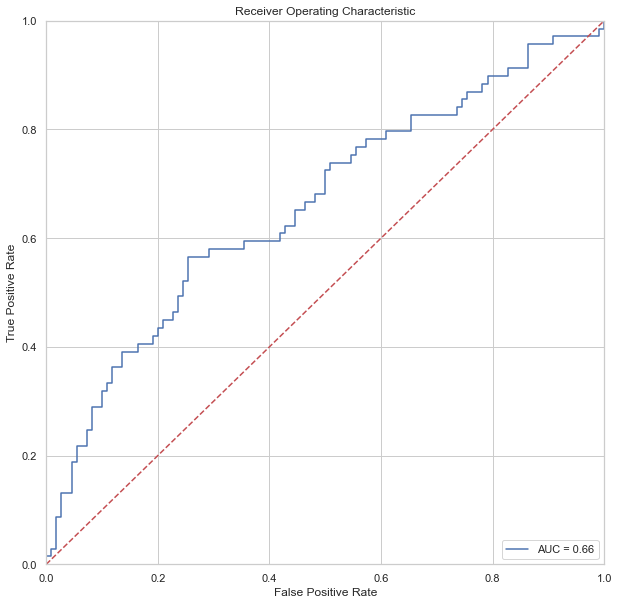

In [216]:
model_evaluation("LightGBM", lgbm_pred, pipeline_lgbm)

In [217]:
lgbm_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(lgbm.feature_importances_, 3)}
)
lgbm_importances = lgbm_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [218]:
lgbm_imp = lgbm_importances.sort_values('importance', ascending=False)
lgbm_imp

importance
feature                                          
height (m)                                    731
sex (0 male, 1 female)                        444
age                                           416
weight (kg)                                   388
Gastro issues                                 128
# comorbidities                               107
Ischemic heart dis                             73
Dim phys cap                                   63
Coagulation issues                             53
ASA status                                     46
HTN (0 No, 1 Yes)                              37
diabetes (0 No, 1 Yes, 2 IFG)                  33
Arythmmia                                      23
cerebrovascular disease (0 No, 1 Yes)          21
bmi                                            17
bmi_cat_overweight                             16
Neural deficit                                 16
Chron heart fail                               14
renal insufficiency (0 No, 1 Yes)              14
Kidney issues                                  13
Reflux                                         12
Per vascular dis                               10
bmi_cat_normal_weight                           5
Tumour                                          5
Liver issues                                    3
bmi_cat_obesity                                 1
Epilepsy                                        0
bmi_cat_underweight                             0
comorbidities (0 No, 1 Yes)                     0

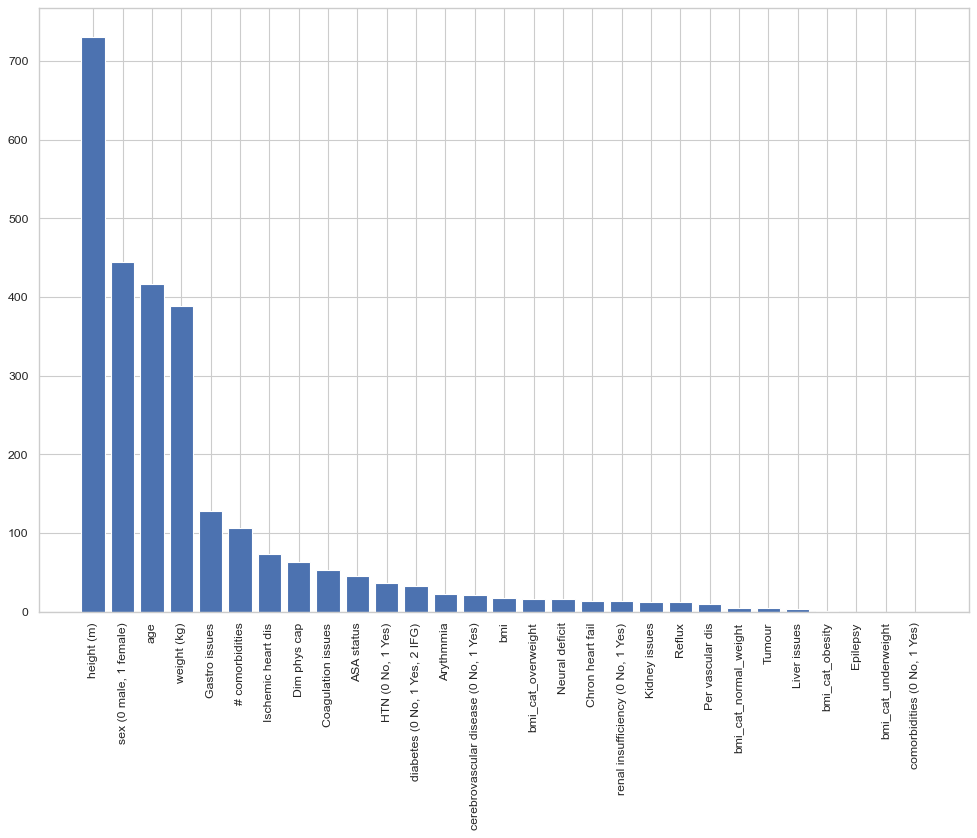

In [219]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(lgbm_imp.index, height=lgbm_imp['importance'])
plt.show()

# Model Summarize

In [220]:
model_auc_score

{'Logistic Regression': 0.6378129117259552,
 'KNN': 0.6033596837944664,
 'Naive Bayes': 0.6276021080368906,
 'SVM with Radia Basis Function': 0.6404479578392622,
 'Random Forest': 0.7093544137022397,
 'AdaBoost': 0.6506587615283268,
 'CatBoost': 0.6985507246376812,
 'XGBoost': 0.6886693017127801,
 'LightGBM': 0.6603425559947298}

In [221]:
model = []
score = []
for k, v in model_auc_score.items():
    model.append(k)
    score.append(v)

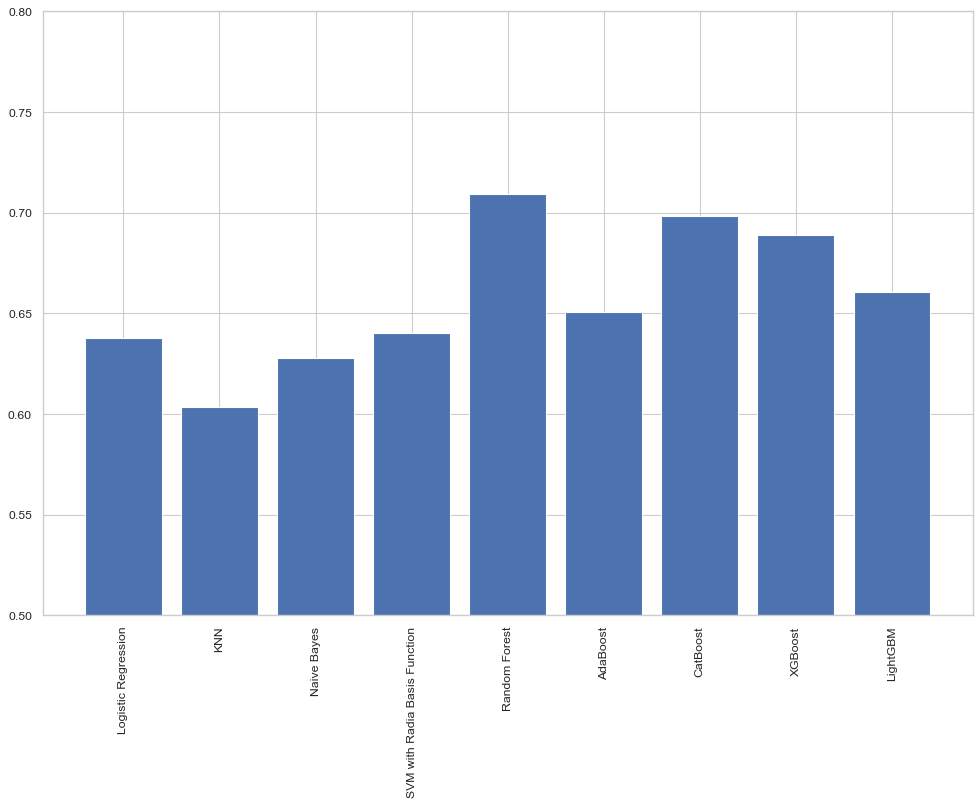

In [222]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(model, score)
plt.ylim(0.5, 0.8)
plt.show()

# Second cluster model testing

In [223]:
#Split the data for the first cluster

X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=19
)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 946 samples.
Testing set has 237 samples.


## Logistic Regression

In [224]:
l_regr = LogisticRegression(max_iter=1000)
pipeline_lregr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", l_regr)]
)

pipeline_lregr.fit(X_train, y_train)
lregr_pred = pipeline_lregr.predict(X_test)
lregr_pred_proba = pipeline_lregr.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.60      0.77      0.67       143
         1.0       0.39      0.22      0.28        94

    accuracy                           0.55       237
   macro avg       0.49      0.50      0.48       237
weighted avg       0.52      0.55      0.52       237

----------------------------------------------------------
[[110  33]
 [ 73  21]]
----------------------------------------------------------
AUC: 54.35%
----------------------------------------------------------


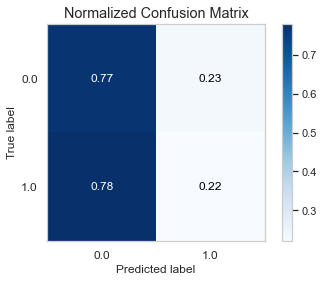

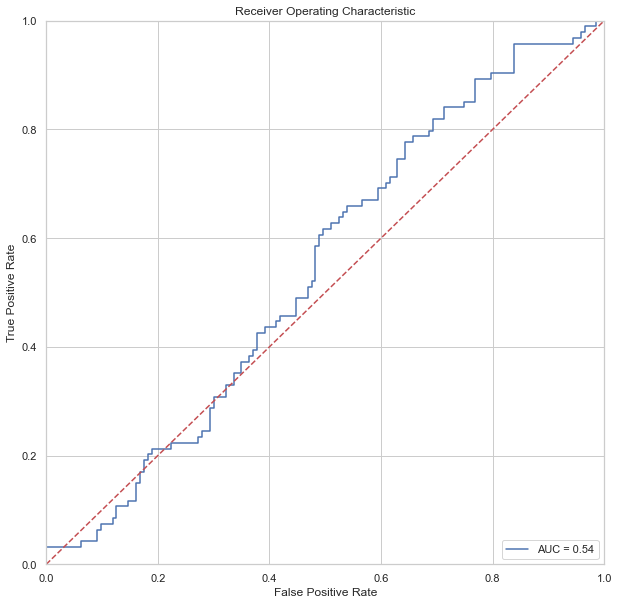

In [225]:
model_evaluation("Logistic Regression", lregr_pred, pipeline_lregr)

In [226]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = l_regr.coef_[0]
new = pd.DataFrame(importance).T

In [227]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=False)

In [228]:
importance2

0
cerebrovascular disease (0 No, 1 Yes)  0.753431
Neural deficit                         0.589083
bmi_cat_underweight                    0.496747
Arythmmia                              0.434982
Kidney issues                          0.418721
Coagulation issues                     0.387044
Tumour                                 0.320117
height (m)                             0.203352
sex (0 male, 1 female)                 0.165195
Reflux                                 0.164774
Chron heart fail                       0.144225
HTN (0 No, 1 Yes)                      0.085247
ASA status                             0.058541
Ischemic heart dis                     0.044894
weight (kg)                            0.031739
bmi_cat_normal_weight                  0.023104
diabetes (0 No, 1 Yes, 2 IFG)          0.018971
# comorbidities                        0.003090
bmi                                   -0.017929
age                                   -0.059268
Per vascular dis                      -0.100383
Gastro issues                         -0.115241
bmi_cat_overweight                    -0.197053
Dim phys cap                          -0.226329
bmi_cat_obesity                       -0.332597
Epilepsy                              -0.362839
comorbidities (0 No, 1 Yes)           -0.381815
renal insufficiency (0 No, 1 Yes)     -0.567047
Liver issues                          -0.569972

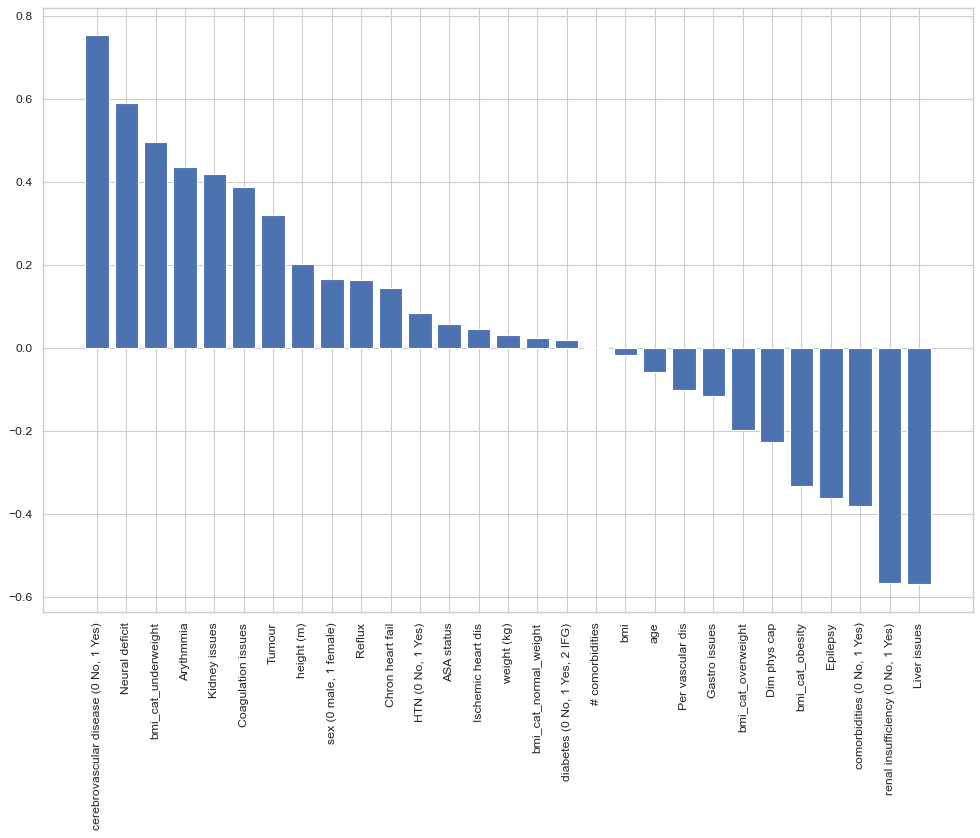

In [229]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

## KNN

In [230]:
knn = KNeighborsClassifier(n_neighbors=5)
pipeline_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", knn)]
)
pipeline_knn.fit(X_train, y_train)

knn_predictions = pipeline_knn.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63       143
         1.0       0.43      0.41      0.42        94

    accuracy                           0.55       237
   macro avg       0.53      0.53      0.53       237
weighted avg       0.55      0.55      0.55       237

----------------------------------------------------------
[[91 52]
 [55 39]]
----------------------------------------------------------
AUC: 52.19%
----------------------------------------------------------


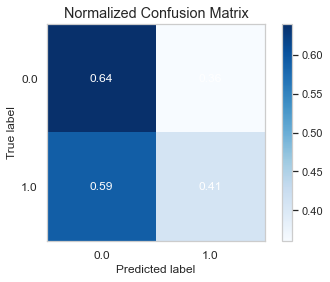

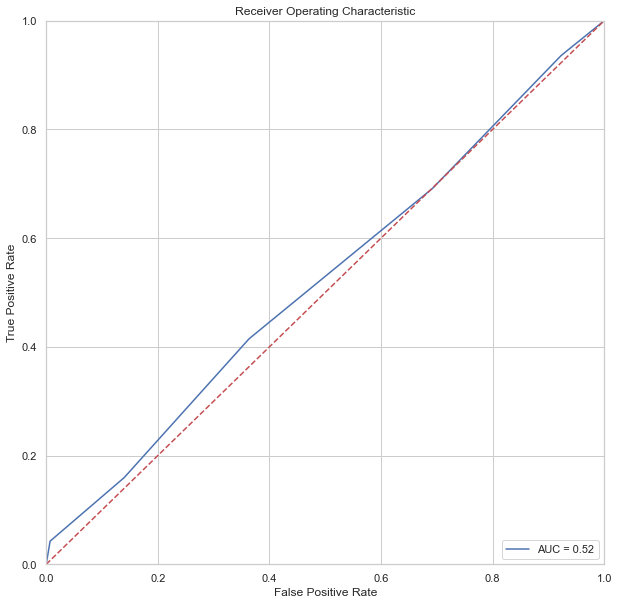

In [231]:
model_evaluation("KNN", knn_predictions, pipeline_knn)

## NB

In [232]:
nb = BernoulliNB()
pipeline_nb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", nb)]
)
pipeline_nb.fit(X_train, y_train)

nb_predictions = pipeline_nb.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.63      0.76      0.69       143
         1.0       0.47      0.33      0.39        94

    accuracy                           0.59       237
   macro avg       0.55      0.54      0.54       237
weighted avg       0.57      0.59      0.57       237

----------------------------------------------------------
[[108  35]
 [ 63  31]]
----------------------------------------------------------
AUC: 59.95%
----------------------------------------------------------


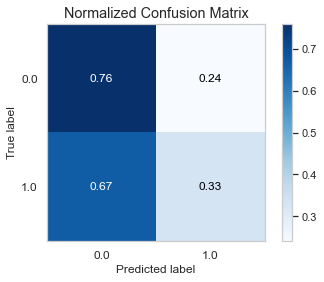

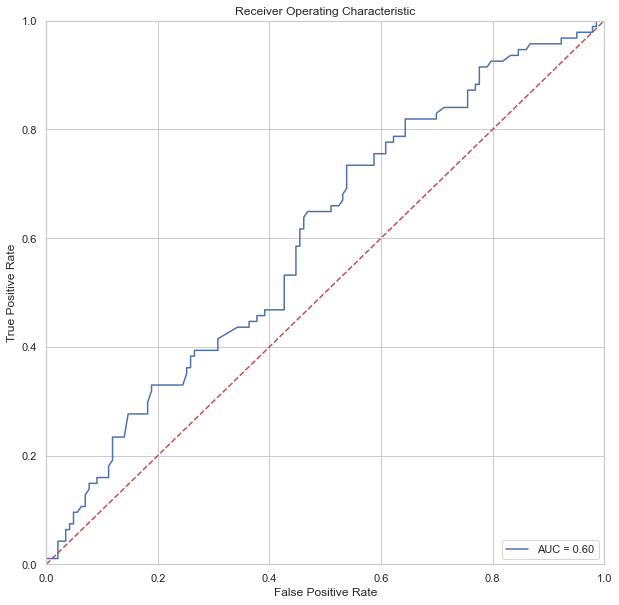

In [233]:
model_evaluation("Naive Bayes", nb_predictions, pipeline_nb)

In [234]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = nb.coef_[0]
new = pd.DataFrame(importance).T

In [235]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=True)

In [236]:
importance2

0
Epilepsy                              -5.315666
Tumour                                -4.399375
Liver issues                          -4.217054
Per vascular dis                      -3.929372
cerebrovascular disease (0 No, 1 Yes) -3.706228
bmi_cat_underweight                   -3.706228
Neural deficit                        -3.236224
Reflux                                -3.175600
diabetes (0 No, 1 Yes, 2 IFG)         -3.175600
Chron heart fail                      -2.964291
renal insufficiency (0 No, 1 Yes)     -2.750717
Arythmmia                             -2.543077
Kidney issues                         -2.425294
bmi_cat_obesity                       -2.295241
Dim phys cap                          -2.076988
Coagulation issues                    -2.038521
Ischemic heart dis                    -1.383840
HTN (0 No, 1 Yes)                     -1.045969
bmi                                   -1.025207
bmi_cat_overweight                    -0.952567
Gastro issues                         -0.927409
height (m)                            -0.815856
age                                   -0.751318
bmi_cat_normal_weight                 -0.705508
sex (0 male, 1 female)                -0.647521
weight (kg)                           -0.638175
# comorbidities                       -0.414102
comorbidities (0 No, 1 Yes)           -0.414102
ASA status                            -0.060778

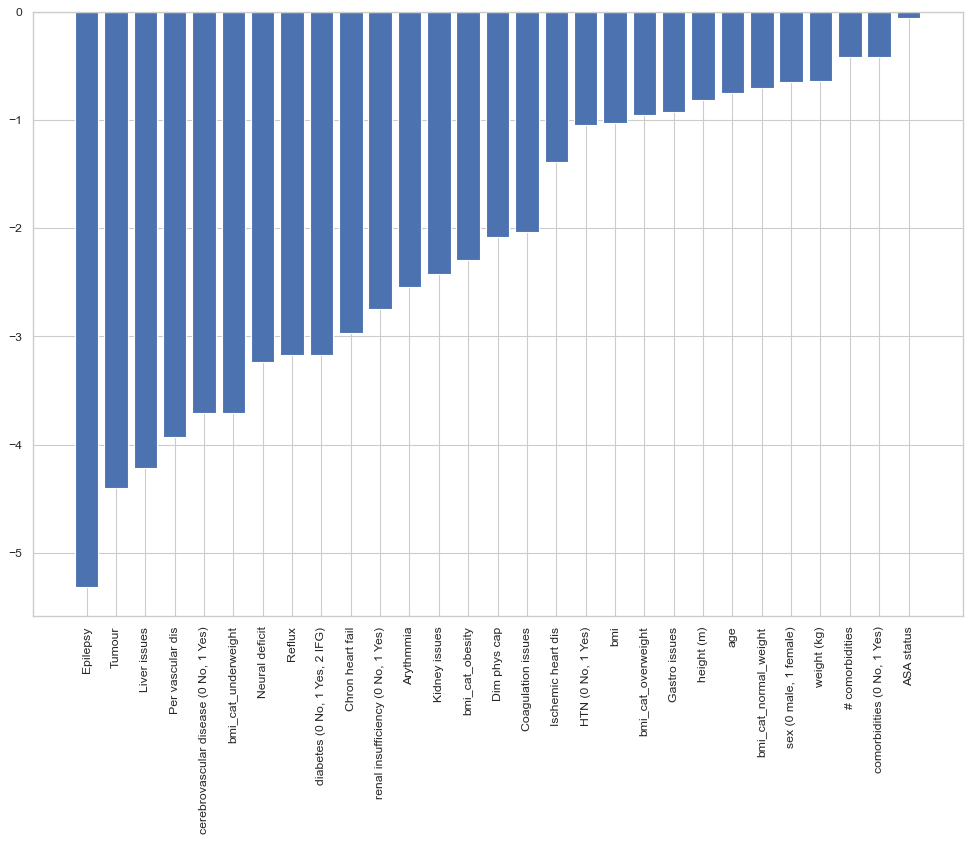

In [237]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

## SVM

### Linear SVM

In [238]:
svm = LinearSVC()
pipeline_svm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svm)]
)
pipeline_svm.fit(X_train, y_train)

svm_predictions = pipeline_svm.predict(X_test)

In [239]:
# model_evaluation("Linear SVM", svm_predictions, pipeline_svm)

In [240]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = svm.coef_[0]
new = pd.DataFrame(importance).T

In [241]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=False)

In [242]:
importance2

0
cerebrovascular disease (0 No, 1 Yes)  0.545591
Neural deficit                         0.425481
Tumour                                 0.343979
Arythmmia                              0.342195
Kidney issues                          0.314633
bmi_cat_underweight                    0.312479
Coagulation issues                     0.303646
Reflux                                 0.209637
Chron heart fail                       0.189311
height (m)                             0.164734
HTN (0 No, 1 Yes)                      0.152764
Ischemic heart dis                     0.134643
diabetes (0 No, 1 Yes, 2 IFG)          0.123198
sex (0 male, 1 female)                 0.079200
Per vascular dis                       0.065061
weight (kg)                            0.047869
ASA status                             0.029555
Dim phys cap                           0.022651
bmi_cat_normal_weight                 -0.001351
bmi                                   -0.004172
Gastro issues                         -0.053281
age                                   -0.082898
# comorbidities                       -0.110250
bmi_cat_overweight                    -0.129988
Epilepsy                              -0.172732
comorbidities (0 No, 1 Yes)           -0.192271
Liver issues                          -0.216562
bmi_cat_obesity                       -0.237116
renal insufficiency (0 No, 1 Yes)     -0.269096

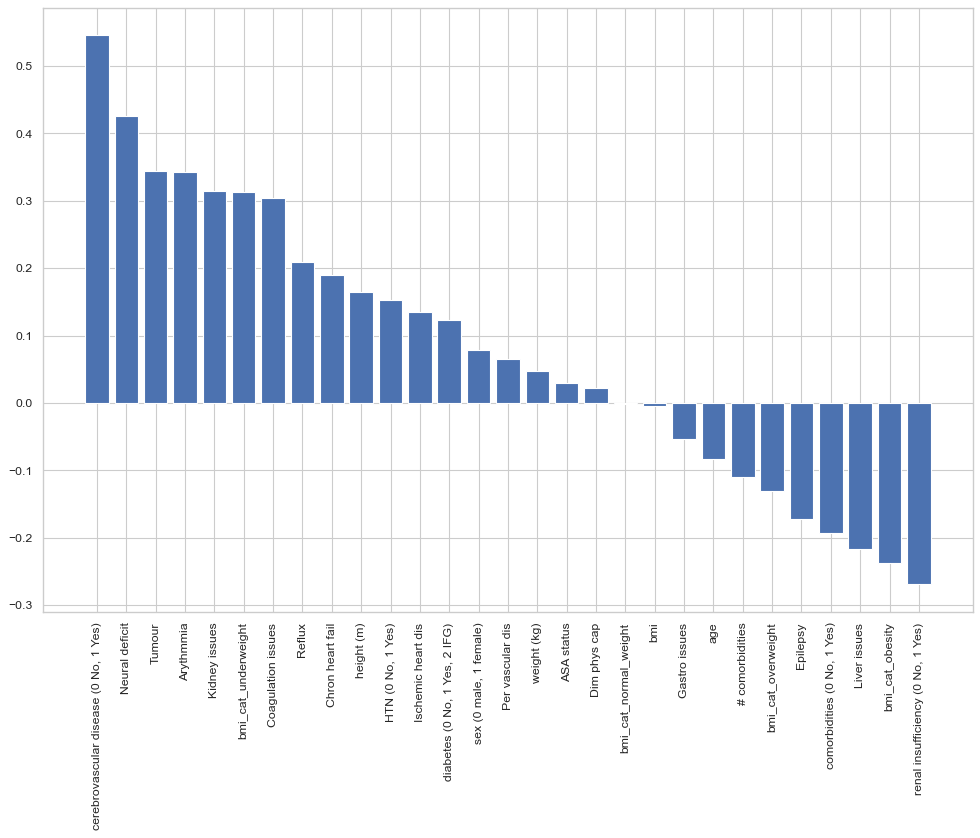

In [243]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

### SVM with Radial Basis Function

In [244]:
# Call model into variable
svm_rbf = SVC(kernel="rbf", gamma="scale", probability=True)
pipeline_svm_rbf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svm_rbf)]
)
pipeline_svm_rbf.fit(X_train, y_train)

svm_rbf_predictions = pipeline_svm_rbf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.63      0.95      0.76       143
         1.0       0.68      0.16      0.26        94

    accuracy                           0.64       237
   macro avg       0.66      0.56      0.51       237
weighted avg       0.65      0.64      0.56       237

----------------------------------------------------------
[[136   7]
 [ 79  15]]
----------------------------------------------------------
AUC: 59.88%
----------------------------------------------------------


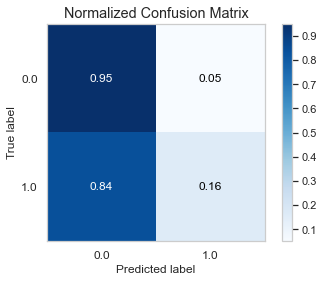

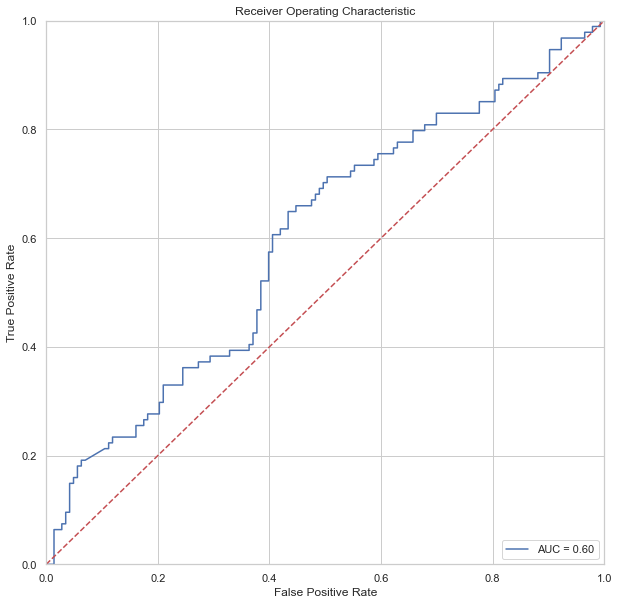

In [245]:
model_evaluation("SVM with Radia Basis Function", svm_rbf_predictions, pipeline_svm_rbf)

## Random Forest

In [246]:
rfc = RandomForestClassifier(random_state=19)

pipeline_rfc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rfc)]
)
pipeline_rfc.fit(X_train, y_train)

rfc_pred = pipeline_rfc.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67       143
         1.0       0.49      0.45      0.47        94

    accuracy                           0.59       237
   macro avg       0.57      0.57      0.57       237
weighted avg       0.59      0.59      0.59       237

----------------------------------------------------------
[[99 44]
 [52 42]]
----------------------------------------------------------
AUC: 62.39%
----------------------------------------------------------


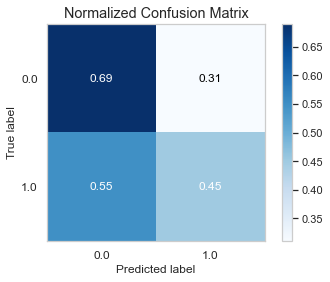

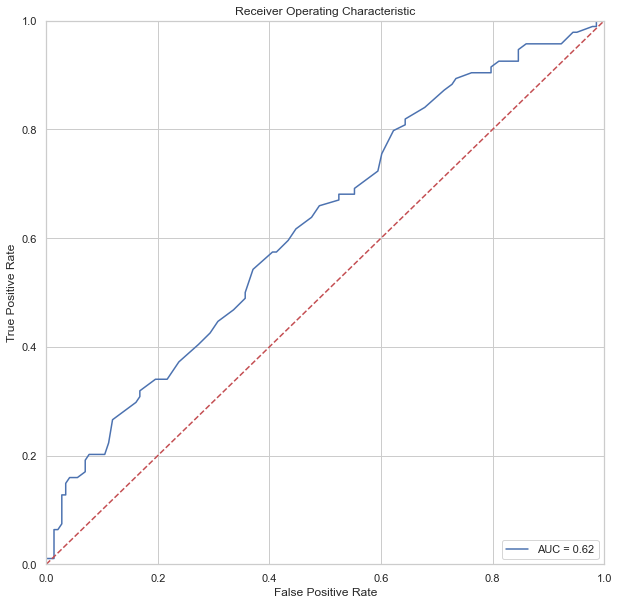

In [247]:
model_evaluation("Random Forest", rfc_pred, pipeline_rfc)

In [248]:
rfc_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(rfc.feature_importances_, 3)}
)
rfc_importances = rfc_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [249]:
rfc_imp = rfc_importances.sort_values('importance', ascending=False)
rfc_imp

importance
feature                                          
height (m)                                  0.180
sex (0 male, 1 female)                      0.153
weight (kg)                                 0.150
age                                         0.141
ASA status                                  0.061
# comorbidities                             0.040
Gastro issues                               0.028
bmi                                         0.026
HTN (0 No, 1 Yes)                           0.024
Ischemic heart dis                          0.021
Dim phys cap                                0.017
Coagulation issues                          0.016
renal insufficiency (0 No, 1 Yes)           0.016
bmi_cat_overweight                          0.015
bmi_cat_normal_weight                       0.014
Arythmmia                                   0.013
Kidney issues                               0.013
comorbidities (0 No, 1 Yes)                 0.010
Reflux                                      0.010
Neural deficit                              0.009
Chron heart fail                            0.009
diabetes (0 No, 1 Yes, 2 IFG)               0.009
bmi_cat_obesity                             0.006
cerebrovascular disease (0 No, 1 Yes)       0.005
Per vascular dis                            0.005
Liver issues                                0.004
bmi_cat_underweight                         0.003
Epilepsy                                    0.002
Tumour                                      0.002

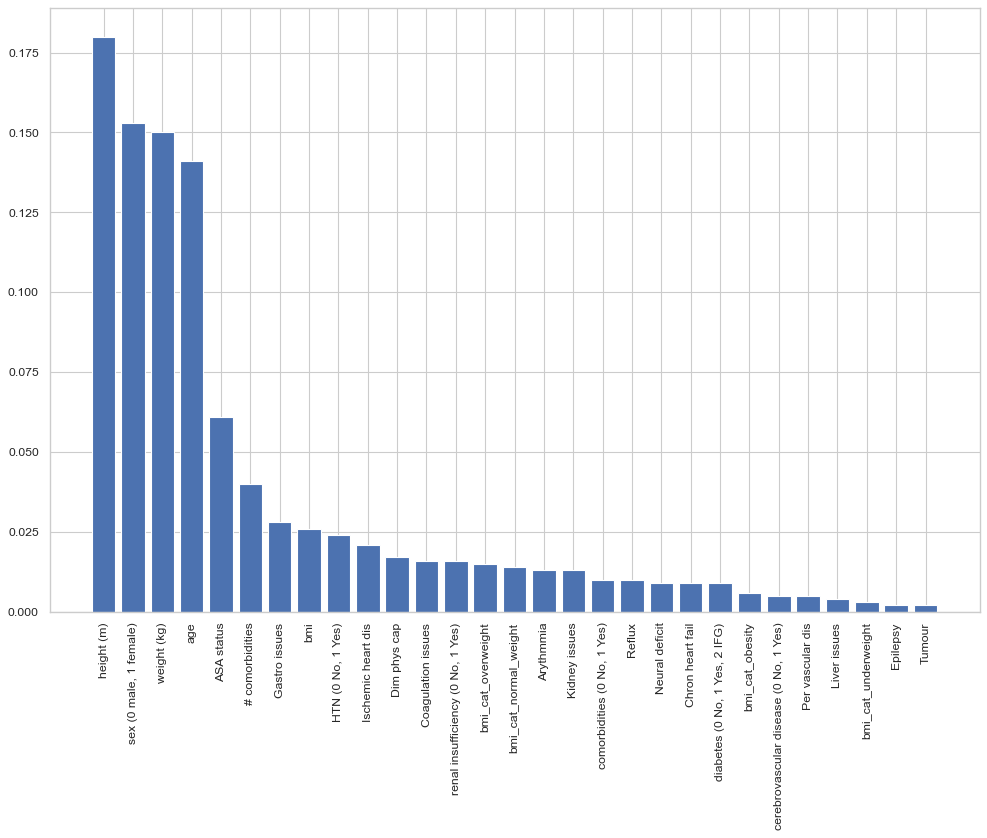

In [250]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(rfc_imp.index, height=rfc_imp['importance'])
plt.show()

## AdaBoost

In [251]:
ada = AdaBoostClassifier()
pipeline_ada = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", ada)]
)
pipeline_ada.fit(X_train, y_train)

ada_pred = pipeline_ada.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.61      0.80      0.70       143
         1.0       0.44      0.23      0.31        94

    accuracy                           0.58       237
   macro avg       0.53      0.52      0.50       237
weighted avg       0.55      0.58      0.54       237

----------------------------------------------------------
[[115  28]
 [ 72  22]]
----------------------------------------------------------
AUC: 55.83%
----------------------------------------------------------


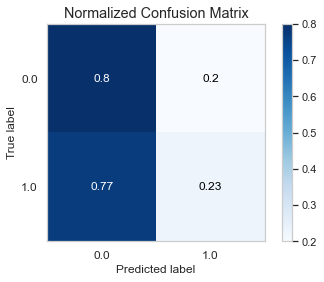

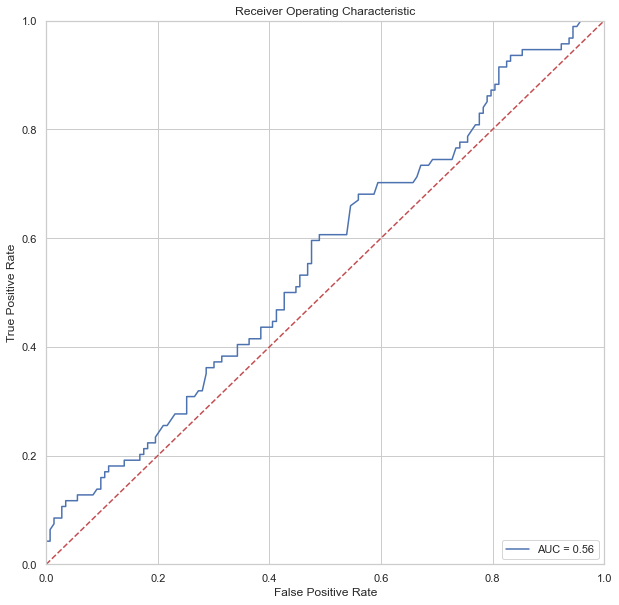

In [252]:
model_evaluation("AdaBoost", ada_pred, pipeline_ada)

In [253]:
ada_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(ada.feature_importances_, 3)}
)
ada_importances = ada_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [254]:
ada_imp = ada_importances.sort_values('importance', ascending=False)
ada_imp

importance
feature                                          
height (m)                                   0.28
sex (0 male, 1 female)                       0.22
age                                          0.14
weight (kg)                                  0.14
ASA status                                   0.06
Arythmmia                                    0.02
# comorbidities                              0.02
bmi_cat_overweight                           0.02
Neural deficit                               0.02
Kidney issues                                0.02
Coagulation issues                           0.02
renal insufficiency (0 No, 1 Yes)            0.02
cerebrovascular disease (0 No, 1 Yes)        0.02
Epilepsy                                     0.00
Per vascular dis                             0.00
HTN (0 No, 1 Yes)                            0.00
bmi_cat_normal_weight                        0.00
bmi_cat_obesity                              0.00
bmi                                          0.00
comorbidities (0 No, 1 Yes)                  0.00
Dim phys cap                                 0.00
Ischemic heart dis                           0.00
Chron heart fail                             0.00
Gastro issues                                0.00
Reflux                                       0.00
Liver issues                                 0.00
Tumour                                       0.00
diabetes (0 No, 1 Yes, 2 IFG)                0.00
bmi_cat_underweight                          0.00

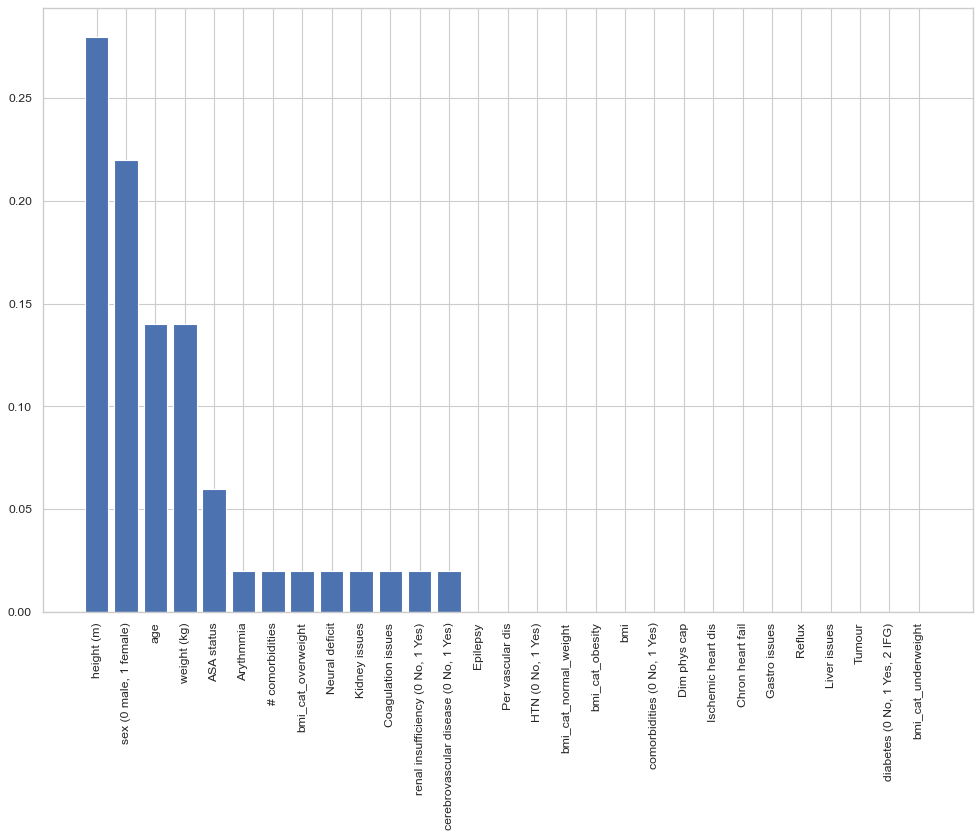

In [255]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(ada_imp.index, height=ada_imp['importance'])
plt.show()

## Catboost

In [ ]:
cat = CatBoostClassifier()
pipeline_cat = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", cat)]
)
pipeline_cat.fit(X_train, y_train)

cat_pred = pipeline_cat.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.66      0.71      0.68       143
         1.0       0.50      0.44      0.47        94

    accuracy                           0.60       237
   macro avg       0.58      0.57      0.58       237
weighted avg       0.60      0.60      0.60       237

----------------------------------------------------------
[[102  41]
 [ 53  41]]
----------------------------------------------------------
AUC: 61.70%
----------------------------------------------------------


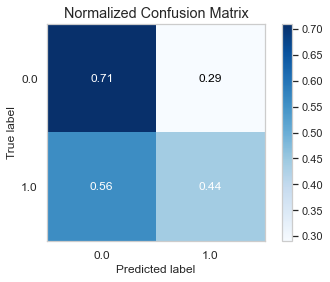

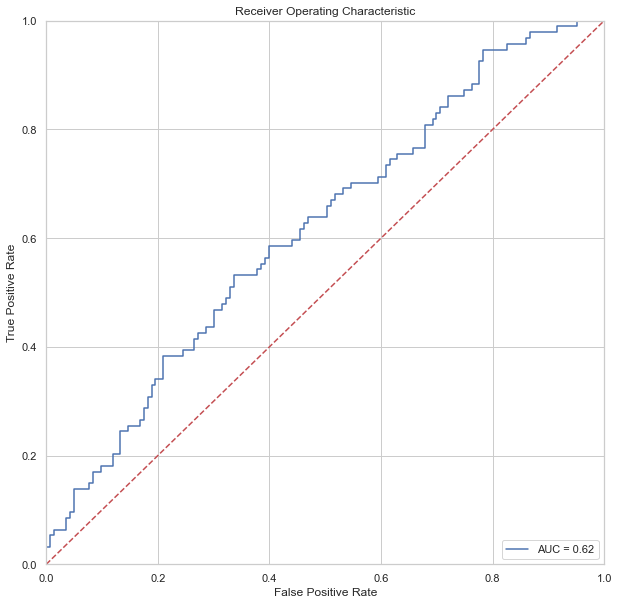

In [257]:
model_evaluation("CatBoost", cat_pred, pipeline_cat)

In [258]:
cat_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(cat.feature_importances_, 3)}
)
cat_importances = cat_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [259]:
cat_imp = cat_importances.sort_values('importance', ascending=False)
cat_imp

importance
feature                                          
sex (0 male, 1 female)                     14.946
height (m)                                 14.753
weight (kg)                                11.753
age                                        10.745
ASA status                                  8.936
# comorbidities                             6.891
Gastro issues                               4.088
renal insufficiency (0 No, 1 Yes)           3.198
Coagulation issues                          2.838
HTN (0 No, 1 Yes)                           2.759
Kidney issues                               1.985
Dim phys cap                                1.910
bmi                                         1.794
bmi_cat_overweight                          1.649
Arythmmia                                   1.620
bmi_cat_normal_weight                       1.467
Ischemic heart dis                          1.280
Reflux                                      1.230
comorbidities (0 No, 1 Yes)                 1.003
Neural deficit                              0.909
diabetes (0 No, 1 Yes, 2 IFG)               0.901
Chron heart fail                            0.798
Per vascular dis                            0.795
Liver issues                                0.518
bmi_cat_obesity                             0.415
cerebrovascular disease (0 No, 1 Yes)       0.389
bmi_cat_underweight                         0.210
Tumour                                      0.120
Epilepsy                                    0.099

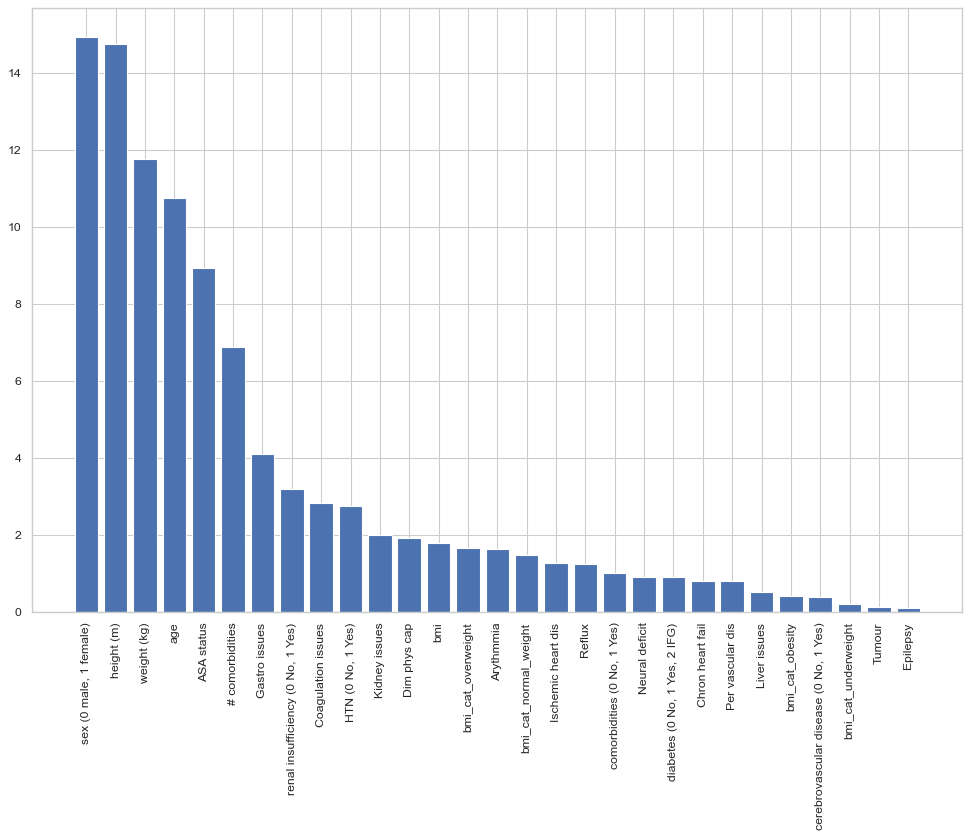

In [260]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(cat_imp.index, height=cat_imp['importance'])
plt.show()

## XGBoost

In [261]:
xgb = XGBClassifier()
pipeline_xgb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb)]
)
pipeline_xgb.fit(X_train, y_train)

xgb_pred = pipeline_xgb.predict(X_test)

[15:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59       143
         1.0       0.40      0.43      0.41        94

    accuracy                           0.51       237
   macro avg       0.50      0.50      0.50       237
weighted avg       0.52      0.51      0.52       237

----------------------------------------------------------
[[82 61]
 [54 40]]
----------------------------------------------------------
AUC: 55.52%
----------------------------------------------------------


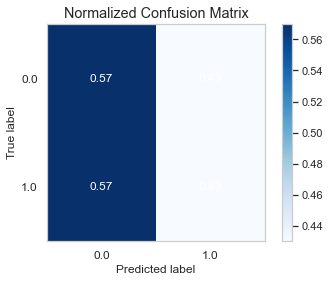

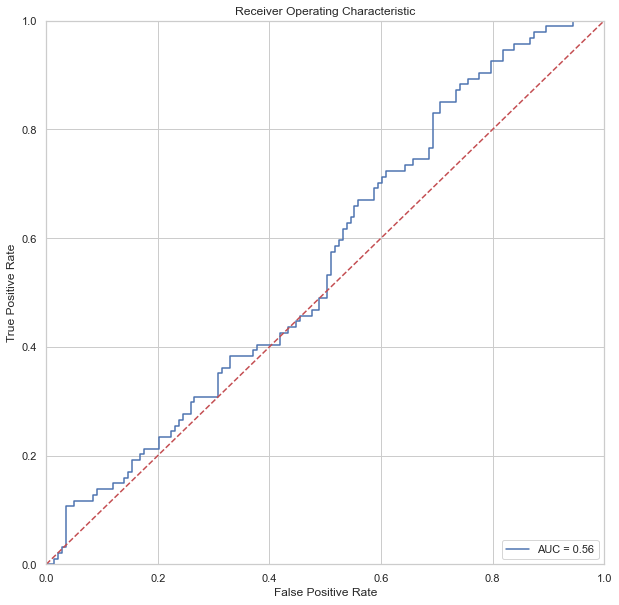

In [262]:
model_evaluation("XGBoost", xgb_pred, pipeline_xgb)

In [263]:
xgb_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(xgb.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [264]:
xgb_imp = xgb_importances.sort_values('importance', ascending=False)
xgb_imp

importance
feature                                          
ASA status                                  0.071
Reflux                                      0.068
renal insufficiency (0 No, 1 Yes)           0.057
bmi_cat_overweight                          0.055
Arythmmia                                   0.053
Kidney issues                               0.048
# comorbidities                             0.047
Chron heart fail                            0.046
Coagulation issues                          0.046
weight (kg)                                 0.043
cerebrovascular disease (0 No, 1 Yes)       0.042
sex (0 male, 1 female)                      0.041
Gastro issues                               0.041
height (m)                                  0.041
age                                         0.040
diabetes (0 No, 1 Yes, 2 IFG)               0.040
Ischemic heart dis                          0.036
Dim phys cap                                0.034
HTN (0 No, 1 Yes)                           0.032
Per vascular dis                            0.030
bmi                                         0.024
Neural deficit                              0.022
Tumour                                      0.018
Liver issues                                0.016
bmi_cat_normal_weight                       0.012
bmi_cat_underweight                         0.000
bmi_cat_obesity                             0.000
Epilepsy                                    0.000
comorbidities (0 No, 1 Yes)                 0.000

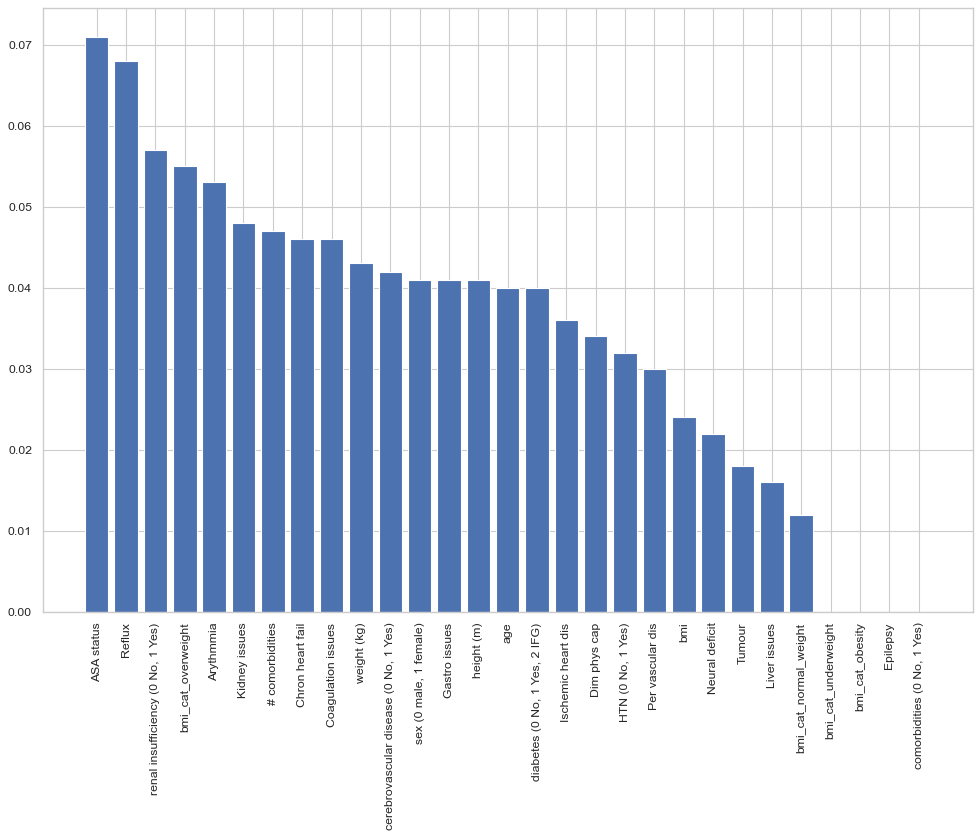

In [265]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(xgb_imp.index, height=xgb_imp['importance'])
plt.show()

## LightGBM

lgbm = LGBMClassifier()
pipeline_lgbm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", lgbm)]
)
pipeline_lgbm.fit(X_train, y_train)

lgbm_pred = pipeline_lgbm.predict(X_test)

model_evaluation("LightGBM", lgbm_pred, pipeline_lgbm)

lgbm_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(lgbm.feature_importances_, 3)}
)
lgbm_importances = lgbm_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

lgbm_imp = lgbm_importances.sort_values('importance', ascending=False)
lgbm_imp

plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(lgbm_imp.index, height=lgbm_imp['importance'])
plt.show()

# Model Summarize

In [266]:
model_auc_score

{'Logistic Regression': 0.5435203094777562,
 'KNN': 0.5219461389674156,
 'Naive Bayes': 0.5995387591132272,
 'SVM with Radia Basis Function': 0.5987948221990775,
 'Random Forest': 0.6239398898973367,
 'AdaBoost': 0.5582874572236275,
 'CatBoost': 0.6170212765957447,
 'XGBoost': 0.5552001190299063,
 'LightGBM': 0.6603425559947298}

In [267]:
model = []
score = []
for k, v in model_auc_score.items():
    model.append(k)
    score.append(v)

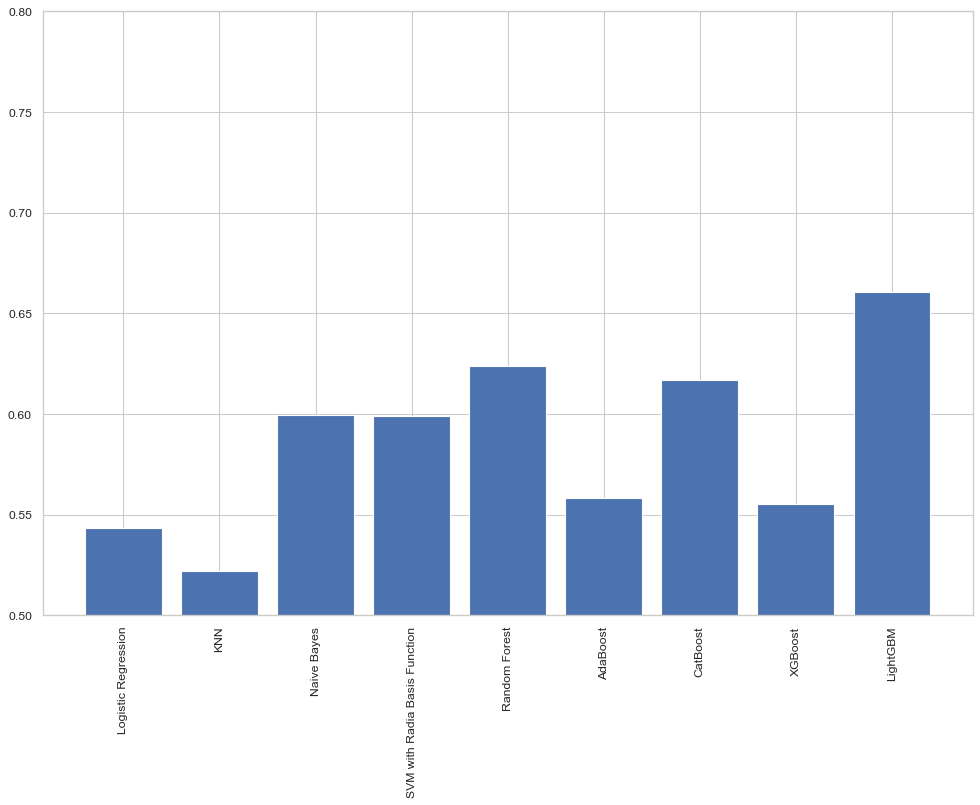

In [268]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(model, score)
plt.ylim(0.5, 0.8)
plt.show()

# Third cluster model testing

In [269]:
#Split the data for the first cluster

X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, test_size=0.2, random_state=19
)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 649 samples.
Testing set has 163 samples.


## Logistic Regression

In [270]:
l_regr = LogisticRegression(max_iter=1000)
pipeline_lregr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", l_regr)]
)

pipeline_lregr.fit(X_train, y_train)
lregr_pred = pipeline_lregr.predict(X_test)
lregr_pred_proba = pipeline_lregr.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.53      0.51      0.52        81
         1.0       0.53      0.56      0.55        82

    accuracy                           0.53       163
   macro avg       0.53      0.53      0.53       163
weighted avg       0.53      0.53      0.53       163

----------------------------------------------------------
[[41 40]
 [36 46]]
----------------------------------------------------------
AUC: 55.34%
----------------------------------------------------------


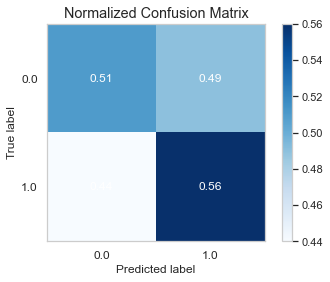

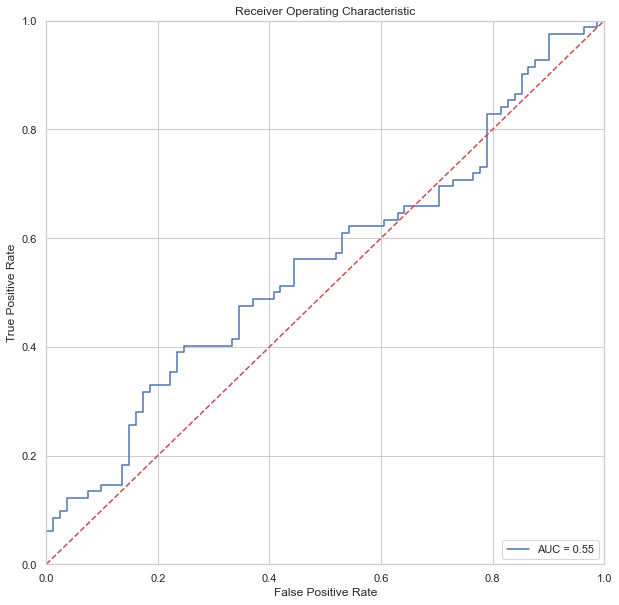

In [271]:
model_evaluation("Logistic Regression", lregr_pred, pipeline_lregr)

In [272]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = l_regr.coef_[0]
new = pd.DataFrame(importance).T

In [273]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=False)

In [274]:
importance2

0
Neural deficit                         0.874019
cerebrovascular disease (0 No, 1 Yes)  0.568498
bmi_cat_obesity                        0.534953
renal insufficiency (0 No, 1 Yes)      0.462263
sex (0 male, 1 female)                 0.397916
ASA status                             0.382840
Reflux                                 0.177597
diabetes (0 No, 1 Yes, 2 IFG)          0.133642
# comorbidities                        0.121332
Kidney issues                          0.099087
Arythmmia                              0.041822
age                                    0.002072
comorbidities (0 No, 1 Yes)            0.000239
Chron heart fail                      -0.002729
Per vascular dis                      -0.031196
Tumour                                -0.041123
Liver issues                          -0.055862
Dim phys cap                          -0.069013
weight (kg)                           -0.077666
HTN (0 No, 1 Yes)                     -0.091290
bmi_cat_normal_weight                 -0.110809
Epilepsy                              -0.118088
Gastro issues                         -0.132485
bmi_cat_overweight                    -0.133937
height (m)                            -0.187586
Ischemic heart dis                    -0.228656
bmi                                   -0.256072
Coagulation issues                    -0.270474
bmi_cat_underweight                   -0.289968

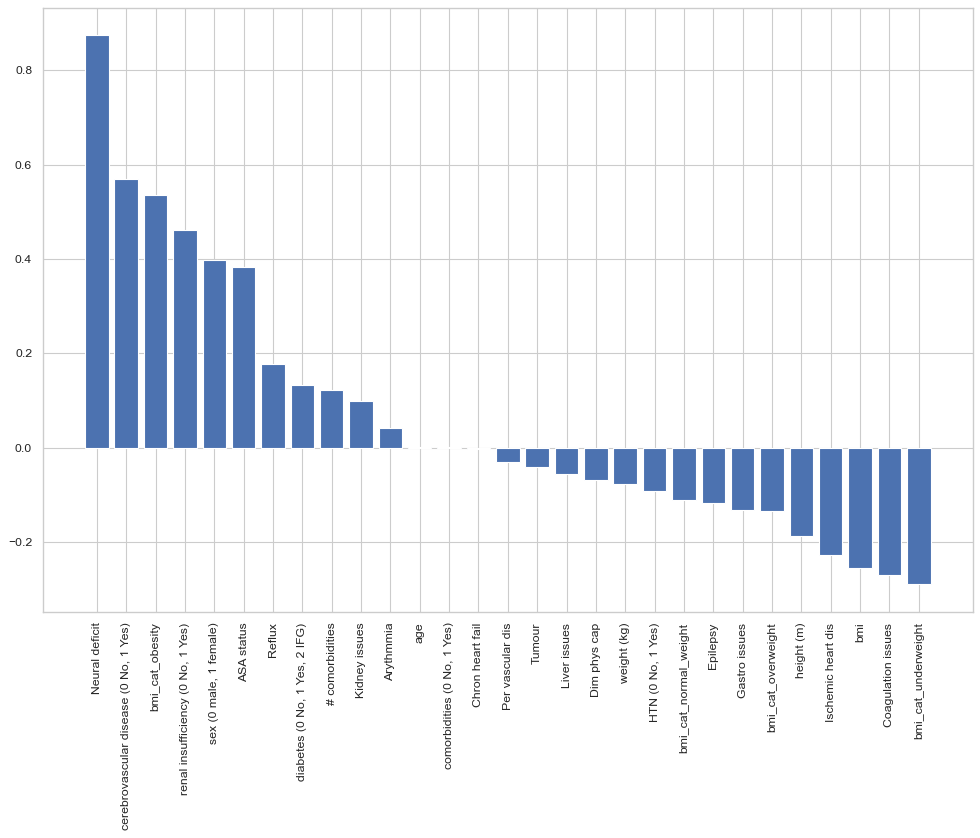

In [275]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

## KNN

In [276]:
knn = KNeighborsClassifier(n_neighbors=5)
pipeline_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", knn)]
)
pipeline_knn.fit(X_train, y_train)

knn_predictions = pipeline_knn.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.54      0.60      0.57        81
         1.0       0.56      0.50      0.53        82

    accuracy                           0.55       163
   macro avg       0.55      0.55      0.55       163
weighted avg       0.55      0.55      0.55       163

----------------------------------------------------------
[[49 32]
 [41 41]]
----------------------------------------------------------
AUC: 61.72%
----------------------------------------------------------


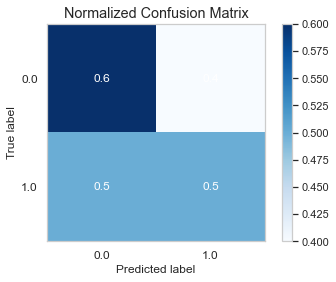

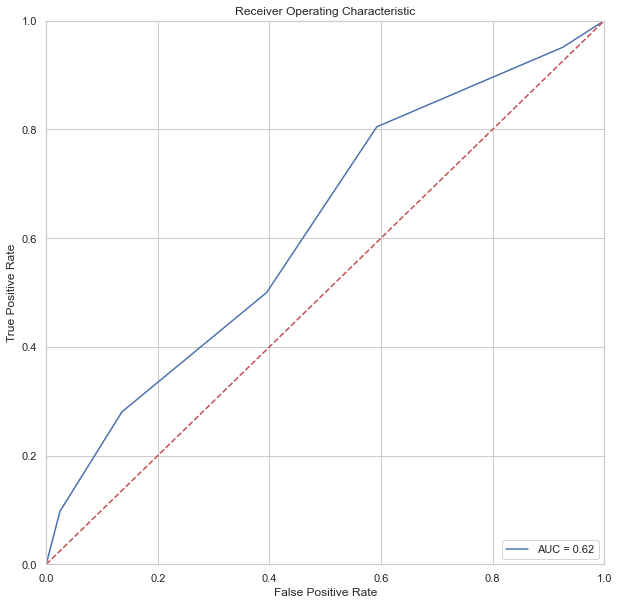

In [277]:
model_evaluation("KNN", knn_predictions, pipeline_knn)

## NB

In [278]:
nb = BernoulliNB()
pipeline_nb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", nb)]
)
pipeline_nb.fit(X_train, y_train)

nb_predictions = pipeline_nb.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.52      0.49      0.51        81
         1.0       0.52      0.55      0.54        82

    accuracy                           0.52       163
   macro avg       0.52      0.52      0.52       163
weighted avg       0.52      0.52      0.52       163

----------------------------------------------------------
[[40 41]
 [37 45]]
----------------------------------------------------------
AUC: 53.24%
----------------------------------------------------------


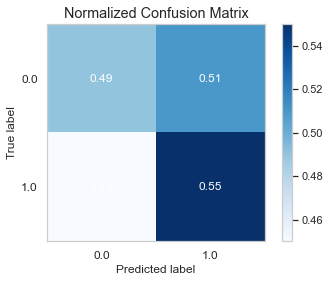

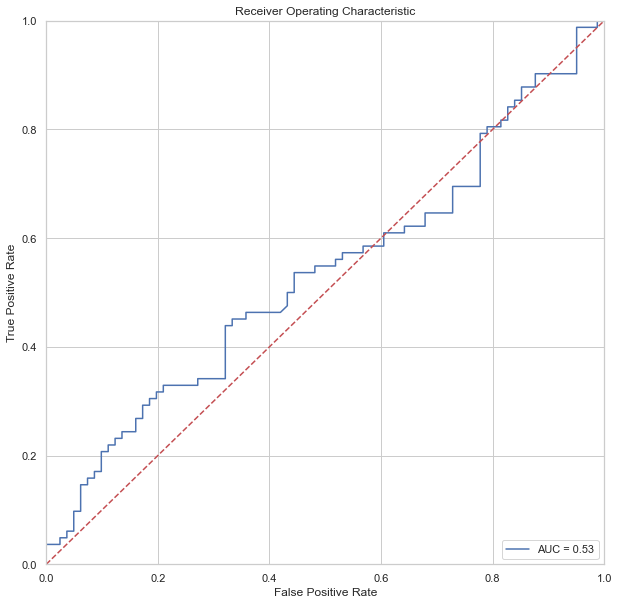

In [279]:
model_evaluation("Naive Bayes", nb_predictions, pipeline_nb)

In [280]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = nb.coef_[0]
new = pd.DataFrame(importance).T

In [281]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=True)

In [282]:
importance2

0
bmi_cat_underweight                   -3.988984
Epilepsy                              -3.988984
Tumour                                -2.315008
Liver issues                          -2.143157
renal insufficiency (0 No, 1 Yes)     -1.930596
Reflux                                -1.773410
cerebrovascular disease (0 No, 1 Yes) -1.669870
bmi_cat_obesity                       -1.561236
Dim phys cap                          -1.518064
diabetes (0 No, 1 Yes, 2 IFG)         -1.386294
Per vascular dis                      -1.326396
Neural deficit                        -1.195776
bmi                                   -1.175573
Gastro issues                         -1.146015
bmi_cat_normal_weight                 -1.027153
bmi_cat_overweight                    -0.868089
Chron heart fail                      -0.824916
height (m)                            -0.763464
age                                   -0.763464
Kidney issues                         -0.756863
weight (kg)                           -0.668756
Arythmmia                             -0.538997
Coagulation issues                    -0.533719
sex (0 male, 1 female)                -0.512885
Ischemic heart dis                    -0.186032
HTN (0 No, 1 Yes)                     -0.156726
ASA status                            -0.003091
# comorbidities                       -0.003091
comorbidities (0 No, 1 Yes)           -0.003091

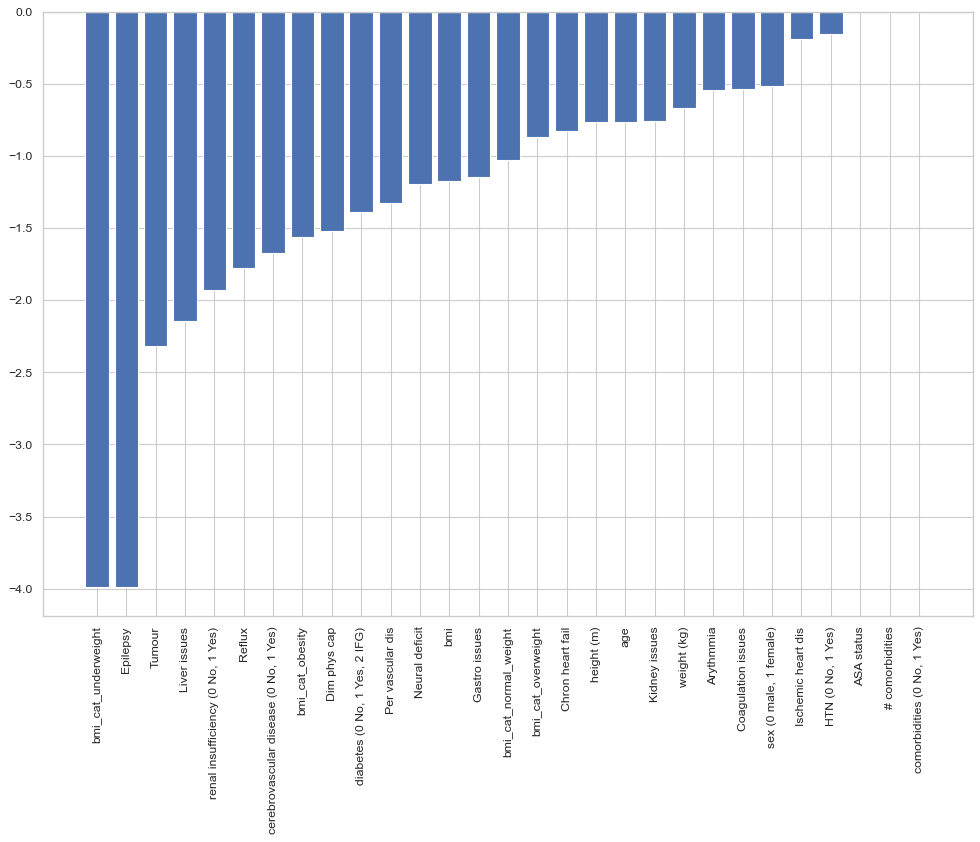

In [283]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

## SVM

### Linear SVM

In [284]:
svm = LinearSVC()
pipeline_svm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svm)]
)
pipeline_svm.fit(X_train, y_train)

svm_predictions = pipeline_svm.predict(X_test)

In [285]:
# model_evaluation("Linear SVM", svm_predictions, pipeline_svm)

In [286]:
#prepping before visualization = creating array and then dataframe out of coefficients
importance = svm.coef_[0]
new = pd.DataFrame(importance).T

In [287]:
 #prepping before visualization
importance1 = pd.DataFrame(new)
columns = X.columns
importance1.columns = columns
importance2 = importance1.T
importance2 = importance2.sort_values(0, ascending=False)

In [288]:
importance2

0
Neural deficit                         0.402855
cerebrovascular disease (0 No, 1 Yes)  0.270658
renal insufficiency (0 No, 1 Yes)      0.225508
bmi_cat_obesity                        0.198634
sex (0 male, 1 female)                 0.177884
ASA status                             0.170324
Reflux                                 0.086624
diabetes (0 No, 1 Yes, 2 IFG)          0.078022
age                                    0.061899
Kidney issues                          0.056903
# comorbidities                        0.040317
Arythmmia                              0.031174
Chron heart fail                       0.010703
Per vascular dis                      -0.008092
Tumour                                -0.017317
Dim phys cap                          -0.021312
Liver issues                          -0.021935
HTN (0 No, 1 Yes)                     -0.034949
Gastro issues                         -0.057230
Epilepsy                              -0.059412
weight (kg)                           -0.071857
Ischemic heart dis                    -0.096073
Coagulation issues                    -0.110660
bmi                                   -0.118295
bmi_cat_overweight                    -0.129424
bmi_cat_normal_weight                 -0.133404
height (m)                            -0.155675
bmi_cat_underweight                   -0.293506
comorbidities (0 No, 1 Yes)           -0.357700

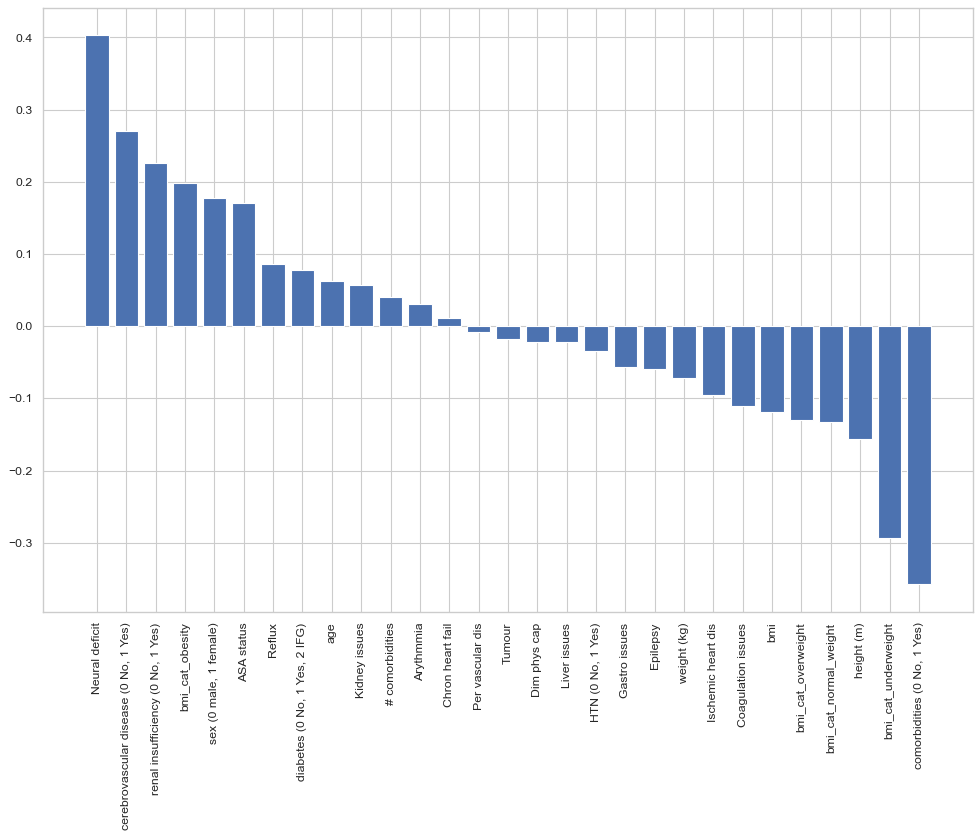

In [289]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(importance2.index, height=importance2[0])
plt.show()

### SVM with Radial Basis Function

In [290]:
# Call model into variable
svm_rbf = SVC(kernel="rbf", gamma="scale", probability=True)
pipeline_svm_rbf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svm_rbf)]
)
pipeline_svm_rbf.fit(X_train, y_train)

svm_rbf_predictions = pipeline_svm_rbf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57        81
         1.0       0.57      0.55      0.56        82

    accuracy                           0.56       163
   macro avg       0.56      0.56      0.56       163
weighted avg       0.56      0.56      0.56       163

----------------------------------------------------------
[[47 34]
 [37 45]]
----------------------------------------------------------
AUC: 57.36%
----------------------------------------------------------


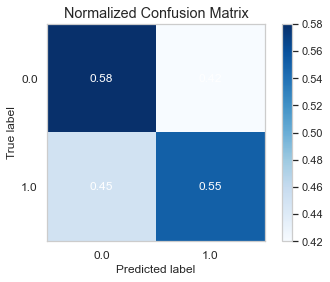

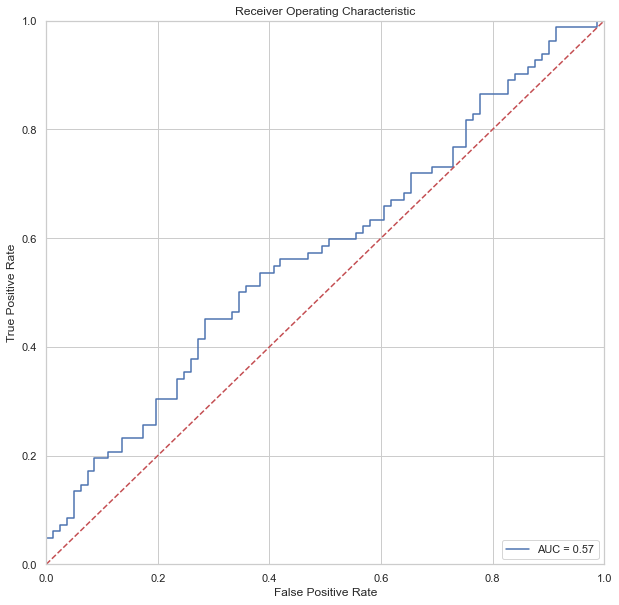

In [291]:
model_evaluation("SVM with Radia Basis Function", svm_rbf_predictions, pipeline_svm_rbf)

## Random Forest

In [292]:
rfc = RandomForestClassifier(random_state=19)

pipeline_rfc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rfc)]
)
pipeline_rfc.fit(X_train, y_train)

rfc_pred = pipeline_rfc.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64        81
         1.0       0.64      0.63      0.64        82

    accuracy                           0.64       163
   macro avg       0.64      0.64      0.64       163
weighted avg       0.64      0.64      0.64       163

----------------------------------------------------------
[[52 29]
 [30 52]]
----------------------------------------------------------
AUC: 68.13%
----------------------------------------------------------


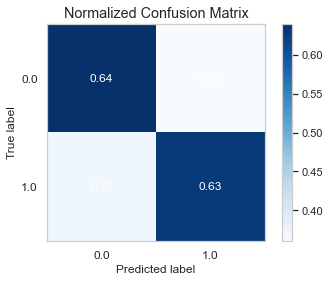

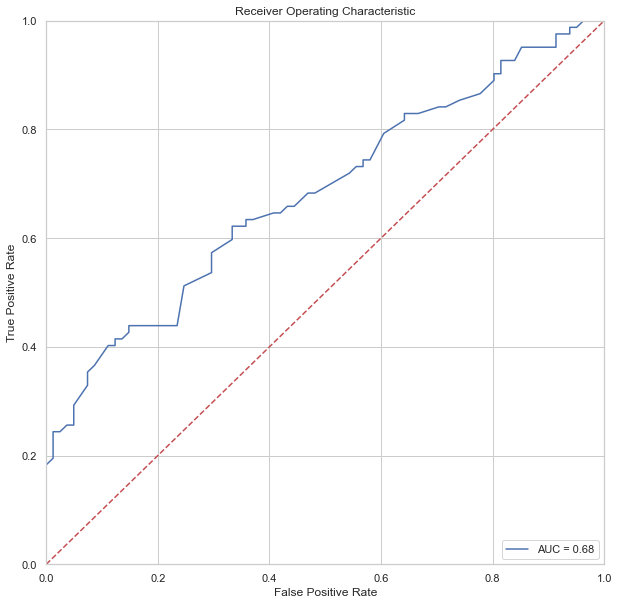

In [293]:
model_evaluation("Random Forest", rfc_pred, pipeline_rfc)

In [294]:
rfc_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(rfc.feature_importances_, 3)}
)
rfc_importances = rfc_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [295]:
rfc_imp = rfc_importances.sort_values('importance', ascending=False)
rfc_imp

importance
feature                                          
sex (0 male, 1 female)                      0.142
height (m)                                  0.132
age                                         0.121
weight (kg)                                 0.110
# comorbidities                             0.058
Neural deficit                              0.035
ASA status                                  0.032
Gastro issues                               0.028
Coagulation issues                          0.026
Arythmmia                                   0.026
Kidney issues                               0.025
Chron heart fail                            0.023
Dim phys cap                                0.023
Per vascular dis                            0.021
cerebrovascular disease (0 No, 1 Yes)       0.020
diabetes (0 No, 1 Yes, 2 IFG)               0.020
Ischemic heart dis                          0.018
bmi_cat_overweight                          0.018
bmi                                         0.018
Reflux                                      0.017
HTN (0 No, 1 Yes)                           0.016
renal insufficiency (0 No, 1 Yes)           0.015
Liver issues                                0.014
Tumour                                      0.012
bmi_cat_normal_weight                       0.012
bmi_cat_obesity                             0.011
Epilepsy                                    0.004
bmi_cat_underweight                         0.003
comorbidities (0 No, 1 Yes)                 0.000

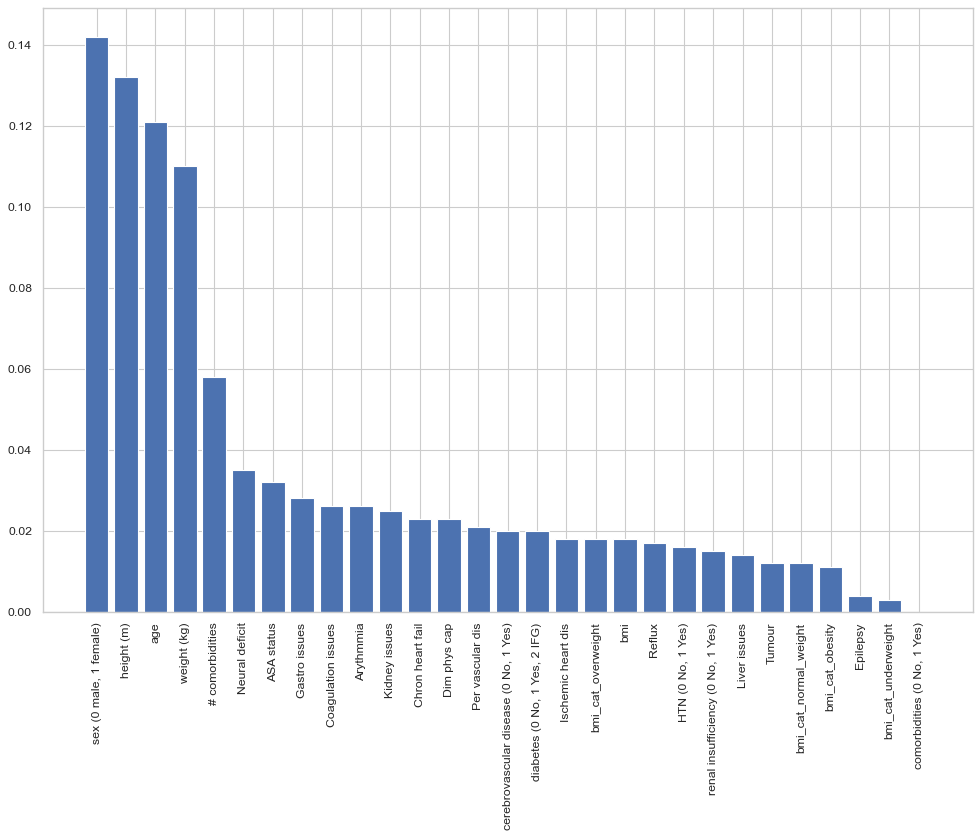

In [296]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(rfc_imp.index, height=rfc_imp['importance'])
plt.show()

## AdaBoost

In [297]:
ada = AdaBoostClassifier()
pipeline_ada = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", ada)]
)
pipeline_ada.fit(X_train, y_train)

ada_pred = pipeline_ada.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.52      0.51      0.51        81
         1.0       0.52      0.54      0.53        82

    accuracy                           0.52       163
   macro avg       0.52      0.52      0.52       163
weighted avg       0.52      0.52      0.52       163

----------------------------------------------------------
[[41 40]
 [38 44]]
----------------------------------------------------------
AUC: 51.35%
----------------------------------------------------------


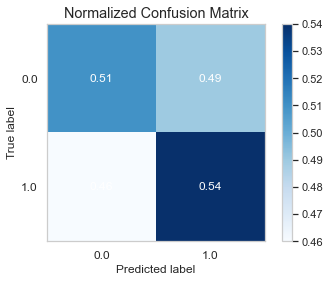

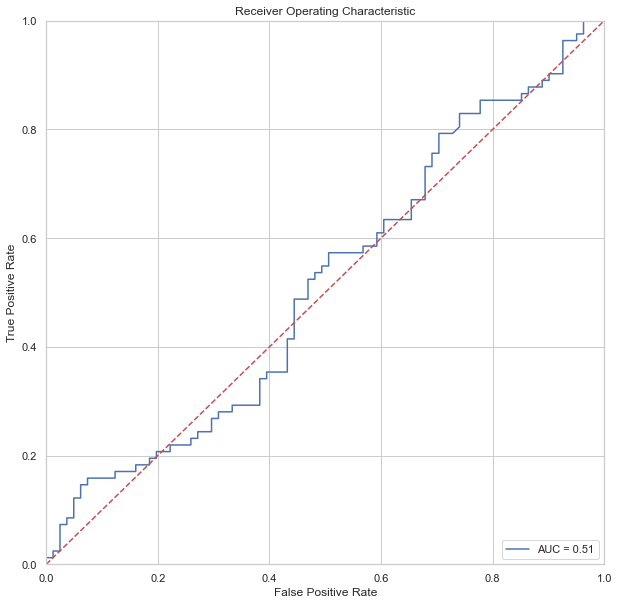

In [298]:
model_evaluation("AdaBoost", ada_pred, pipeline_ada)

In [299]:
ada_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(ada.feature_importances_, 3)}
)
ada_importances = ada_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [300]:
ada_imp = ada_importances.sort_values('importance', ascending=False)
ada_imp

importance
feature                                          
height (m)                                   0.26
weight (kg)                                  0.24
sex (0 male, 1 female)                       0.12
age                                          0.12
# comorbidities                              0.06
ASA status                                   0.04
cerebrovascular disease (0 No, 1 Yes)        0.02
Reflux                                       0.02
bmi_cat_overweight                           0.02
Gastro issues                                0.02
Neural deficit                               0.02
bmi                                          0.02
Coagulation issues                           0.02
renal insufficiency (0 No, 1 Yes)            0.02
Per vascular dis                             0.00
HTN (0 No, 1 Yes)                            0.00
bmi_cat_normal_weight                        0.00
bmi_cat_obesity                              0.00
bmi_cat_underweight                          0.00
comorbidities (0 No, 1 Yes)                  0.00
Dim phys cap                                 0.00
Ischemic heart dis                           0.00
Chron heart fail                             0.00
Arythmmia                                    0.00
Liver issues                                 0.00
Kidney issues                                0.00
Tumour                                       0.00
diabetes (0 No, 1 Yes, 2 IFG)                0.00
Epilepsy                                     0.00

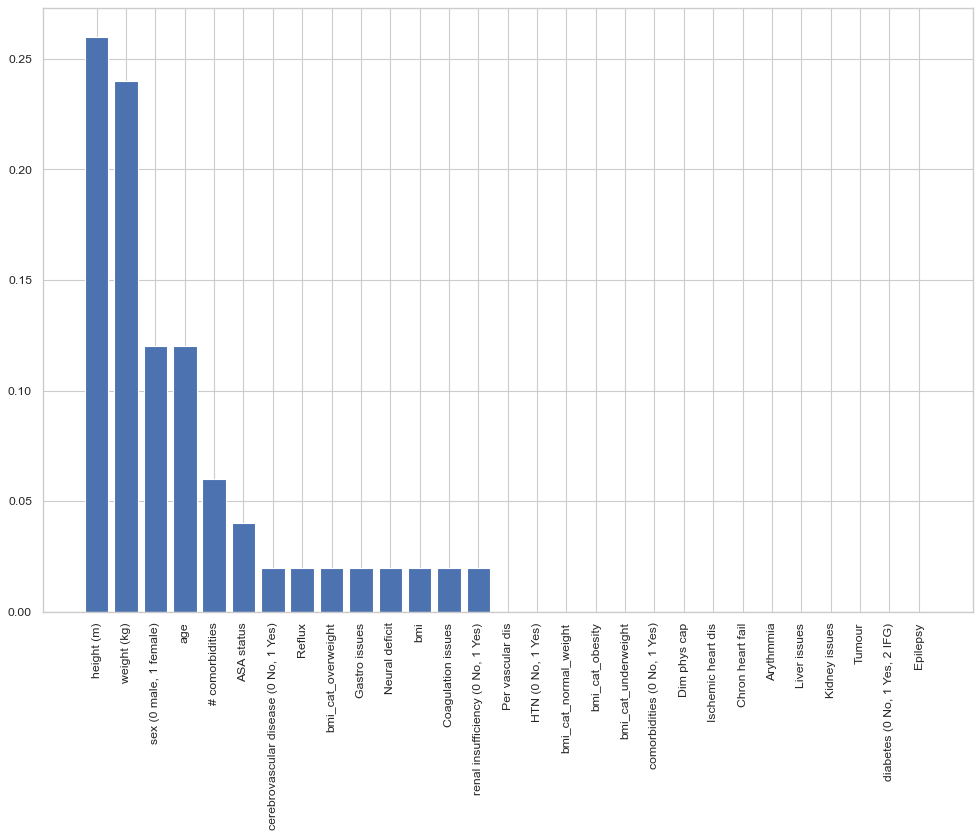

In [301]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(ada_imp.index, height=ada_imp['importance'])
plt.show()

## Catboost

In [ ]:
cat = CatBoostClassifier()
pipeline_cat = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", cat)]
)
pipeline_cat.fit(X_train, y_train)

cat_pred = pipeline_cat.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61        81
         1.0       0.62      0.63      0.63        82

    accuracy                           0.62       163
   macro avg       0.62      0.62      0.62       163
weighted avg       0.62      0.62      0.62       163

----------------------------------------------------------
[[49 32]
 [30 52]]
----------------------------------------------------------
AUC: 66.34%
----------------------------------------------------------


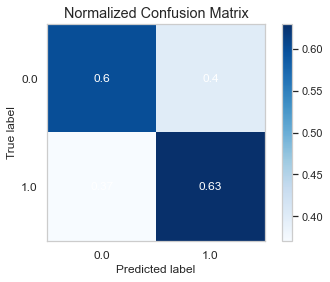

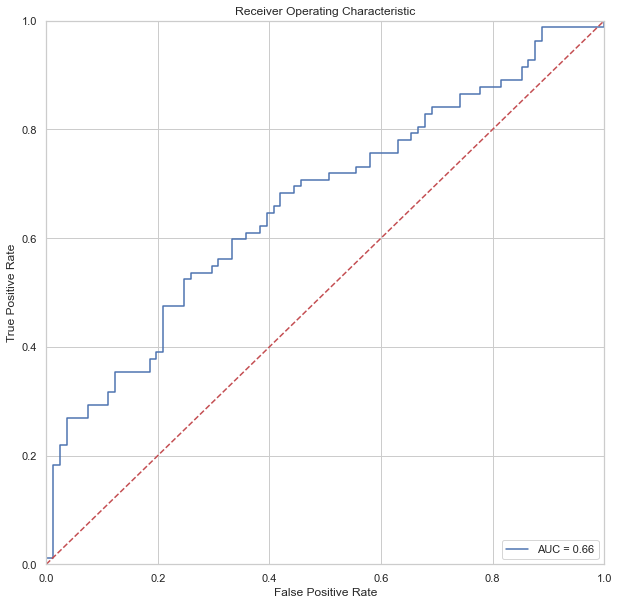

In [303]:
model_evaluation("CatBoost", cat_pred, pipeline_cat)

In [304]:
cat_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(cat.feature_importances_, 3)}
)
cat_importances = cat_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [305]:
cat_imp = cat_importances.sort_values('importance', ascending=False)
cat_imp

importance
feature                                          
sex (0 male, 1 female)                     15.112
weight (kg)                                12.383
height (m)                                  9.126
age                                         8.581
# comorbidities                             6.568
Neural deficit                              5.722
ASA status                                  4.352
Gastro issues                               3.403
Kidney issues                               3.395
diabetes (0 No, 1 Yes, 2 IFG)               3.079
cerebrovascular disease (0 No, 1 Yes)       2.908
Coagulation issues                          2.637
Arythmmia                                   2.577
Ischemic heart dis                          2.111
bmi_cat_overweight                          2.003
Chron heart fail                            1.984
HTN (0 No, 1 Yes)                           1.951
Dim phys cap                                1.709
Per vascular dis                            1.663
bmi                                         1.642
Reflux                                      1.435
bmi_cat_normal_weight                       1.308
renal insufficiency (0 No, 1 Yes)           1.290
Liver issues                                1.118
bmi_cat_obesity                             1.116
Tumour                                      0.474
bmi_cat_underweight                         0.188
Epilepsy                                    0.164
comorbidities (0 No, 1 Yes)                 0.000

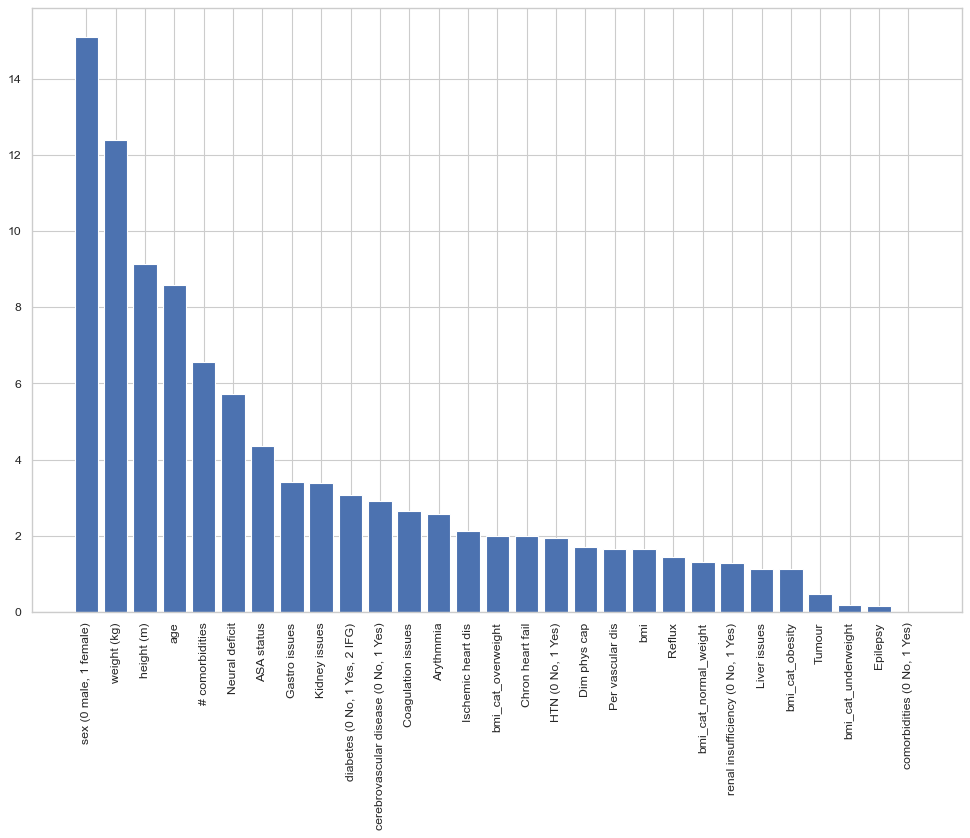

In [306]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(cat_imp.index, height=cat_imp['importance'])
plt.show()

## XGBoost

In [307]:
xgb = XGBClassifier()
pipeline_xgb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb)]
)
pipeline_xgb.fit(X_train, y_train)

xgb_pred = pipeline_xgb.predict(X_test)

[15:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65        81
         1.0       0.66      0.63      0.65        82

    accuracy                           0.65       163
   macro avg       0.65      0.65      0.65       163
weighted avg       0.65      0.65      0.65       163

----------------------------------------------------------
[[54 27]
 [30 52]]
----------------------------------------------------------
AUC: 69.84%
----------------------------------------------------------


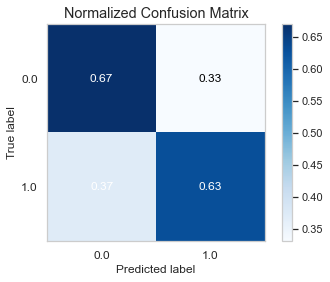

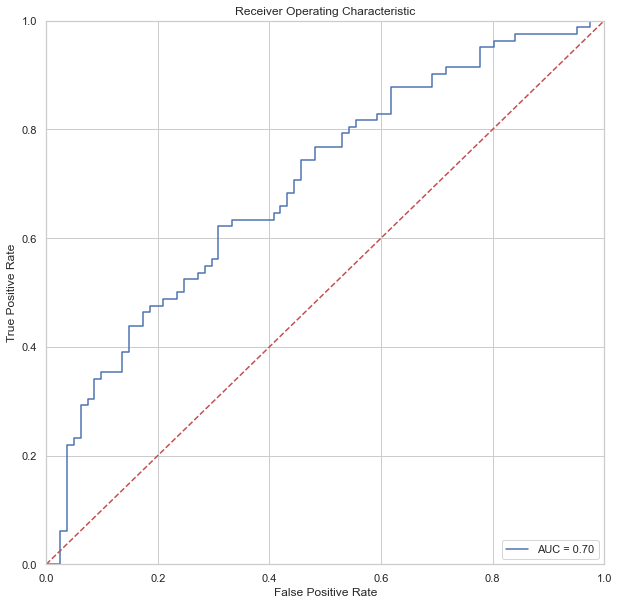

In [308]:
model_evaluation("XGBoost", xgb_pred, pipeline_xgb)

In [309]:
xgb_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(xgb.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

In [310]:
xgb_imp = xgb_importances.sort_values('importance', ascending=False)
xgb_imp

importance
feature                                          
Neural deficit                              0.118
Ischemic heart dis                          0.056
cerebrovascular disease (0 No, 1 Yes)       0.053
Kidney issues                               0.050
diabetes (0 No, 1 Yes, 2 IFG)               0.047
sex (0 male, 1 female)                      0.046
weight (kg)                                 0.045
age                                         0.043
# comorbidities                             0.043
Chron heart fail                            0.040
Reflux                                      0.040
height (m)                                  0.038
Gastro issues                               0.038
Per vascular dis                            0.037
Liver issues                                0.037
Arythmmia                                   0.034
bmi_cat_overweight                          0.033
Dim phys cap                                0.032
ASA status                                  0.032
Coagulation issues                          0.030
renal insufficiency (0 No, 1 Yes)           0.028
HTN (0 No, 1 Yes)                           0.027
Tumour                                      0.025
bmi                                         0.023
bmi_cat_normal_weight                       0.006
bmi_cat_underweight                         0.000
Epilepsy                                    0.000
bmi_cat_obesity                             0.000
comorbidities (0 No, 1 Yes)                 0.000

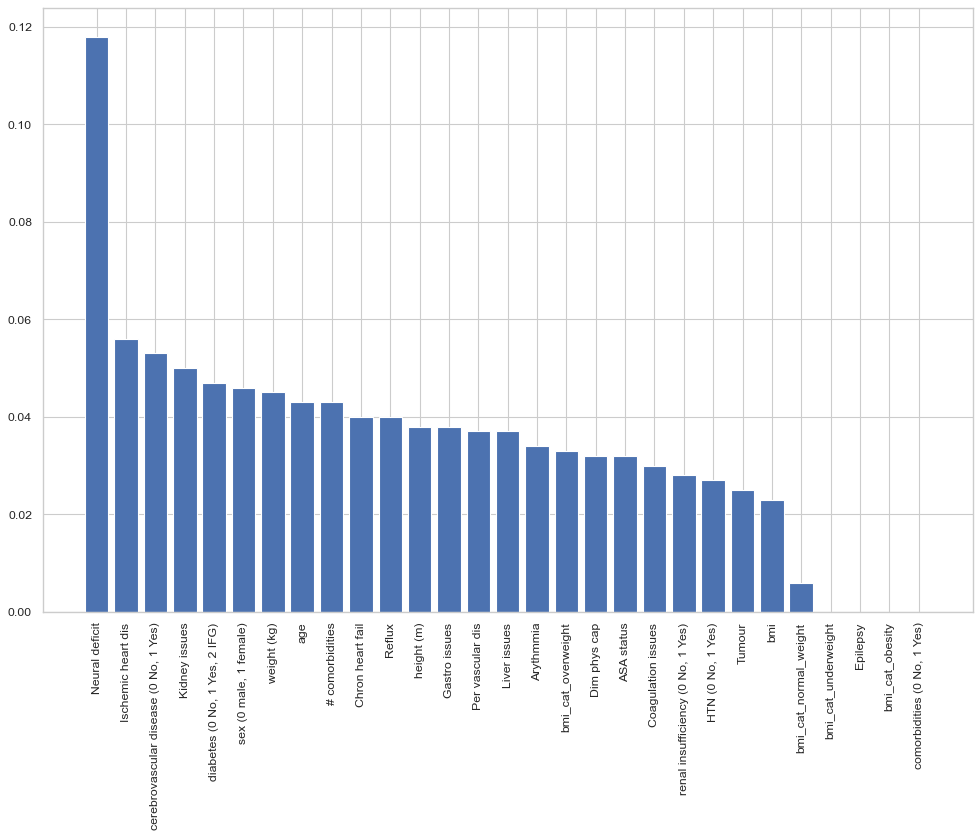

In [311]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(xgb_imp.index, height=xgb_imp['importance'])
plt.show()

## LightGBM

lgbm = LGBMClassifier()
pipeline_lgbm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", lgbm)]
)
pipeline_lgbm.fit(X_train, y_train)

lgbm_pred = pipeline_lgbm.predict(X_test)

model_evaluation("LightGBM", lgbm_pred, pipeline_lgbm)

lgbm_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": np.round(lgbm.feature_importances_, 3)}
)
lgbm_importances = lgbm_importances.sort_values("importance", ascending=True).set_index(
    "feature"
)

lgbm_imp = lgbm_importances.sort_values('importance', ascending=False)
lgbm_imp

plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(lgbm_imp.index, height=lgbm_imp['importance'])
plt.show()

# Model Summarize

In [312]:
model_auc_score

{'Logistic Regression': 0.5534477566997893,
 'KNN': 0.6172086720867209,
 'Naive Bayes': 0.5324450466726889,
 'SVM with Radia Basis Function': 0.5736224028906955,
 'Random Forest': 0.681345980126468,
 'AdaBoost': 0.513474856970792,
 'CatBoost': 0.663354411321891,
 'XGBoost': 0.6984342065642879,
 'LightGBM': 0.6603425559947298}

In [313]:
model = []
score = []
for k, v in model_auc_score.items():
    model.append(k)
    score.append(v)

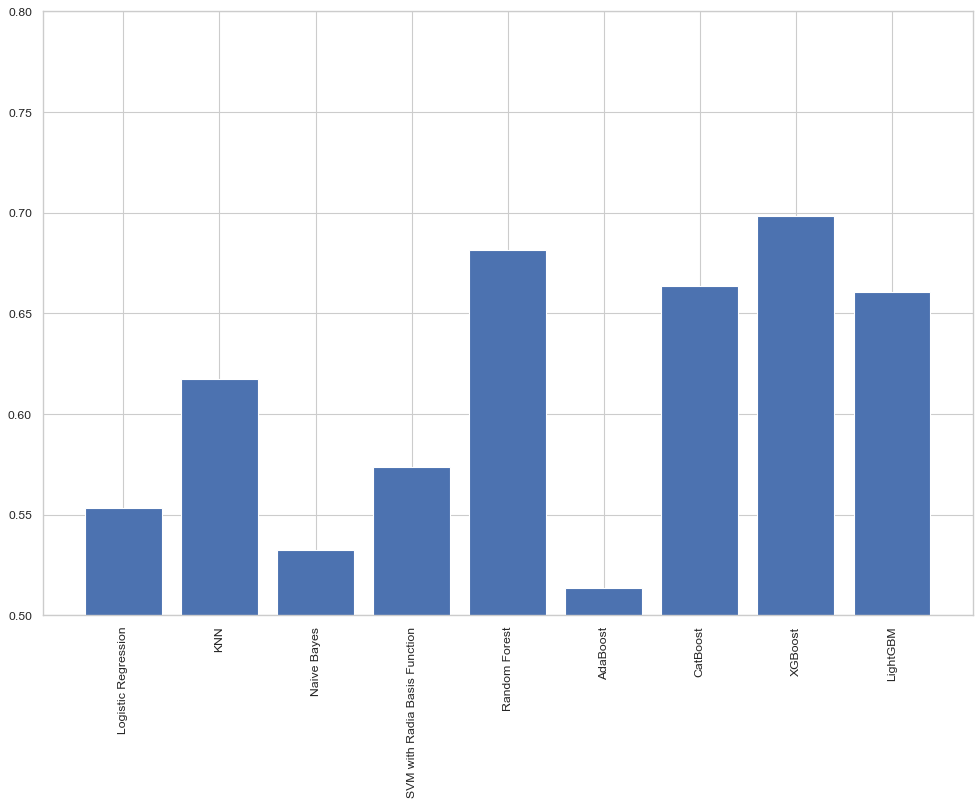

In [314]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(model, score)
plt.ylim(0.5, 0.8)
plt.show()

# Shap Explainability

## Preparing the data

In [315]:
# Select X and y values (predictor and outcome)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1:]  # POD

In [316]:
# Drop Creatinin and Neuromuscular because of the missing values and imbalanced data

X.drop(['Neuromuscular', 'urgency (1 elective, 2 urgent, 3 emergency)'], axis=1, inplace=True)

In [317]:
# Split the data again after remove new columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19
)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2311 samples.
Testing set has 578 samples.


## Implementing SHAP

In [318]:
feature_names = [x for x in X_train.columns]

In [319]:
def rfc_gridsearch_best_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=feature_names)
    return gridsearch_rf.best_estimator_.predict_proba(data_asframe)

In [320]:
X_summary = shap.kmeans(X_train, 29)
shap_kernel_explainer = shap.KernelExplainer(rfc_gridsearch_best_predict, X_summary)

In [321]:
shap_values = shap_kernel_explainer.shap_values(X_test)

  0%|          | 0/578 [00:00<?, ?it/s]

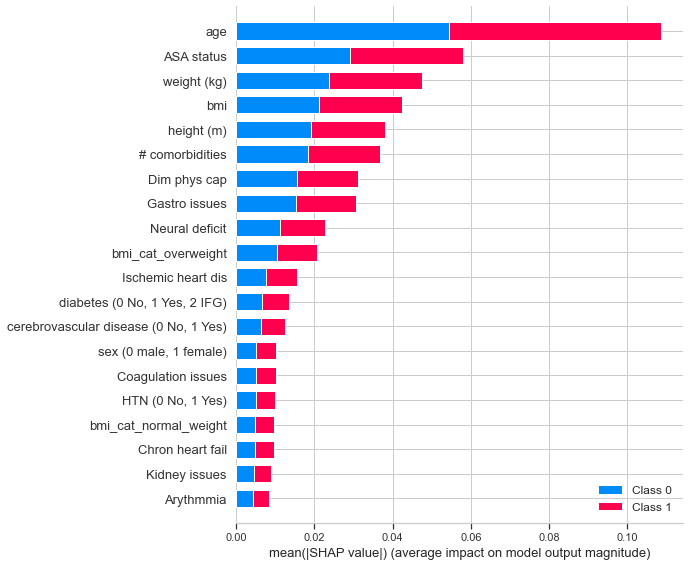

In [322]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [323]:
pred_probabilities = gridsearch_rf.best_estimator_.predict_proba(X_test)

In [324]:
pred_probabilities

array([[0.64      , 0.36      ],
       [0.35495798, 0.64504202],
       [0.49176471, 0.50823529],
       ...,
       [0.48078151, 0.51921849],
       [0.91882353, 0.08117647],
       [0.94823529, 0.05176471]])

In [325]:
pred_probabilities[:, 1].max()

0.9764705882352941

In [326]:
np.where(pred_probabilities == pred_probabilities[:, 1].max())

(array([440], dtype=int64), array([1], dtype=int64))

In [335]:
choosen_instance = X_test.loc[[976]]
shap_values = shap_kernel_explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(shap_kernel_explainer.expected_value[1], shap_values[1], choosen_instance)

  0%|          | 0/1 [00:00<?, ?it/s]

# Lime Explainability

In [336]:
 feature_names = [x for x in X_train.columns]

In [337]:
def rfc_gridsearch_best_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=feature_names)
    return gridsearch_rf.best_estimator_.predict_proba(data_asframe)

In [338]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=X_train.columns, 
                                                   mode='classification', 
                                                   discretize_continuous=False,
                                            
                                                  )
n=549
exp = explainer.explain_instance(X_test.loc[n], rfc_gridsearch_best_predict, num_features=10, top_labels=1)
exp.show_in_notebook(show_table=True, predict_proba=True, show_predicted_value=True, show_all=False)
# exp.show_in_notebook(show_table=True)

# Neural Network

In [339]:
# import functions
import tf_metrics
import evaluate_results

In [340]:
METRICS = ['accuracy', tf_metrics.tf_f1_score,]

In [341]:
aa = pd.get_dummies(y_train).to_numpy()

In [342]:
input_shape = X_train.shape[1]
output_shape = aa.shape[1]
learning_rate = 1e-3

In [343]:
model_simple = keras.Sequential([
    keras.layers.Dense(
        100, activation='relu',
        input_shape=(input_shape,),
    ),
    keras.layers.Dense(
        200, activation='relu',
    ),
    keras.layers.Dense(
        200, activation='relu',
    ),
    keras.layers.Dense(output_shape),
])

model_simple.compile(
    optimizer=keras.optimizers.Adam(lr=learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=METRICS)

In [344]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 63,601
Trainable params: 63,601
Non-trainable params: 0
_________________________________________________________________


In [345]:
EPOCHS = 20
BATCH_SIZE = 1024

bb = X_train.to_numpy()
cc = pd.get_dummies(y_train).to_numpy()
dd = X_test.to_numpy()
ee = pd.get_dummies(y_test).to_numpy()
# model_simple = nn_models.make_default_model(X_train.shape[1], 
#                                             Y_train.shape[1], 
#                                             loss='categorical_crossentropy', 
#                                             metrics=METRICS)

history_simple = model_simple.fit(
    bb,
    cc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(dd, ee),
    verbose=1
    ) 

Epoch 1/20
3/3 [==============================] - 1s 196ms/step - loss: 0.0000e+00 - accuracy: 0.4992 - tf_f1_score: 0.5975 - val_loss: 0.0000e+00 - val_accuracy: 0.5813 - val_tf_f1_score: 0.5902
Epoch 2/20
3/3 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 0.5695 - tf_f1_score: 0.6006 - val_loss: 0.0000e+00 - val_accuracy: 0.5813 - val_tf_f1_score: 0.5902
Epoch 3/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 0.5746 - tf_f1_score: 0.6010 - val_loss: 0.0000e+00 - val_accuracy: 0.5813 - val_tf_f1_score: 0.5902
Epoch 4/20
3/3 [==============================] - 0s 126ms/step - loss: 0.0000e+00 - accuracy: 0.5729 - tf_f1_score: 0.5991 - val_loss: 0.0000e+00 - val_accuracy: 0.5813 - val_tf_f1_score: 0.5902
Epoch 5/20
3/3 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.5750 - tf_f1_score: 0.5993 - val_loss: 0.0000e+00 - val_accuracy: 0.5813 - val_tf_f1_score: 0.5902
Epoch 6/20
3/3 [=======

In [346]:
probability_model_simple = tf.keras.Sequential([model_simple, 
                                         tf.keras.layers.Softmax()])

In [347]:
Y_pred = probability_model_simple.predict(dd)
tf_metrics.tf_f1_score(ee, Y_pred).numpy()

0.5902439

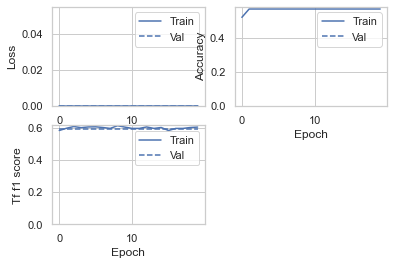

In [348]:
evaluate_results.plot_metrics(history_simple)